# Data Preparation

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## Import Data
The dataset contains all available data for more than 800,000 consumer loans issued from 2007 to 2015 by Lending Club: a large US peer-to-peer lending company. There are several different versions of this dataset. We have used a version available on kaggle.com. You can find it here: https://www.kaggle.com/wendykan/lending-club-loan-data/version/1
We divided the data into two periods because we assume that some data are available at the moment when we need to build Expected Loss models, and some data comes from applications after. Later, we investigate whether the applications we have after we built the Probability of Default (PD) model have similar characteristics with the applications we used to build the PD model.

In [2]:
loan_data_backup = pd.read_csv('loan_data.csv')

In [3]:
#Make a copy of data before making any changes in original  data
loan_data = loan_data_backup.copy()

## Explore Data

In [4]:
loan_data

Unnamed: 0       id  member_id  loan_amnt  funded_amnt  \
0                0  1077501    1296599       5000         5000   
1                1  1077430    1314167       2500         2500   
2                2  1077175    1313524       2400         2400   
3                3  1076863    1277178      10000        10000   
4                4  1075358    1311748       3000         3000   
...            ...      ...        ...        ...          ...   
466280      466280  8598660    1440975      18400        18400   
466281      466281  9684700   11536848      22000        22000   
466282      466282  9584776   11436914      20700        20700   
466283      466283  9604874   11457002       2000         2000   
466284      466284  9199665   11061576      10000        10000   

        funded_amnt_inv        term  int_rate  installment grade  ...  \
0                4975.0   36 months     10.65       162.87     B  ...   
1                2500.0   60 months     15.27        59.83     C  ...   
2                2400.0   36 months     15.96        84.33     C  ...   
3               10000.0   36 months     13.49       339.31     C  ...   
4                3000.0   60 months     12.69        67.79     B  ...   
...                 ...         ...       ...          ...   ...  ...   
466280          18400.0   60 months     14.47       432.64     C  ...   
466281          22000.0   60 months     19.97       582.50     D  ...   
466282          20700.0   60 months     16.99       514.34     D  ...   
466283           2000.0   36 months      7.90        62.59     A  ...   
466284           9975.0   36 months     19.20       367.58     D  ...   

       total_bal_il il_util open_rv_12m open_rv_24m  max_bal_bc all_util  \
0               NaN     NaN         NaN         NaN         NaN      NaN   
1               NaN     NaN         NaN         NaN         NaN      NaN   
2               NaN     NaN         NaN         NaN         NaN      NaN   
3               NaN     NaN         NaN         NaN         NaN      NaN   
4               NaN     NaN         NaN         NaN         NaN      NaN   
...             ...     ...         ...         ...         ...      ...   
466280          NaN     NaN         NaN         NaN         NaN      NaN   
466281          NaN     NaN         NaN         NaN         NaN      NaN   
466282          NaN     NaN         NaN         NaN         NaN      NaN   
466283          NaN     NaN         NaN         NaN         NaN      NaN   
466284          NaN     NaN         NaN         NaN         NaN      NaN   

       total_rev_hi_lim inq_fi total_cu_tl inq_last_12m  
0                   NaN    NaN         NaN          NaN  
1                   NaN    NaN         NaN          NaN  
2                   NaN    NaN         NaN          NaN  
3                   NaN    NaN         NaN          NaN  
4                   NaN    NaN         NaN          NaN  
...                 ...    ...         ...          ...  
466280          29900.0    NaN         NaN          NaN  
466281          39400.0    NaN         NaN          NaN  
466282          13100.0    NaN         NaN          NaN  
466283          53100.0    NaN         NaN          NaN  
466284          16000.0    NaN         NaN          NaN  

[466285 rows x 75 columns]

In [5]:
pd.options.display.max_columns = None
#pd.options.display.max_rows = None
# Sets the pandas dataframe options to display all columns/ rows.

In [6]:
loan_data

Unnamed: 0       id  member_id  loan_amnt  funded_amnt  \
0                0  1077501    1296599       5000         5000   
1                1  1077430    1314167       2500         2500   
2                2  1077175    1313524       2400         2400   
3                3  1076863    1277178      10000        10000   
4                4  1075358    1311748       3000         3000   
...            ...      ...        ...        ...          ...   
466280      466280  8598660    1440975      18400        18400   
466281      466281  9684700   11536848      22000        22000   
466282      466282  9584776   11436914      20700        20700   
466283      466283  9604874   11457002       2000         2000   
466284      466284  9199665   11061576      10000        10000   

        funded_amnt_inv        term  int_rate  installment grade sub_grade  \
0                4975.0   36 months     10.65       162.87     B        B2   
1                2500.0   60 months     15.27        59.83     C        C4   
2                2400.0   36 months     15.96        84.33     C        C5   
3               10000.0   36 months     13.49       339.31     C        C1   
4                3000.0   60 months     12.69        67.79     B        B5   
...                 ...         ...       ...          ...   ...       ...   
466280          18400.0   60 months     14.47       432.64     C        C2   
466281          22000.0   60 months     19.97       582.50     D        D5   
466282          20700.0   60 months     16.99       514.34     D        D1   
466283           2000.0   36 months      7.90        62.59     A        A4   
466284           9975.0   36 months     19.20       367.58     D        D3   

                                    emp_title emp_length home_ownership  \
0                                         NaN  10+ years           RENT   
1                                       Ryder   < 1 year           RENT   
2                                         NaN  10+ years           RENT   
3                         AIR RESOURCES BOARD  10+ years           RENT   
4                    University Medical Group     1 year           RENT   
...                                       ...        ...            ...   
466280                     Financial Advisor     4 years       MORTGAGE   
466281  Chief of Interpretation (Park Ranger)  10+ years       MORTGAGE   
466282                                 patrol    7 years       MORTGAGE   
466283                   Server Engineer Lead    3 years            OWN   
466284                                    NaN  10+ years       MORTGAGE   

        annual_inc verification_status issue_d  loan_status pymnt_plan  \
0          24000.0            Verified  Dec-11   Fully Paid          n   
1          30000.0     Source Verified  Dec-11  Charged Off          n   
2          12252.0        Not Verified  Dec-11   Fully Paid          n   
3          49200.0     Source Verified  Dec-11   Fully Paid          n   
4          80000.0     Source Verified  Dec-11      Current          n   
...            ...                 ...     ...          ...        ...   
466280    110000.0     Source Verified  Jan-14      Current          n   
466281     78000.0            Verified  Jan-14  Charged Off          n   
466282     46000.0            Verified  Jan-14      Current          n   
466283     83000.0            Verified  Jan-14   Fully Paid          n   
466284     46000.0            Verified  Jan-14      Current          n   

                                                      url  \
0       https://www.lendingclub.com/browse/loanDetail....   
1       https://www.lendingclub.com/browse/loanDetail....   
2       https://www.lendingclub.com/browse/loanDetail....   
3       https://www.lendingclub.com/browse/loanDetail....   
4       https://www.lendingclub.com/browse/loanDetail....   
...                                                   ...   
466280  https://www.lendingclub.com/browse/loanDetail....   


In [7]:
loan_data.head()

Unnamed: 0       id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0           0  1077501    1296599       5000         5000           4975.0   
1           1  1077430    1314167       2500         2500           2500.0   
2           2  1077175    1313524       2400         2400           2400.0   
3           3  1076863    1277178      10000        10000          10000.0   
4           4  1075358    1311748       3000         3000           3000.0   

         term  int_rate  installment grade sub_grade  \
0   36 months     10.65       162.87     B        B2   
1   60 months     15.27        59.83     C        C4   
2   36 months     15.96        84.33     C        C5   
3   36 months     13.49       339.31     C        C1   
4   60 months     12.69        67.79     B        B5   

                  emp_title emp_length home_ownership  annual_inc  \
0                       NaN  10+ years           RENT     24000.0   
1                     Ryder   < 1 year           RENT     30000.0   
2                       NaN  10+ years           RENT     12252.0   
3       AIR RESOURCES BOARD  10+ years           RENT     49200.0   
4  University Medical Group     1 year           RENT     80000.0   

  verification_status issue_d  loan_status pymnt_plan  \
0            Verified  Dec-11   Fully Paid          n   
1     Source Verified  Dec-11  Charged Off          n   
2        Not Verified  Dec-11   Fully Paid          n   
3     Source Verified  Dec-11   Fully Paid          n   
4     Source Verified  Dec-11      Current          n   

                                                 url  \
0  https://www.lendingclub.com/browse/loanDetail....   
1  https://www.lendingclub.com/browse/loanDetail....   
2  https://www.lendingclub.com/browse/loanDetail....   
3  https://www.lendingclub.com/browse/loanDetail....   
4  https://www.lendingclub.com/browse/loanDetail....   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
4    Borrower added on 12/21/11 > I plan on combi...           other   

                  title zip_code addr_state    dti  delinq_2yrs  \
0              Computer    860xx         AZ  27.65          0.0   
1                  bike    309xx         GA   1.00          0.0   
2  real estate business    606xx         IL   8.72          0.0   
3              personel    917xx         CA  20.00          0.0   
4              Personal    972xx         OR  17.94          0.0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0           Jan-85             1.0                     NaN   
1           Apr-99             5.0                     NaN   
2           Nov-01             2.0                     NaN   
3           Feb-96             1.0                    35.0   
4           Jan-96             0.0                    38.0   

   mths_since_last_record  open_acc  pub_rec  revol_bal  revol_util  \
0                     NaN       3.0      0.0      13648        83.7   
1                     NaN       3.0      0.0       1687         9.4   
2                     NaN       2.0      0.0       2956        98.5   
3                     NaN      10.0      0.0       5598        21.0   
4                     NaN      15.0      0.0      27783        53.9   

   total_acc initial_list_status  out_prncp  out_prncp_inv   total_pymnt  \
0        9.0                   f        0.0            0.0   5861.071414   
1        4.0                   f        0.0            0.0   1008.710000   
2       10.0                   f        0.0            0.0   3003.653644   
3       37.0                   f        0.0            0.0  12226.302210   
4       38.0                   f      766.9          766.9   3242.170000   

   total_

In [8]:
loan_data.tail()

Unnamed: 0       id  member_id  loan_amnt  funded_amnt  \
466280      466280  8598660    1440975      18400        18400   
466281      466281  9684700   11536848      22000        22000   
466282      466282  9584776   11436914      20700        20700   
466283      466283  9604874   11457002       2000         2000   
466284      466284  9199665   11061576      10000        10000   

        funded_amnt_inv        term  int_rate  installment grade sub_grade  \
466280          18400.0   60 months     14.47       432.64     C        C2   
466281          22000.0   60 months     19.97       582.50     D        D5   
466282          20700.0   60 months     16.99       514.34     D        D1   
466283           2000.0   36 months      7.90        62.59     A        A4   
466284           9975.0   36 months     19.20       367.58     D        D3   

                                    emp_title emp_length home_ownership  \
466280                     Financial Advisor     4 years       MORTGAGE   
466281  Chief of Interpretation (Park Ranger)  10+ years       MORTGAGE   
466282                                 patrol    7 years       MORTGAGE   
466283                   Server Engineer Lead    3 years            OWN   
466284                                    NaN  10+ years       MORTGAGE   

        annual_inc verification_status issue_d  loan_status pymnt_plan  \
466280    110000.0     Source Verified  Jan-14      Current          n   
466281     78000.0            Verified  Jan-14  Charged Off          n   
466282     46000.0            Verified  Jan-14      Current          n   
466283     83000.0            Verified  Jan-14   Fully Paid          n   
466284     46000.0            Verified  Jan-14      Current          n   

                                                      url  \
466280  https://www.lendingclub.com/browse/loanDetail....   
466281  https://www.lendingclub.com/browse/loanDetail....   
466282  https://www.lendingclub.com/browse/loanDetail....   
466283  https://www.lendingclub.com/browse/loanDetail....   
466284  https://www.lendingclub.com/browse/loanDetail....   

                                                     desc             purpose  \
466280                                                NaN  debt_consolidation   
466281                                                NaN  debt_consolidation   
466282    Borrower added on 12/06/13 > I am going to c...  debt_consolidation   
466283                                                NaN         credit_card   
466284    Borrower added on 12/04/13 > I will like a l...               other   

                          title zip_code addr_state    dti  delinq_2yrs  \
466280       Debt consolidation    773xx         TX  19.85          0.0   
466281       Debt consolidation    377xx         TN  18.45          0.0   
466282       Debt consolidation    458xx         OH  25.65          0.0   
466283  Credit card refinancing    913xx         CA   5.39          3.0   
466284                    Other    950xx         CA  22.78          1.0   

       earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
466280           Apr-03             2.0                     NaN   
466281           Jun-97             5.0                     NaN   
466282           Dec-01             2.0                    65.0   
466283           Feb-03             1.0                    13.0   
466284           Feb-00             0.0                     9.0   

        mths_since_last_record  open_acc  pub_rec  revol_bal  revol_util  \
466280                     NaN      18.0      0.0      23208        77.6   
466281                   116.0      18.0      1.0      18238        46.3   
466282                     NaN      18.0      0.0       6688        51.1   
466283                     NaN      21.0      0.0      11404        21.5   
466284                     NaN       6.0      0.0      11325        70.8   

        total_acc initial_list_status  out_prncp  out_prncp_inv   total_pymnt  \


In [9]:
loan_data.columns.values
# Displays all column names.

array(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'veri

In [10]:
loan_data.info()
# Displays column names, complete (non-missing) cases per column, and datatype per column.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

# ***General Preprocessing***

Preprocessing few continuous variables

In [11]:
#its in object type we have to change it in int
loan_data['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [12]:
# using str.replace method it have 2 parameter it replaces all strings of series with new strings
# str.repalce(<string to be replaced>,<new replacement strings>)
loan_data['emp_length_int'] = loan_data['emp_length'].str.replace('\+ years','')
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('< 1 year',str(0))
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('n/a',str(0))
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace(' years','')
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('year','')

In [13]:
# We store the preprocessed ‘employment length’ variable in a new variable called ‘employment length int’,
# We assign the new ‘employment length int’ to be equal to the ‘employment length’ variable with the string ‘+ years’
# replaced with nothing. Next, we replace the whole string ‘less than 1 year’ with the string ‘0’.
# Then, we replace the ‘n/a’ string with the string ‘0’. Then, we replace the string ‘space years’ with nothing.
# Finally, we replace the string ‘space year’ with nothing.

In [14]:
type(loan_data['emp_length_int'][0])

str

In [15]:
loan_data['emp_length_int'] = pd.to_numeric(loan_data['emp_length_int'])

In [16]:
type(loan_data['emp_length_int'][0])

numpy.float64

In [17]:
#change earliest_cr_line to data time data type #%b and %y is used to convert the string into date time
loan_data['earliest_cr_line_date'] = pd.to_datetime(loan_data['earliest_cr_line'],format = '%b-%y')

In [18]:
#it convert into time series
type(loan_data['earliest_cr_line_date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [19]:
#now we have to set a refrence time that is passed 
#Calculates the difference between two dates and times.
pd.to_datetime('2017-12-01')-loan_data['earliest_cr_line_date']

0        12022 days
1         6819 days
2         5874 days
3         7974 days
4         8005 days
            ...    
466280    5358 days
466281    7488 days
466282    5844 days
466283    5417 days
466284    6513 days
Name: earliest_cr_line_date, Length: 466285, dtype: timedelta64[ns]

In [20]:
# convert it into months assume we are now 2017-12-01
# We calculate the difference between two dates in months, turn it to numeric datatype and round it.
# We save the result in a new variable.
loan_data['mths_since_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2017-12-01')-loan_data['earliest_cr_line_date'])/ np.timedelta64(1,'M')))

In [21]:
#describe the mths_since_earliest_cr_line column
loan_data['mths_since_earliest_cr_line'].describe()
#it is impossible that the time in negative

count    466256.000000
mean        239.482430
std          93.974829
min        -612.000000
25%         183.000000
50%         225.000000
75%         285.000000
max         587.000000
Name: mths_since_earliest_cr_line, dtype: float64

In [22]:
# solve this issue
loan_data.loc[:,['earliest_cr_line','earliest_cr_line_date','mths_since_earliest_cr_line']][loan_data['mths_since_earliest_cr_line']<0]

earliest_cr_line earliest_cr_line_date  mths_since_earliest_cr_line
1580             Sep-62            2062-09-01                       -537.0
1770             Sep-68            2068-09-01                       -609.0
2799             Sep-64            2064-09-01                       -561.0
3282             Sep-67            2067-09-01                       -597.0
3359             Feb-65            2065-02-01                       -566.0
...                 ...                   ...                          ...
464003           Jan-68            2068-01-01                       -601.0
464260           Jul-66            2066-07-01                       -583.0
465100           Oct-67            2067-10-01                       -598.0
465500           Sep-67            2067-09-01                       -597.0
465655           Jan-56            2056-01-01                       -457.0

[1169 rows x 3 columns]

In [23]:
# we remove these row because we have more than 466000 data, and its only 1169rows

In [24]:
# another approach we can impute this valuse with max no of months
# We set the rows that had negative differences to the maximum value.
loan_data['mths_since_earliest_cr_line'][loan_data['mths_since_earliest_cr_line']<0]=loan_data['mths_since_earliest_cr_line'].max()

In [25]:
# Calculates and shows the minimum value of a column.
min(loan_data['mths_since_earliest_cr_line'])

73.0

In [26]:
loan_data['term']

0          36 months
1          60 months
2          36 months
3          36 months
4          60 months
             ...    
466280     60 months
466281     60 months
466282     60 months
466283     36 months
466284     36 months
Name: term, Length: 466285, dtype: object

In [27]:
loan_data['term'].describe()
# Shows some descriptive statisics for the values of a column.

count         466285
unique             2
top        36 months
freq          337953
Name: term, dtype: object

In [28]:
loan_data['term_int'] = loan_data['term'].str.replace(' months', '')
# We replace a string with another string, in this case, with an empty strng (i.e. with nothing).

In [29]:
loan_data['term_int']

0          36
1          60
2          36
3          36
4          60
         ... 
466280     60
466281     60
466282     60
466283     36
466284     36
Name: term_int, Length: 466285, dtype: object

In [30]:
type(loan_data['term_int'][25])
# Checks the datatype of a single element of a column.

str

In [31]:
loan_data['term_int'] = pd.to_numeric(loan_data['term'].str.replace(' months', ''))
# We remplace a string from a variable with another string, in this case, with an empty strng (i.e. with nothing).
# We turn the result to numeric datatype and save it in another variable.
loan_data['term_int']

0         36
1         60
2         36
3         36
4         60
          ..
466280    60
466281    60
466282    60
466283    36
466284    36
Name: term_int, Length: 466285, dtype: int64

In [32]:
type(loan_data['term_int'][0])
# Checks the datatype of a single element of a column.

numpy.int64

In [33]:
loan_data['issue_d']

0         Dec-11
1         Dec-11
2         Dec-11
3         Dec-11
4         Dec-11
           ...  
466280    Jan-14
466281    Jan-14
466282    Jan-14
466283    Jan-14
466284    Jan-14
Name: issue_d, Length: 466285, dtype: object

In [34]:
# Assume we are now in 2017-12-01
loan_data['issue_d_date'] = pd.to_datetime(loan_data['issue_d'], format = '%b-%y')
# Extracts the date and the time from a string variable that is in a given format.
loan_data['mths_since_issue_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - loan_data['issue_d_date']) / np.timedelta64(1, 'M')))
# We calculate the difference between two dates in months, turn it to numeric datatype and round it.
# We save the result in a new variable.
loan_data['mths_since_issue_d'].describe()
# Shows some descriptive statisics for the values of a column.

count    466285.000000
mean         51.255187
std          14.340154
min          36.000000
25%          41.000000
50%          47.000000
75%          57.000000
max         126.000000
Name: mths_since_issue_d, dtype: float64

# ***Preprocessing few discrete variables***

In [35]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 81 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   Unnamed: 0                   466285 non-null  int64         
 1   id                           466285 non-null  int64         
 2   member_id                    466285 non-null  int64         
 3   loan_amnt                    466285 non-null  int64         
 4   funded_amnt                  466285 non-null  int64         
 5   funded_amnt_inv              466285 non-null  float64       
 6   term                         466285 non-null  object        
 7   int_rate                     466285 non-null  float64       
 8   installment                  466285 non-null  float64       
 9   grade                        466285 non-null  object        
 10  sub_grade                    466285 non-null  object        
 11  emp_title                 

In [36]:
#pandas has inbulit fuction to convert it into dummie variable
# dummie variable like onehotencoder
pd.get_dummies(loan_data['grade'])

A  B  C  D  E  F  G
0       0  1  0  0  0  0  0
1       0  0  1  0  0  0  0
2       0  0  1  0  0  0  0
3       0  0  1  0  0  0  0
4       0  1  0  0  0  0  0
...    .. .. .. .. .. .. ..
466280  0  0  1  0  0  0  0
466281  0  0  0  1  0  0  0
466282  0  0  0  1  0  0  0
466283  1  0  0  0  0  0  0
466284  0  0  0  1  0  0  0

[466285 rows x 7 columns]

In [37]:
# but its not showing categories to solve this use prefix 
pd.get_dummies(loan_data['grade'],prefix='grade',prefix_sep=':')

grade:A  grade:B  grade:C  grade:D  grade:E  grade:F  grade:G
0             0        1        0        0        0        0        0
1             0        0        1        0        0        0        0
2             0        0        1        0        0        0        0
3             0        0        1        0        0        0        0
4             0        1        0        0        0        0        0
...         ...      ...      ...      ...      ...      ...      ...
466280        0        0        1        0        0        0        0
466281        0        0        0        1        0        0        0
466282        0        0        0        1        0        0        0
466283        1        0        0        0        0        0        0
466284        0        0        0        1        0        0        0

[466285 rows x 7 columns]

In [38]:
#using same method convert rest features which required
loan_data_dummies = [pd.get_dummies(loan_data['grade'],prefix='grade',prefix_sep=':'),
                    pd.get_dummies(loan_data['sub_grade'],prefix='sub_grade',prefix_sep=':'),
                    pd.get_dummies(loan_data['home_ownership'],prefix='home_ownership',prefix_sep=':'),
                    pd.get_dummies(loan_data['verification_status'],prefix='verification_status',prefix_sep=':'),
                    pd.get_dummies(loan_data['loan_status'],prefix='loan_status',prefix_sep=':'),
                    pd.get_dummies(loan_data['purpose'],prefix='purpose',prefix_sep=':'),
                    pd.get_dummies(loan_data['addr_state'],prefix='addr_state',prefix_sep=':'),
                    pd.get_dummies(loan_data['initial_list_status'],prefix='initial_list_status',prefix_sep=':')
                    ]

In [39]:
loan_data_dummies = pd.concat(loan_data_dummies,axis=1)

In [40]:
type(loan_data_dummies)

pandas.core.frame.DataFrame

In [41]:
loan_data_dummies

grade:A  grade:B  grade:C  grade:D  grade:E  grade:F  grade:G  \
0             0        1        0        0        0        0        0   
1             0        0        1        0        0        0        0   
2             0        0        1        0        0        0        0   
3             0        0        1        0        0        0        0   
4             0        1        0        0        0        0        0   
...         ...      ...      ...      ...      ...      ...      ...   
466280        0        0        1        0        0        0        0   
466281        0        0        0        1        0        0        0   
466282        0        0        0        1        0        0        0   
466283        1        0        0        0        0        0        0   
466284        0        0        0        1        0        0        0   

        sub_grade:A1  sub_grade:A2  sub_grade:A3  sub_grade:A4  sub_grade:A5  \
0                  0             0             0             0             0   
1                  0             0             0             0             0   
2                  0             0             0             0             0   
3                  0             0             0             0             0   
4                  0             0             0             0             0   
...              ...           ...           ...           ...           ...   
466280             0             0             0             0             0   
466281             0             0             0             0             0   
466282             0             0             0             0             0   
466283             0             0             0             1             0   
466284             0             0             0             0             0   

        sub_grade:B1  sub_grade:B2  sub_grade:B3  sub_grade:B4  sub_grade:B5  \
0                  0             1             0             0             0   
1                  0             0             0             0             0   
2                  0             0             0             0             0   
3                  0             0             0             0             0   
4                  0             0             0             0             1   
...              ...           ...           ...           ...           ...   
466280             0             0             0             0             0   
466281             0             0             0             0             0   
466282             0             0             0             0             0   
466283             0             0             0             0             0   
466284             0             0             0             0             0   

        sub_grade:C1  sub_grade:C2  sub_grade:C3  sub_grade:C4  sub_grade:C5  \
0                  0             0             0             0             0   
1                  0             0             0             1             0   
2                  0             0             0             0             1   
3                  1             0             0             0             0   
4                  0             0             0             0             0   
...              ...           ...           ...           ...           ...   
466280             0             1             0             0             0   
466281             0             0             0             0             0   
466282             0             0             0             0             0   
466283             0             0             0             0             0   
466284             0             0             0             0             0   

        sub_grade:D1  sub_grade:D2  sub_grade:D3  sub_grade:D4  sub_grade:D5  \
0                  0             0             0             0             0   
1                  0             0             0             0             0   
2       

In [42]:
#if u want to concat by row, use axis = 0
#if u want to concat bycolumn, use axis = 1
# add into data frame
loan_data = pd.concat([loan_data,loan_data_dummies],axis=1)

# ***checking missing values and clean***

In [43]:
#check 1st null values
pd.options.display.max_rows=None
loan_data.isnull().sum()

Unnamed: 0                                                              0
id                                                                      0
member_id                                                               0
loan_amnt                                                               0
funded_amnt                                                             0
funded_amnt_inv                                                         0
term                                                                    0
int_rate                                                                0
installment                                                             0
grade                                                                   0
sub_grade                                                               0
emp_title                                                           27588
emp_length                                                          21008
home_ownership                        

In [44]:
# variables we will need for the analysis
# annual_inc
# delling_2yrs
# inq_last_6mths
# open_acc
# pub_rec
# total_acc
# acc_now_delling
# total_rev_hi_lim
# emp_length_int
# mths_since_earliest_cr_line

In [45]:
# one way to remove the missing value remove the all row where missing value exist
# another way to deal with missing value and impute it
# df.fillna(new_values, [inplace])
# Sets the pandas dataframe options to display 100 columns/ rows.
pd.options.display.max_rows = 100
loan_data['total_rev_hi_lim'].fillna(loan_data['funded_amnt'], inplace = True)

In [46]:
loan_data['total_rev_hi_lim'].isnull().sum()

0

In [47]:
loan_data['annual_inc'].fillna(loan_data['annual_inc'].mean(), inplace=True)
# We fill the missing values with the mean value of the non-missing values.

In [48]:
loan_data['mths_since_earliest_cr_line'].fillna(0, inplace=True)
loan_data['acc_now_delinq'].fillna(0, inplace=True)
loan_data['total_acc'].fillna(0, inplace=True)
loan_data['pub_rec'].fillna(0, inplace=True)
loan_data['open_acc'].fillna(0, inplace=True)
loan_data['inq_last_6mths'].fillna(0, inplace=True)
loan_data['delinq_2yrs'].fillna(0, inplace=True)
loan_data['emp_length_int'].fillna(0, inplace=True)
# We fill the missing values with zeroes.

# **PD MODEL(PROBABILITY DEFAULT)**

# **DATA PREPEARATION **

In [49]:
#dependent variable. Good/Bad(default) definition. default and non-default accounts.

In [50]:
# check loan status
loan_data['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [51]:
#lets check values for each status
loan_data['loan_status'].value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [52]:
#lets check the proportion of loan_status with status
loan_data['loan_status'].value_counts()/loan_data['loan_status'].count()

Current                                                0.480878
Fully Paid                                             0.396193
Charged Off                                            0.091092
Late (31-120 days)                                     0.014798
In Grace Period                                        0.006747
Does not meet the credit policy. Status:Fully Paid     0.004263
Late (16-30 days)                                      0.002612
Default                                                0.001784
Does not meet the credit policy. Status:Charged Off    0.001632
Name: loan_status, dtype: float64

In [53]:
# Good/ Bad Definition
loan_data['good_bad'] = np.where(loan_data['loan_status'].isin(['Charged Off', 'Default',
                                                       'Does not meet the credit policy. Status:Charged Off',
                                                       'Late (31-120 days)']), 0, 1)
# We create a new variable that has the value of '0' if a condition is met, and the value of '1' if it is not met.

In [54]:
loan_data['good_bad']

0         1
1         0
2         1
3         1
4         1
         ..
466280    1
466281    0
466282    1
466283    1
466284    1
Name: good_bad, Length: 466285, dtype: int32

# ***Splitting Data***

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
loan_data_inputs_train,loan_data_inputs_test,loan_data_targets_train,loan_data_targets_test= train_test_split(loan_data.drop('good_bad',axis=1),loan_data['good_bad'], random_state = 42 )

In [57]:
loan_data_inputs_train.shape

(349713, 207)

In [58]:
loan_data_inputs_test.shape

(116572, 207)

In [59]:
loan_data_targets_train.shape

(349713,)

In [60]:
loan_data_targets_test.shape

(116572,)

# ***Data Preparation***

In [61]:
#discrete variables dont need fine classing(splitting into categories) because they are already categorical bt definition

In [62]:
#####
df_inputs_prepr = loan_data_inputs_train
df_targets_prepr = loan_data_targets_train

In [63]:
df_inputs_prepr['grade'].unique()

array(['C', 'B', 'D', 'E', 'A', 'F', 'G'], dtype=object)

In [64]:
df1=pd.concat([df_inputs_prepr['grade'],df_targets_prepr],axis=1)
df1.head()

grade  good_bad
462574     C         1
199825     B         1
259957     D         1
176933     B         1
298        B         1

A = HIGHEST CREDIT WORTHINESS


G = LOWEST CREDIT WORTHINESS

### calculating weight of evidence

In [65]:
# we claculate weight of evidence WOE = LN(%GOODj/%BADj)
# to calculate this we have find the propertion of good and bad of grade

In [66]:
# find the proportion of grade we used group by
df1.groupby(df1.columns.values[0],as_index=False)[df1.columns.values[1]].count()

grade  good_bad
0     A     56081
1     B    102788
2     C     94003
3     D     57678
4     E     26790
5     F      9900
6     G      2473

In [67]:
# now we reuired proportion of good_bad for each group
# 1 if good, 0 = bad 
# we get the propertion by avg
df1.groupby(df1.columns.values[0],as_index=False)[df1.columns.values[1]].mean()

grade  good_bad
0     A  0.961181
1     B  0.920983
2     C  0.885674
3     D  0.846441
4     E  0.805972
5     F  0.754040
6     G  0.724222

In [68]:
df1 = pd.concat([df1.groupby(df1.columns.values[0],as_index=False)[df1.columns.values[1]].count(),
    df1.groupby(df1.columns.values[0],as_index=False)[df1.columns.values[1]].mean()],axis=1)

In [69]:
df1

grade  good_bad grade  good_bad
0     A     56081     A  0.961181
1     B    102788     B  0.920983
2     C     94003     C  0.885674
3     D     57678     D  0.846441
4     E     26790     E  0.805972
5     F      9900     F  0.754040
6     G      2473     G  0.724222

In [70]:
df1=df1.iloc[:,[0,1,3]]

In [71]:
df1

grade  good_bad  good_bad
0     A     56081  0.961181
1     B    102788  0.920983
2     C     94003  0.885674
3     D     57678  0.846441
4     E     26790  0.805972
5     F      9900  0.754040
6     G      2473  0.724222

In [72]:
df1.columns = [df1.columns.values[0],'n_obs','prop_good']

In [73]:
df1

grade   n_obs  prop_good
0     A   56081   0.961181
1     B  102788   0.920983
2     C   94003   0.885674
3     D   57678   0.846441
4     E   26790   0.805972
5     F    9900   0.754040
6     G    2473   0.724222

In [74]:
df1['prop_n_obs'] = df1['n_obs']/df1['n_obs'].sum()
df1

grade   n_obs  prop_good  prop_n_obs
0     A   56081   0.961181    0.160363
1     B  102788   0.920983    0.293921
2     C   94003   0.885674    0.268800
3     D   57678   0.846441    0.164930
4     E   26790   0.805972    0.076606
5     F    9900   0.754040    0.028309
6     G    2473   0.724222    0.007072

In [75]:
#lets  calculate no of good and bad powers by grade
df1['n_good'] = df1['prop_good']*df1['n_obs']
df1['n_bad'] = (1-df1['prop_good'])*df1['n_obs']
df1

grade   n_obs  prop_good  prop_n_obs   n_good    n_bad
0     A   56081   0.961181    0.160363  53904.0   2177.0
1     B  102788   0.920983    0.293921  94666.0   8122.0
2     C   94003   0.885674    0.268800  83256.0  10747.0
3     D   57678   0.846441    0.164930  48821.0   8857.0
4     E   26790   0.805972    0.076606  21592.0   5198.0
5     F    9900   0.754040    0.028309   7465.0   2435.0
6     G    2473   0.724222    0.007072   1791.0    682.0

In [76]:
# calculate good and bad propertion for each grade
df1['prop_n_good'] = df1['n_good']/df1['n_good'].sum()
df1['prop_n_bad'] = df1['n_bad']/df1['n_bad'].sum()
df1

grade   n_obs  prop_good  prop_n_obs   n_good    n_bad  prop_n_good  \
0     A   56081   0.961181    0.160363  53904.0   2177.0     0.173049   
1     B  102788   0.920983    0.293921  94666.0   8122.0     0.303909   
2     C   94003   0.885674    0.268800  83256.0  10747.0     0.267279   
3     D   57678   0.846441    0.164930  48821.0   8857.0     0.156731   
4     E   26790   0.805972    0.076606  21592.0   5198.0     0.069317   
5     F    9900   0.754040    0.028309   7465.0   2435.0     0.023965   
6     G    2473   0.724222    0.007072   1791.0    682.0     0.005750   

   prop_n_bad  
0    0.056963  
1    0.212518  
2    0.281203  
3    0.231749  
4    0.136009  
5    0.063713  
6    0.017845

In [77]:
#lets update in WOE
df1['WOE'] =  np.log(df1['prop_n_good']/df1['prop_n_bad'])
df1

grade   n_obs  prop_good  prop_n_obs   n_good    n_bad  prop_n_good  \
0     A   56081   0.961181    0.160363  53904.0   2177.0     0.173049   
1     B  102788   0.920983    0.293921  94666.0   8122.0     0.303909   
2     C   94003   0.885674    0.268800  83256.0  10747.0     0.267279   
3     D   57678   0.846441    0.164930  48821.0   8857.0     0.156731   
4     E   26790   0.805972    0.076606  21592.0   5198.0     0.069317   
5     F    9900   0.754040    0.028309   7465.0   2435.0     0.023965   
6     G    2473   0.724222    0.007072   1791.0    682.0     0.005750   

   prop_n_bad       WOE  
0    0.056963  1.111180  
1    0.212518  0.357702  
2    0.281203 -0.050783  
3    0.231749 -0.391124  
4    0.136009 -0.674028  
5    0.063713 -0.977798  
6    0.017845 -1.132577

In [78]:
# short the value by WoE
df1= df1.sort_values(['WOE'])
df1 = df1.reset_index(drop=True)
df1

grade   n_obs  prop_good  prop_n_obs   n_good    n_bad  prop_n_good  \
0     G    2473   0.724222    0.007072   1791.0    682.0     0.005750   
1     F    9900   0.754040    0.028309   7465.0   2435.0     0.023965   
2     E   26790   0.805972    0.076606  21592.0   5198.0     0.069317   
3     D   57678   0.846441    0.164930  48821.0   8857.0     0.156731   
4     C   94003   0.885674    0.268800  83256.0  10747.0     0.267279   
5     B  102788   0.920983    0.293921  94666.0   8122.0     0.303909   
6     A   56081   0.961181    0.160363  53904.0   2177.0     0.173049   

   prop_n_bad       WOE  
0    0.017845 -1.132577  
1    0.063713 -0.977798  
2    0.136009 -0.674028  
3    0.231749 -0.391124  
4    0.281203 -0.050783  
5    0.212518  0.357702  
6    0.056963  1.111180

In [79]:
df1['diff_prop_good'] = df1['prop_good'].diff().abs()
df1['diff_WOE'] = df1['WOE'].diff().abs()
df1

grade   n_obs  prop_good  prop_n_obs   n_good    n_bad  prop_n_good  \
0     G    2473   0.724222    0.007072   1791.0    682.0     0.005750   
1     F    9900   0.754040    0.028309   7465.0   2435.0     0.023965   
2     E   26790   0.805972    0.076606  21592.0   5198.0     0.069317   
3     D   57678   0.846441    0.164930  48821.0   8857.0     0.156731   
4     C   94003   0.885674    0.268800  83256.0  10747.0     0.267279   
5     B  102788   0.920983    0.293921  94666.0   8122.0     0.303909   
6     A   56081   0.961181    0.160363  53904.0   2177.0     0.173049   

   prop_n_bad       WOE  diff_prop_good  diff_WOE  
0    0.017845 -1.132577             NaN       NaN  
1    0.063713 -0.977798        0.029819  0.154779  
2    0.136009 -0.674028        0.051932  0.303770  
3    0.231749 -0.391124        0.040468  0.282904  
4    0.281203 -0.050783        0.039233  0.340341  
5    0.212518  0.357702        0.035309  0.408485  
6    0.056963  1.111180        0.040198  0.753478

### CALCULATING INFORMATION VALUES(I.V.)

In [80]:
# IV = summation ((%GOODj - %BADj)* WOEj)

In [81]:
df1['IV'] = (df1['prop_n_good']-df1['prop_n_bad'])* df1['WOE']
df1['IV'] = df1['IV'].sum()
df1

grade   n_obs  prop_good  prop_n_obs   n_good    n_bad  prop_n_good  \
0     G    2473   0.724222    0.007072   1791.0    682.0     0.005750   
1     F    9900   0.754040    0.028309   7465.0   2435.0     0.023965   
2     E   26790   0.805972    0.076606  21592.0   5198.0     0.069317   
3     D   57678   0.846441    0.164930  48821.0   8857.0     0.156731   
4     C   94003   0.885674    0.268800  83256.0  10747.0     0.267279   
5     B  102788   0.920983    0.293921  94666.0   8122.0     0.303909   
6     A   56081   0.961181    0.160363  53904.0   2177.0     0.173049   

   prop_n_bad       WOE  diff_prop_good  diff_WOE        IV  
0    0.017845 -1.132577             NaN       NaN  0.289249  
1    0.063713 -0.977798        0.029819  0.154779  0.289249  
2    0.136009 -0.674028        0.051932  0.303770  0.289249  
3    0.231749 -0.391124        0.040468  0.282904  0.289249  
4    0.281203 -0.050783        0.039233  0.340341  0.289249  
5    0.212518  0.357702        0.035309  0.408485  0.289249  
6    0.056963  1.111180        0.040198  0.753478  0.289249

### Preprocessing Discrete Variables : Automating calculation

### function for WOE and IV

In [82]:
# df = name of df where data is contain
# discrete_variables_name = column name
# good_bad_variable_df = label of column where data is contain
# The function takes 3 arguments: a dataframe, a string, and a dataframe. The function returns a dataframe as a result.

def woe_discrete(df, discrete_variabe_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variabe_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    df = df.sort_values(['WoE'])
    df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

In [83]:
# df_inputs_prepr = loan_data_inputs_train 
# df_targets_prepr = loan_data_targets_train 
df_temp = woe_discrete(df_inputs_prepr,'grade',df_targets_prepr)
df_temp

grade   n_obs  prop_good  prop_n_obs   n_good    n_bad  prop_n_good  \
0     G    2473   0.724222    0.007072   1791.0    682.0     0.005750   
1     F    9900   0.754040    0.028309   7465.0   2435.0     0.023965   
2     E   26790   0.805972    0.076606  21592.0   5198.0     0.069317   
3     D   57678   0.846441    0.164930  48821.0   8857.0     0.156731   
4     C   94003   0.885674    0.268800  83256.0  10747.0     0.267279   
5     B  102788   0.920983    0.293921  94666.0   8122.0     0.303909   
6     A   56081   0.961181    0.160363  53904.0   2177.0     0.173049   

   prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0    0.017845 -1.132577             NaN       NaN  0.289249  
1    0.063713 -0.977798        0.029819  0.154779  0.289249  
2    0.136009 -0.674028        0.051932  0.303770  0.289249  
3    0.231749 -0.391124        0.040468  0.282904  0.289249  
4    0.281203 -0.050783        0.039233  0.340341  0.289249  
5    0.212518  0.357702        0.035309  0.408485  0.289249  
6    0.056963  1.111180        0.040198  0.753478  0.289249

### Preprocessing Discrete Variables: Visualizing Results

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [85]:
def plot_by_woe(df_WoE, rotation_of_x_axis_labels = 0):
    x = np.array(df_WoE.iloc[:, 0].apply(str))
    # Turns the values of the column with index 0 to strings, makes an array from these strings, and passes it to variable x.
    y = df_WoE['WoE']
    # Selects a column with label 'WoE' and passes it to variable y.
    plt.figure(figsize=(18, 6))
    # Sets the graph size to width 18 x height 6.
    plt.plot(x, y, marker = 'o', linestyle = '--', color = 'k')
    # Plots the datapoints with coordiantes variable x on the x-axis and variable y on the y-axis.
    # Sets the marker for each datapoint to a circle, the style line between the points to dashed, and the color to black.
    plt.xlabel(df_WoE.columns[0])
    # Names the x-axis with the name of the column with index 0.
    plt.ylabel('Weight of Evidence')
    # Names the y-axis 'Weight of Evidence'.
    plt.title(str('Weight of Evidence by ' + df_WoE.columns[0]))
    # Names the grapth 'Weight of Evidence by ' the name of the column with index 0.
    plt.xticks(rotation = rotation_of_x_axis_labels)
    # Rotates the labels of the x-axis a predefined number of degrees.

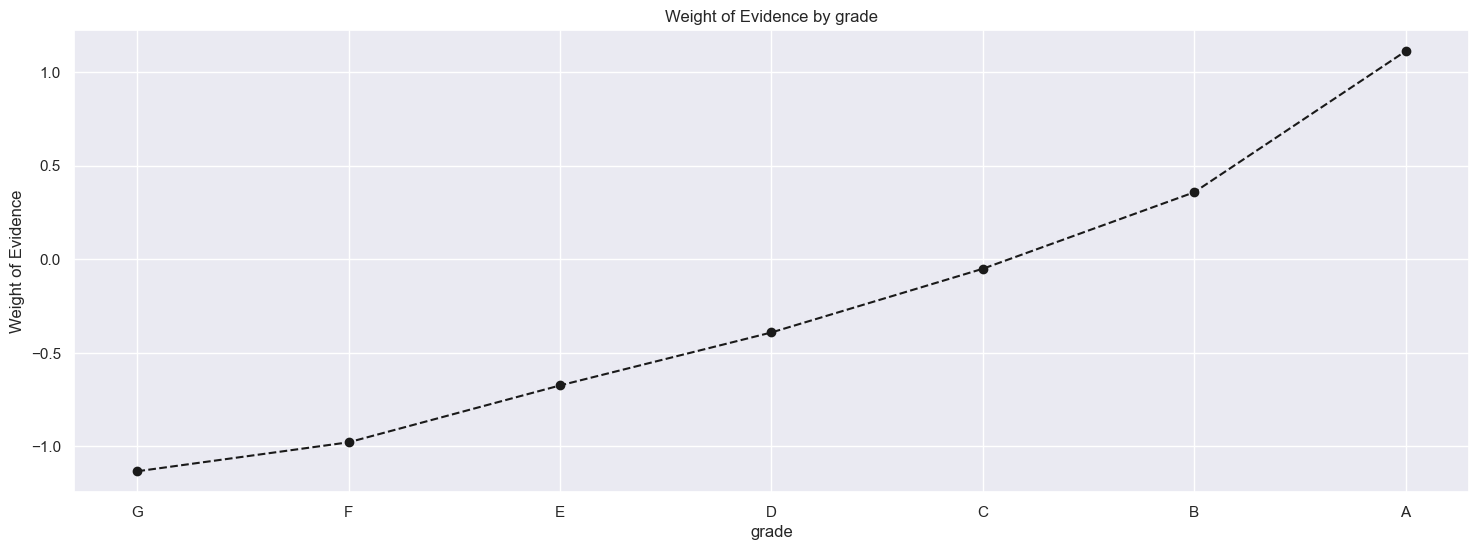

In [86]:
plot_by_woe(df_temp)

### Preprocessing Discrete Variables : Creating Dummy Variables,Part 1

In [87]:
df_temp = woe_discrete(df_inputs_prepr,'home_ownership',df_targets_prepr)
df_temp

home_ownership   n_obs  prop_good  prop_n_obs    n_good    n_bad  \
0          OTHER     129   0.798450    0.000369     103.0     26.0   
1           NONE      37   0.837838    0.000106      31.0      6.0   
2           RENT  141168   0.873810    0.403668  123354.0  17814.0   
3            OWN   31216   0.892619    0.089262   27864.0   3352.0   
4       MORTGAGE  177163   0.903930    0.506595  160143.0  17020.0   

   prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0     0.000331    0.000680 -0.721444             NaN       NaN  0.021616  
1     0.000100    0.000157 -0.455849        0.039388  0.265595  0.021616  
2     0.396006    0.466115 -0.163003        0.035972  0.292846  0.021616  
3     0.089452    0.087707  0.019702        0.018809  0.182705  0.021616  
4     0.514111    0.445340  0.143601        0.011311  0.123900  0.021616

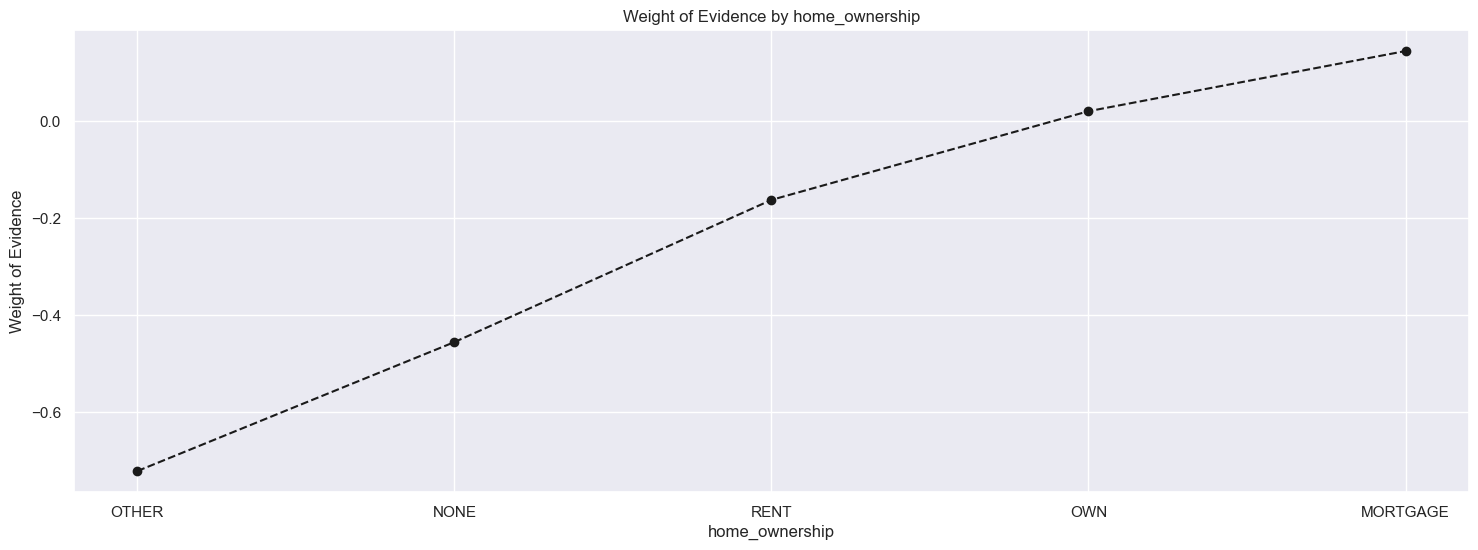

In [88]:
plot_by_woe(df_temp)

In [89]:
# lets combine categories ANY, OTHER , NONE WITH RENT
# reference line will be lowest WOE

In [90]:
df_inputs_prepr['home_ownership:RENT_OTHER_NONE_ANY'] = sum([df_inputs_prepr['home_ownership:RENT'],df_inputs_prepr['home_ownership:OTHER'],df_inputs_prepr['home_ownership:NONE'],df_inputs_prepr['home_ownership:ANY']])

In [91]:
# 'RENT_OTHER_NONE_ANY' will be the reference category.

# Alternatively:
#loan_data.loc['home_ownership' in ['RENT', 'OTHER', 'NONE', 'ANY'], 'home_ownership:RENT_OTHER_NONE_ANY'] = 1
#loan_data.loc['home_ownership' not in ['RENT', 'OTHER', 'NONE', 'ANY'], 'home_ownership:RENT_OTHER_NONE_ANY'] = 0
#loan_data.loc['loan_status' not in ['OWN'], 'home_ownership:OWN'] = 1
#loan_data.loc['loan_status' not in ['OWN'], 'home_ownership:OWN'] = 0
#loan_data.loc['loan_status' not in ['MORTGAGE'], 'home_ownership:MORTGAGE'] = 1
#loan_data.loc['loan_status' not in ['MORTGAGE'], 'home_ownership:MORTGAGE'] = 0

In [92]:
# There are many categories with very few observations and many categories with very different "good" %.
# Therefore, we create a new discrete variable where we combine some of the categories.
# 'OTHERS' and 'NONE' are riskiest but are very few. 'RENT' is the next riskiest.
# 'ANY' are least risky but are too few. Conceptually, they belong to the same category. Also, their inclusion would not change anything.
# We combine them in one category, 'RENT_OTHER_NONE_ANY'.
# We end up with 3 categories: 'RENT_OTHER_NONE_ANY', 'OWN', 'MORTGAGE'.

### Preprocessing Discrete Variables : Creating Dummy Variables,Part 2

In [93]:
# 'addr_state'
df_inputs_prepr['addr_state'].unique()

array(['GA', 'FL', 'OH', 'NJ', 'NY', 'TN', 'CO', 'MA', 'CT', 'CA', 'MI',
       'IL', 'IN', 'WA', 'LA', 'MD', 'SC', 'NV', 'TX', 'OR', 'AR', 'HI',
       'PA', 'WI', 'RI', 'VA', 'KS', 'MN', 'WV', 'NC', 'MT', 'DE', 'MO',
       'NH', 'AL', 'MS', 'VT', 'AZ', 'KY', 'OK', 'WY', 'SD', 'UT', 'AK',
       'DC', 'NM', 'IA', 'NE', 'ID', 'ME'], dtype=object)

In [94]:
# We calculate weight of evidence.
df_temp = woe_discrete(df_inputs_prepr, 'addr_state', df_targets_prepr)
df_temp

addr_state  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0          NE     13   0.461538    0.000037      6.0     7.0     0.000019   
1          IA     13   0.769231    0.000037     10.0     3.0     0.000032   
2          NV   4930   0.864909    0.014097   4264.0   666.0     0.013689   
3          FL  23618   0.875180    0.067535  20670.0  2948.0     0.066357   
4          AL   4371   0.875772    0.012499   3828.0   543.0     0.012289   
5          HI   1879   0.877594    0.005373   1649.0   230.0     0.005294   
6          NM   1916   0.881002    0.005479   1688.0   228.0     0.005419   
7          TN   4537   0.883624    0.012973   4009.0   528.0     0.012870   
8          OK   3046   0.883782    0.008710   2692.0   354.0     0.008642   
9          VA  10616   0.883949    0.030356   9384.0  1232.0     0.030126   
10         MO   5637   0.883981    0.016119   4983.0   654.0     0.015997   
11         NY  30181   0.884629    0.086302  26699.0  3482.0     0.085712   
12         MD   8244   0.884643    0.023574   7293.0   951.0     0.023413   
13         NC   9532   0.885334    0.027257   8439.0  1093.0     0.027092   
14         LA   4067   0.885419    0.011630   3601.0   466.0     0.011560   
15         CA  53576   0.886031    0.153200  47470.0  6106.0     0.152394   
16         KY   3365   0.886776    0.009622   2984.0   381.0     0.009580   
17         NJ  13501   0.887416    0.038606  11981.0  1520.0     0.038463   
18         UT   2581   0.888415    0.007380   2293.0   288.0     0.007361   
19         AZ   8087   0.889329    0.023125   7192.0   895.0     0.023089   
20         MI   8651   0.890071    0.024737   7700.0   951.0     0.024719   
21         OH  11365   0.890453    0.032498  10120.0  1245.0     0.032488   
22         PA  12315   0.890702    0.035215  10969.0  1346.0     0.035214   
23         MN   6147   0.891654    0.017577   5481.0   666.0     0.017596   
24         RI   1520   0.892763    0.004346   1357.0   163.0     0.004356   
25         AR   2589   0.893009    0.007403   2312.0   277.0     0.007422   
26         MA   8297   0.893214    0.023725   7411.0   886.0     0.023792   
27         SD    752   0.893617    0.002150    672.0    80.0     0.002157   
28         IN   4880   0.893648    0.013954   4361.0   519.0     0.014000   
29         WA   7852   0.896460    0.022453   7039.0   813.0     0.022597   
30         GA  11210   0.896699    0.032055  10052.0  1158.0     0.032270   
31         DE   1008   0.896825    0.002882    904.0   104.0     0.002902   
32         MT   1024   0.897461    0.002928    919.0   105.0     0.002950   
33         WI   4458   0.899955    0.012748   4012.0   446.0     0.012880   
34         OR   4497   0.900378    0.012859   4049.0   448.0     0.012999   
35         TX  27419   0.904045    0.078404  24788.0  2631.0     0.079578   
36         IL  13944   0.904977    0.039873  12619.0  1325.0     0.040511   
37         CT   5416   0.906204    0.015487   4908.0   508.0     0.015756   
38         SC   4182   0.907221    0.011958   3794.0   388.0     0.012180   
39         KS   3147   0.908802    0.008999   2860.0   287.0     0.009182   
40         CO   7353   0.909561    0.021026   6688.0   665.0     0.021471   
41         AK    940   0.912766    0.002688    858.0    82.0     0.002754   
42         VT    680   0.913235    0.001944    621.0    59.0     0.001994   
43         MS    901   0.913430    0.002576    823.0    78.0     0.002642   
44         WV   1806   0.919712    0.005164   1661.0   145.0     0.005332   
45         NH   1726   0.920046    0.004935   1588.0   138.0     0.005098   
46         WY    854   0.930913    0.002442    795.0    59.0     0.002552   
47         DC   1058   0.932892    0.003025    987.0    71.0     0.003169   
48         ME      2   1.000000    0.000006      2.0     0.0     0.000006   
49         ID     10   1.000000    0.000029     10.0     0.0     0.000032   

    prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0     0.000183 -2

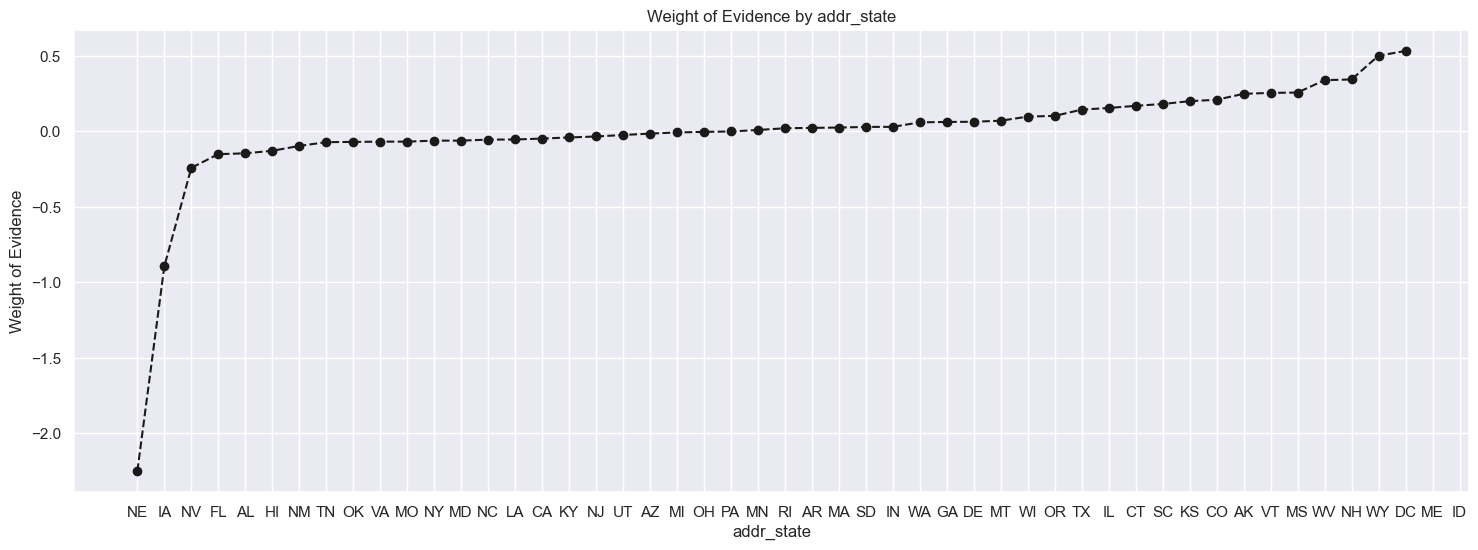

In [95]:
# We plot the weight of evidence values.
plot_by_woe(df_temp)

In [96]:
if ['addr_state:ND'] in df_inputs_prepr.columns.values:
    pass
else:
    df_inputs_prepr['addr_state:ND'] = 0

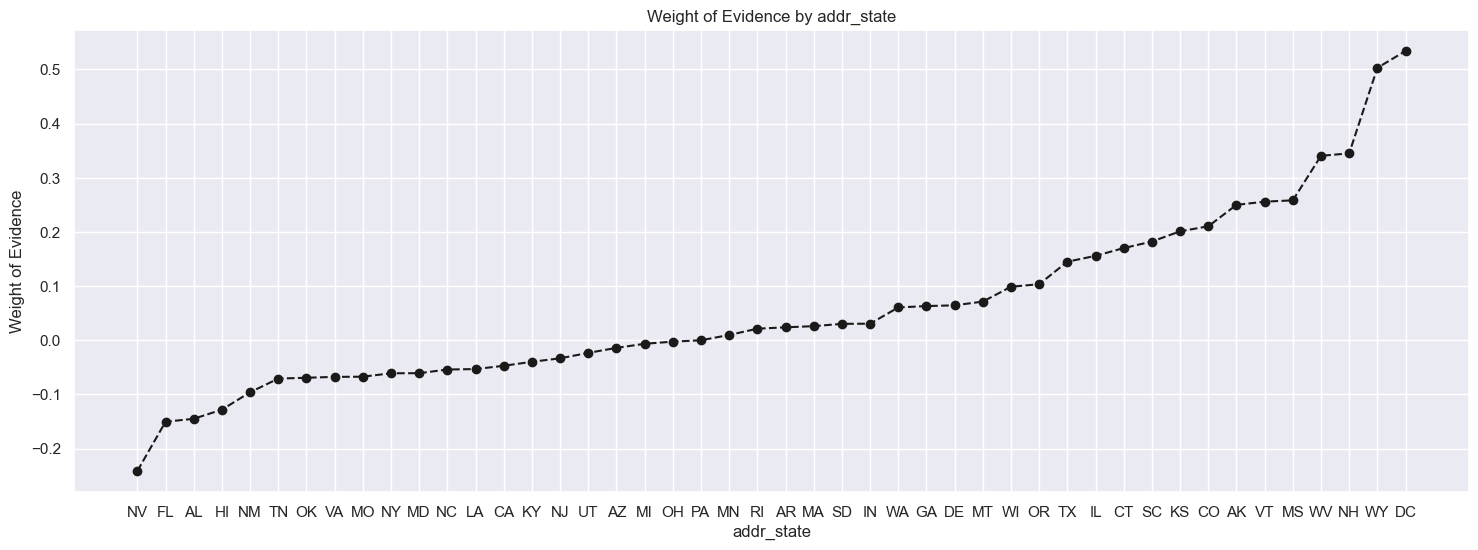

In [97]:
# We plot the weight of evidence values.
plot_by_woe(df_temp.iloc[2: -2, : ])

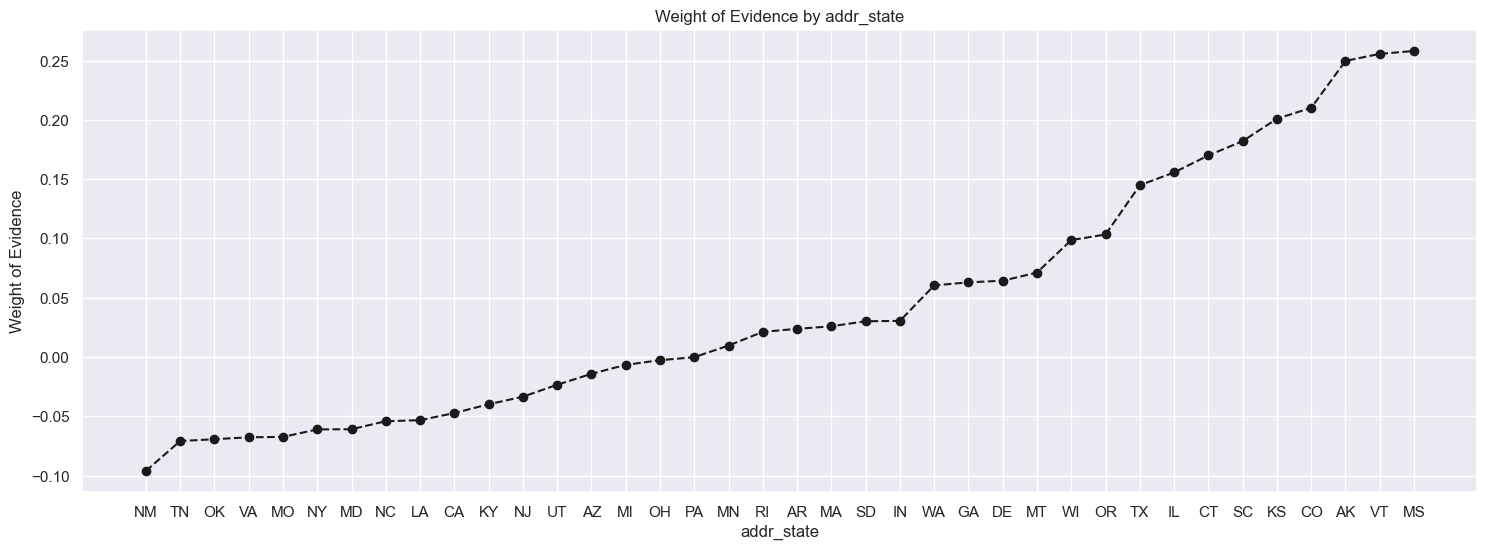

In [98]:
# We plot the weight of evidence values.
plot_by_woe(df_temp.iloc[6: -6, : ])


In [99]:
# We create the following categories:
# 'ND' 'NE' 'IA' NV' 'FL' 'HI' 'AL'
# 'NM' 'VA'
# 'NY'
# 'OK' 'TN' 'MO' 'LA' 'MD' 'NC'
# 'CA'
# 'UT' 'KY' 'AZ' 'NJ'
# 'AR' 'MI' 'PA' 'OH' 'MN'
# 'RI' 'MA' 'DE' 'SD' 'IN'
# 'GA' 'WA' 'OR'
# 'WI' 'MT'
# 'TX'
# 'IL' 'CT'
# 'KS' 'SC' 'CO' 'VT' 'AK' 'MS'
# 'WV' 'NH' 'WY' 'DC' 'ME' 'ID'

# 'IA_NV_HI_ID_AL_FL' will be the reference category.

df_inputs_prepr['addr_state:ND_NE_IA_NV_FL_HI_AL'] = sum([df_inputs_prepr['addr_state:ND'], df_inputs_prepr['addr_state:NE'],
                                              df_inputs_prepr['addr_state:IA'], df_inputs_prepr['addr_state:NV'],
                                              df_inputs_prepr['addr_state:FL'], df_inputs_prepr['addr_state:HI'],
                                                          df_inputs_prepr['addr_state:AL']])

df_inputs_prepr['addr_state:NM_VA'] = sum([df_inputs_prepr['addr_state:NM'], df_inputs_prepr['addr_state:VA']])

df_inputs_prepr['addr_state:OK_TN_MO_LA_MD_NC'] = sum([df_inputs_prepr['addr_state:OK'], df_inputs_prepr['addr_state:TN'],
                                              df_inputs_prepr['addr_state:MO'], df_inputs_prepr['addr_state:LA'],
                                              df_inputs_prepr['addr_state:MD'], df_inputs_prepr['addr_state:NC']])

df_inputs_prepr['addr_state:UT_KY_AZ_NJ'] = sum([df_inputs_prepr['addr_state:UT'], df_inputs_prepr['addr_state:KY'],
                                              df_inputs_prepr['addr_state:AZ'], df_inputs_prepr['addr_state:NJ']])

df_inputs_prepr['addr_state:AR_MI_PA_OH_MN'] = sum([df_inputs_prepr['addr_state:AR'], df_inputs_prepr['addr_state:MI'],
                                              df_inputs_prepr['addr_state:PA'], df_inputs_prepr['addr_state:OH'],
                                              df_inputs_prepr['addr_state:MN']])

df_inputs_prepr['addr_state:RI_MA_DE_SD_IN'] = sum([df_inputs_prepr['addr_state:RI'], df_inputs_prepr['addr_state:MA'],
                                              df_inputs_prepr['addr_state:DE'], df_inputs_prepr['addr_state:SD'],
                                              df_inputs_prepr['addr_state:IN']])

df_inputs_prepr['addr_state:GA_WA_OR'] = sum([df_inputs_prepr['addr_state:GA'], df_inputs_prepr['addr_state:WA'],
                                              df_inputs_prepr['addr_state:OR']])

df_inputs_prepr['addr_state:WI_MT'] = sum([df_inputs_prepr['addr_state:WI'], df_inputs_prepr['addr_state:MT']])

df_inputs_prepr['addr_state:IL_CT'] = sum([df_inputs_prepr['addr_state:IL'], df_inputs_prepr['addr_state:CT']])

df_inputs_prepr['addr_state:KS_SC_CO_VT_AK_MS'] = sum([df_inputs_prepr['addr_state:KS'], df_inputs_prepr['addr_state:SC'],
                                              df_inputs_prepr['addr_state:CO'], df_inputs_prepr['addr_state:VT'],
                                              df_inputs_prepr['addr_state:AK'], df_inputs_prepr['addr_state:MS']])

df_inputs_prepr['addr_state:WV_NH_WY_DC_ME_ID'] = sum([df_inputs_prepr['addr_state:WV'], df_inputs_prepr['addr_state:NH'],
                                              df_inputs_prepr['addr_state:WY'], df_inputs_prepr['addr_state:DC'],
                                              df_inputs_prepr['addr_state:ME'], df_inputs_prepr['addr_state:ID']])

### Preprocessing Discrete Variables

In [100]:
# 'verification_status'
df_temp = woe_discrete(df_inputs_prepr, 'verification_status', df_targets_prepr)
# We calculate weight of evidence.
df_temp

verification_status   n_obs  prop_good  prop_n_obs    n_good    n_bad  \
0            Verified  126140   0.872863    0.360696  110103.0  16037.0   
1     Source Verified  112425   0.895904    0.321478  100722.0  11703.0   
2        Not Verified  111148   0.905729    0.317826  100670.0  10478.0   

   prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0     0.353466    0.419619 -0.171559             NaN       NaN  0.020345  
1     0.323350    0.306217  0.054442        0.023040  0.226001  0.020345  
2     0.323183    0.274164  0.164493        0.009825  0.110051  0.020345

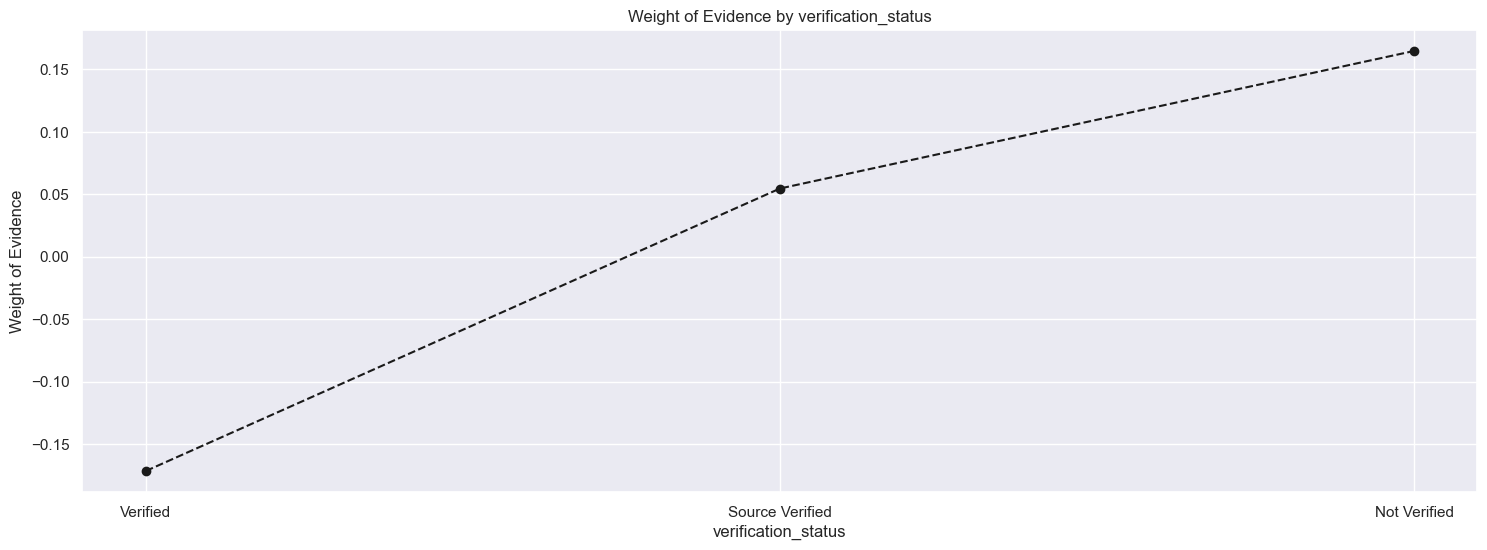

In [101]:
# We plot the weight of evidence values.
plot_by_woe(df_temp)


In [102]:
# 'purpose'
df_temp = woe_discrete(df_inputs_prepr, 'purpose', df_targets_prepr)
# We calculate weight of evidence.
df_temp

purpose   n_obs  prop_good  prop_n_obs    n_good    n_bad  \
0       small_business    5242   0.786532    0.014989    4123.0   1119.0   
1          educational     308   0.798701    0.000881     246.0     62.0   
2               moving    2261   0.839452    0.006465    1898.0    363.0   
3                house    1713   0.859895    0.004898    1473.0    240.0   
4                other   17683   0.862410    0.050564   15250.0   2433.0   
5     renewable_energy     271   0.863469    0.000775     234.0     37.0   
6              medical    3445   0.868505    0.009851    2992.0    453.0   
7             vacation    1866   0.880493    0.005336    1643.0    223.0   
8              wedding    1760   0.882386    0.005033    1553.0    207.0   
9   debt_consolidation  205557   0.887039    0.587788  182337.0  23220.0   
10    home_improvement   19976   0.900280    0.057121   17984.0   1992.0   
11      major_purchase    7313   0.905237    0.020911    6620.0    693.0   
12                 car    4005   0.910861    0.011452    3648.0    357.0   
13         credit_card   78313   0.912926    0.223935   71494.0   6819.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0      0.013236    0.029279 -0.793931             NaN       NaN  0.035068  
1      0.000790    0.001622 -0.719880        0.012169  0.074052  0.035068  
2      0.006093    0.009498 -0.443924        0.040750  0.275956  0.035068  
3      0.004729    0.006280 -0.283659        0.020443  0.160264  0.035068  
4      0.048957    0.063661 -0.262622        0.002515  0.021037  0.035068  
5      0.000751    0.000968 -0.253673        0.001058  0.008949  0.035068  
6      0.009605    0.011853 -0.210271        0.005036  0.043402  0.035068  
7      0.005275    0.005835 -0.100969        0.011988  0.109302  0.035068  
8      0.004986    0.005416 -0.082852        0.001893  0.018118  0.035068  
9      0.585361    0.607567 -0.037234        0.004652  0.045618  0.035068  
10     0.057734    0.052122  0.102267        0.013242  0.139501  0.035068  
11     0.021252    0.018133  0.158744        0.004957  0.056477  0.035068  
12     0.011711    0.009341  0.226122        0.005624  0.067378  0.035068  
13     0.229519    0.178424  0.251824        0.002065  0.025702  0.035068

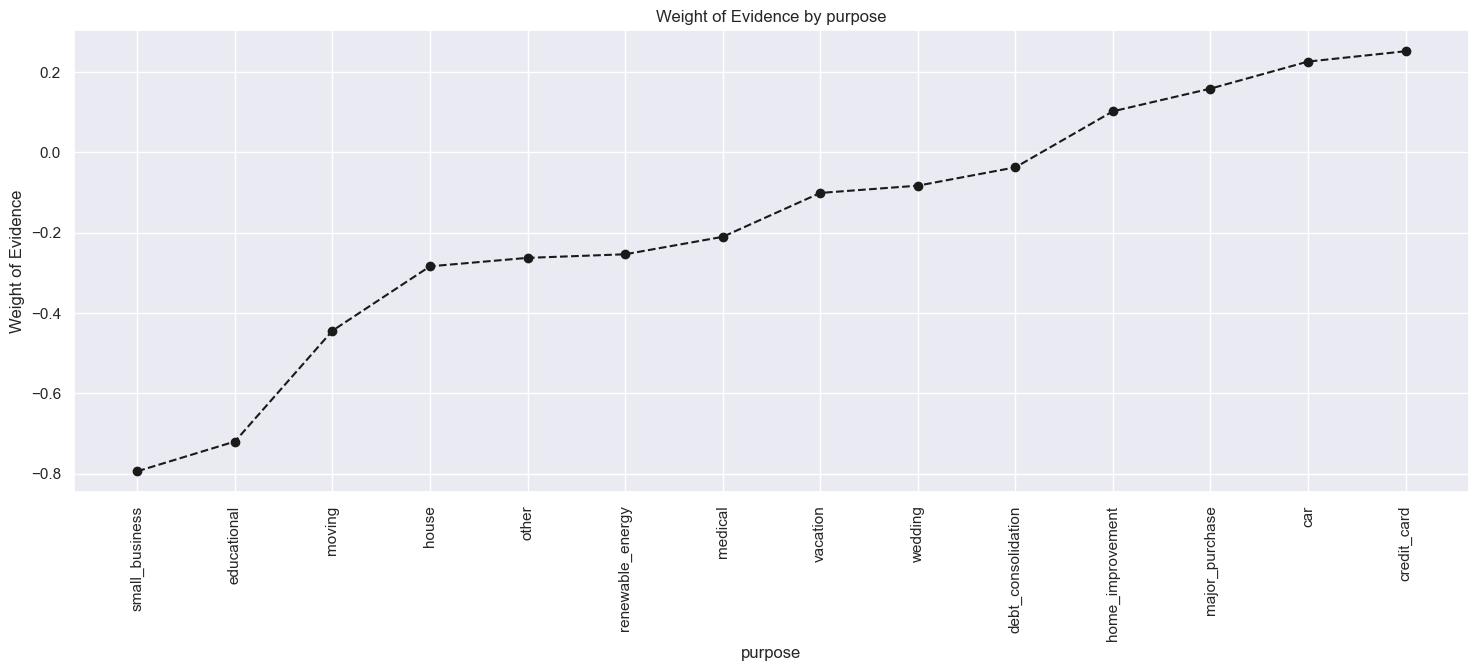

In [103]:
# We plot the weight of evidence values.
plot_by_woe(df_temp, 90)


In [104]:
# We combine 'educational', 'small_business', 'wedding', 'renewable_energy', 'moving', 'house' in one category: 'educ__sm_b__wedd__ren_en__mov__house'.
# We combine 'other', 'medical', 'vacation' in one category: 'oth__med__vacation'.
# We combine 'major_purchase', 'car', 'home_improvement' in one category: 'major_purch__car__home_impr'.
# We leave 'debt_consolidtion' in a separate category.
# We leave 'credit_card' in a separate category.
# 'educ__sm_b__wedd__ren_en__mov__house' will be the reference category.
df_inputs_prepr['purpose:educ__sm_b__wedd__ren_en__mov__house'] = sum([df_inputs_prepr['purpose:educational'], df_inputs_prepr['purpose:small_business'],
                                                                 df_inputs_prepr['purpose:wedding'], df_inputs_prepr['purpose:renewable_energy'],
                                                                 df_inputs_prepr['purpose:moving'], df_inputs_prepr['purpose:house']])
df_inputs_prepr['purpose:oth__med__vacation'] = sum([df_inputs_prepr['purpose:other'], df_inputs_prepr['purpose:medical'],
                                             df_inputs_prepr['purpose:vacation']])
df_inputs_prepr['purpose:major_purch__car__home_impr'] = sum([df_inputs_prepr['purpose:major_purchase'], df_inputs_prepr['purpose:car'],
                                                        df_inputs_prepr['purpose:home_improvement']])

In [105]:
# 'initial_list_status'
df_temp = woe_discrete(df_inputs_prepr, 'initial_list_status', df_targets_prepr)
df_temp

initial_list_status   n_obs  prop_good  prop_n_obs    n_good    n_bad  \
0                   f  227378   0.879861    0.650185  200061.0  27317.0   
1                   w  122335   0.910892    0.349815  111434.0  10901.0   

   prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0     0.642261    0.714768 -0.106964             NaN       NaN  0.024179  
1     0.357739    0.285232  0.226501        0.031031  0.333465  0.024179

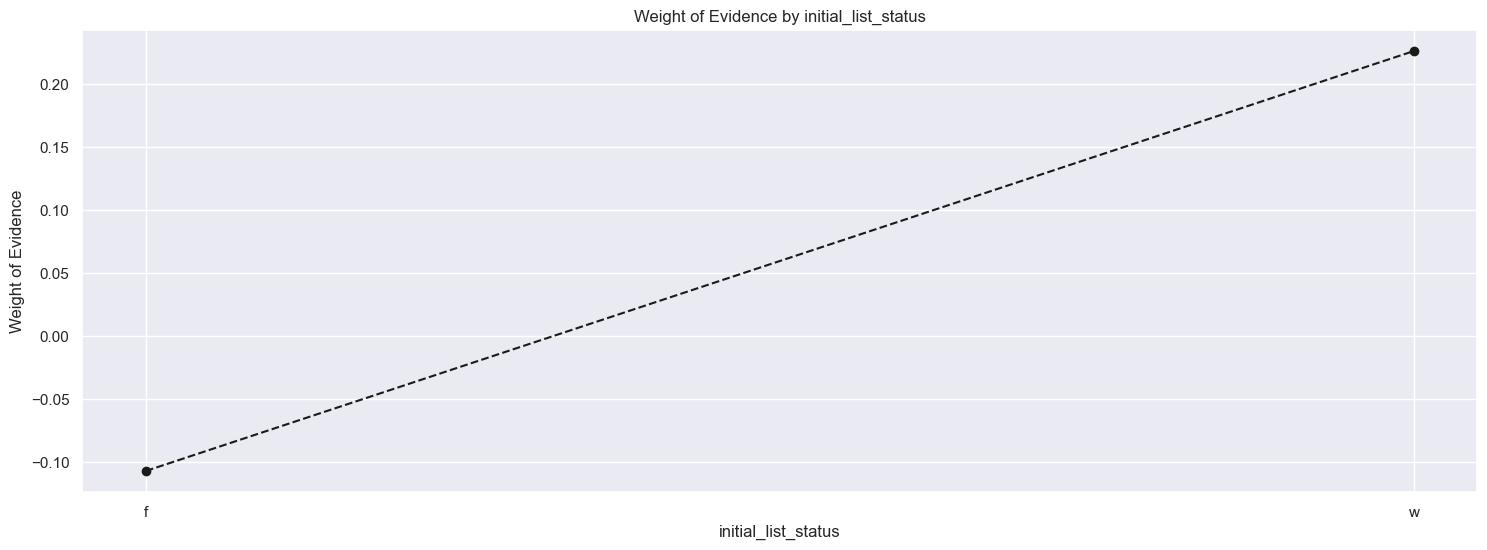

In [106]:
# We plot the weight of evidence values.
plot_by_woe(df_temp)


### Preprocessing numeric Variables

In [107]:
# df = name of df where data is contain
# discrete_variables_name = column name
# good_bad_variable_df = label of column where data is contain
# The function takes 3 arguments: a dataframe, a string, and a dataframe. The function returns a dataframe as a result.




def woe_ordered_continuous(df, discrete_variabe_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variabe_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
#     df = df.sort_values(['WoE'])
#     df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

### Preprocessing Continuous Variables : Creating Dummy Variables

In [108]:
#elaborate term_int
df_inputs_prepr['term_int'].unique()

array([60, 36], dtype=int64)

In [109]:
df_temp = woe_ordered_continuous(df_inputs_prepr,'term_int',df_targets_prepr)
df_temp

term_int   n_obs  prop_good  prop_n_obs    n_good    n_bad  prop_n_good  \
0        36  253583   0.903049    0.725117  228998.0  24585.0     0.735158   
1        60   96130   0.858182    0.274883   82497.0  13633.0     0.264842   

   prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0    0.643283  0.133500             NaN       NaN  0.039626  
1    0.356717 -0.297808        0.044868  0.431308  0.039626

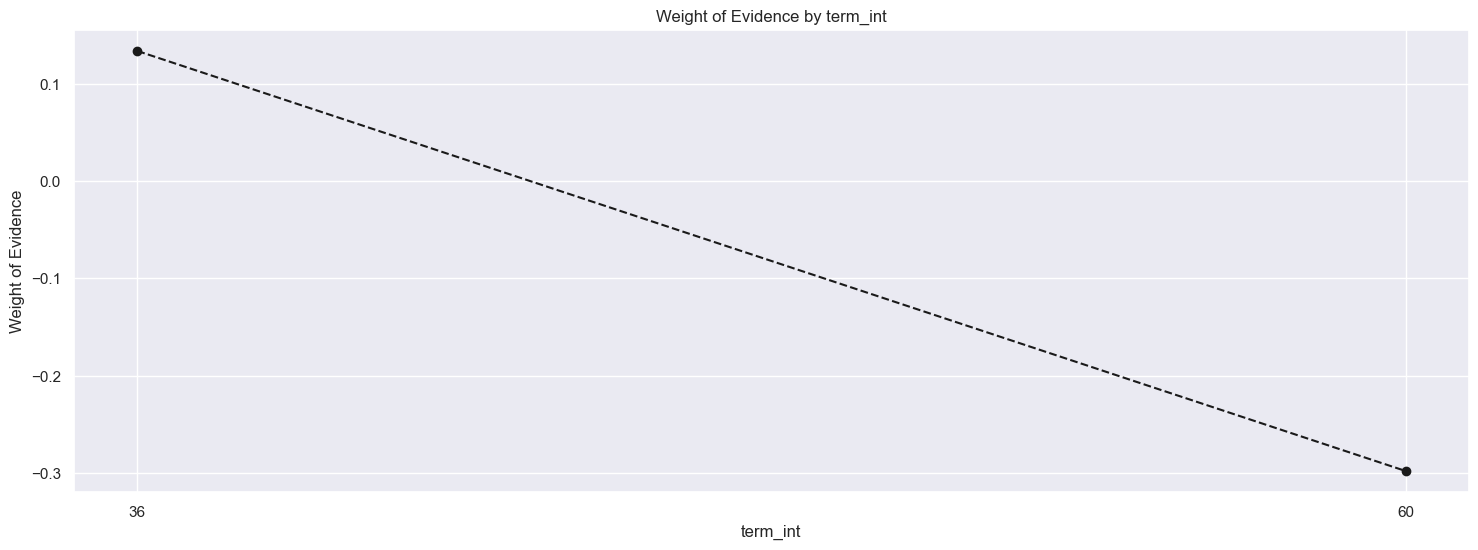

In [110]:
plot_by_woe(df_temp)

In [111]:
# reference point will be 60 months
# it seems 36 months loan risker than 60 months loan

In [112]:
# create dummy
df_inputs_prepr['term:36'] = np.where((df_inputs_prepr['term_int']==36),1,0)
df_inputs_prepr['term:60'] = np.where((df_inputs_prepr['term_int']==60),1,0)

In [113]:
#elaborate emp_length_int
df_inputs_prepr['emp_length_int'].unique()

array([10.,  5.,  0.,  1.,  8.,  7.,  9.,  4.,  3.,  6.,  2.])

In [114]:
df_temp=woe_ordered_continuous(df_inputs_prepr,'emp_length_int',df_targets_prepr)

In [115]:
df_temp

emp_length_int   n_obs  prop_good  prop_n_obs    n_good    n_bad  \
0              0.0   42897   0.875562    0.122663   37559.0   5338.0   
1              1.0   22210   0.887393    0.063509   19709.0   2501.0   
2              2.0   31059   0.891368    0.088813   27685.0   3374.0   
3              3.0   27341   0.891043    0.078181   24362.0   2979.0   
4              4.0   21052   0.890794    0.060198   18753.0   2299.0   
5              5.0   23061   0.885478    0.065943   20420.0   2641.0   
6              6.0   19586   0.883743    0.056006   17309.0   2277.0   
7              7.0   19741   0.887442    0.056449   17519.0   2222.0   
8              8.0   16744   0.890349    0.047879   14908.0   1836.0   
9              9.0   13340   0.887256    0.038146   11836.0   1504.0   
10            10.0  112682   0.900188    0.322213  101435.0  11247.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0      0.120577    0.139672 -0.147015             NaN       NaN  0.006638  
1      0.063272    0.065440 -0.033692        0.011831  0.113323  0.006638  
2      0.088878    0.088283  0.006715        0.003975  0.040407  0.006638  
3      0.078210    0.077948  0.003360        0.000325  0.003355  0.006638  
4      0.060203    0.060155  0.000803        0.000249  0.002557  0.006638  
5      0.065555    0.069104 -0.052719        0.005317  0.053522  0.006638  
6      0.055568    0.059579 -0.069709        0.001734  0.016989  0.006638  
7      0.056242    0.058140 -0.033198        0.003699  0.036511  0.006638  
8      0.047860    0.048040 -0.003768        0.002906  0.029430  0.006638  
9      0.037997    0.039353 -0.035059        0.003092  0.031291  0.006638  
10     0.325639    0.294285  0.101240        0.012932  0.136299  0.006638

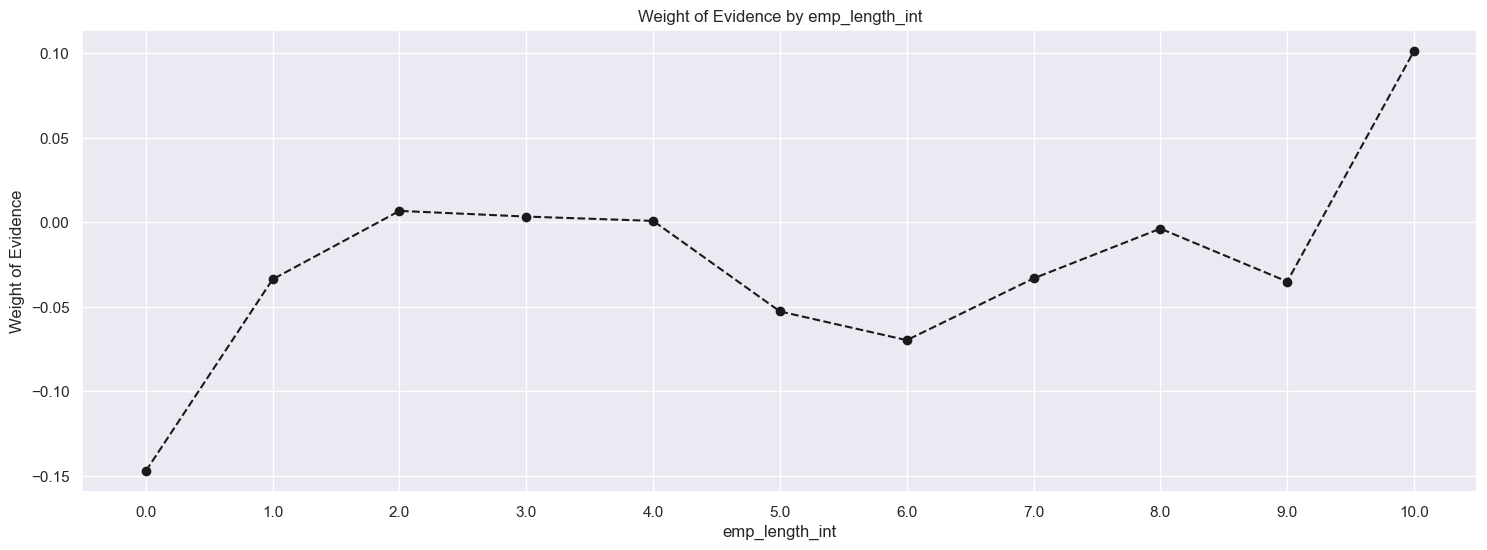

In [116]:
plot_by_woe(df_temp)

In [117]:
df_inputs_prepr['emp_length:0'] = np.where(df_inputs_prepr['emp_length_int'].isin([0]),1,0)
df_inputs_prepr['emp_length:1'] = np.where(df_inputs_prepr['emp_length_int'].isin([1]),1,0)
df_inputs_prepr['emp_length:2-4'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(2,5)),1,0)
df_inputs_prepr['emp_length:5-6'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(5,7)),1,0)
df_inputs_prepr['emp_length:7-9'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(7,10)),1,0)
df_inputs_prepr['emp_length:10'] = np.where(df_inputs_prepr['emp_length_int'].isin([10]),1,0)

### Preprocessing Continuous Variables: Creating Dummy Variables, Part 2

In [118]:
df_inputs_prepr['mths_since_issue_d'].unique()

array([ 47.,  63.,  37.,  59.,  72.,  74.,  53.,  43.,  38.,  67.,  44.,
        52.,  56.,  61.,  36.,  41.,  40.,  77.,  68.,  42.,  46.,  39.,
        78.,  92.,  71.,  62.,  60.,  82.,  64.,  49.,  51.,  55.,  94.,
        45.,  73.,  97.,  48.,  91.,  66., 108.,  54.,  58.,  50.,  85.,
        57.,  69.,  76.,  86., 103.,  65., 106.,  80.,  70.,  99.,  93.,
        84.,  75.,  89.,  79.,  81.,  90.,  87., 116., 117., 118.,  96.,
        88.,  83., 109., 104.,  95.,  98., 114., 101., 112., 100., 125.,
       107., 121., 105., 119., 115., 124., 102., 120., 122., 113., 111.,
       110., 123., 126.])

In [119]:
df_inputs_prepr['mths_since_issue_d_factor'] = pd.cut(df_inputs_prepr['mths_since_issue_d'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.

In [120]:
df_inputs_prepr['mths_since_issue_d_factor']

462574     (46.8, 48.6]
199825     (61.2, 63.0]
259957    (35.91, 37.8]
176933     (57.6, 59.4]
298        (70.2, 72.0]
              ...      
259178    (35.91, 37.8]
365838     (41.4, 43.2]
131932     (52.2, 54.0]
146867     (55.8, 57.6]
121958     (52.2, 54.0]
Name: mths_since_issue_d_factor, Length: 349713, dtype: category
Categories (50, interval[float64, right]): [(35.91, 37.8] < (37.8, 39.6] < (39.6, 41.4] < (41.4, 43.2] ... (118.8, 120.6] < (120.6, 122.4] < (122.4, 124.2] < (124.2, 126.0]]

In [121]:
# mths_since_issue_d
df_temp = woe_ordered_continuous(df_inputs_prepr, 'mths_since_issue_d_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

mths_since_issue_d_factor  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0              (35.91, 37.8]  26445   0.942144    0.075619  24915.0  1530.0   
1               (37.8, 39.6]  37231   0.928715    0.106462  34577.0  2654.0   
2               (39.6, 41.4]  36192   0.916832    0.103491  33182.0  3010.0   
3               (41.4, 43.2]  27169   0.908756    0.077689  24690.0  2479.0   
4               (43.2, 45.0]  26535   0.900810    0.075877  23903.0  2632.0   
5               (45.0, 46.8]  11406   0.899527    0.032615  10260.0  1146.0   
6               (46.8, 48.6]  22901   0.899393    0.065485  20597.0  2304.0   
7               (48.6, 50.4]  21511   0.888150    0.061510  19105.0  2406.0   
8               (50.4, 52.2]  19362   0.881366    0.055365  17065.0  2297.0   
9               (52.2, 54.0]  17176   0.866616    0.049115  14885.0  2291.0   
10              (54.0, 55.8]   7799   0.854853    0.022301   6667.0  1132.0   
11              (55.8, 57.6]  13310   0.864012    0.038060  11500.0  1810.0   
12              (57.6, 59.4]  10752   0.861142    0.030745   9259.0  1493.0   
13              (59.4, 61.2]   9388   0.852684    0.026845   8005.0  1383.0   
14              (61.2, 63.0]   9209   0.851232    0.026333   7839.0  1370.0   
15              (63.0, 64.8]   4033   0.844781    0.011532   3407.0   626.0   
16              (64.8, 66.6]   6301   0.823679    0.018018   5190.0  1111.0   
17              (66.6, 68.4]   5020   0.842231    0.014355   4228.0   792.0   
18              (68.4, 70.2]   4078   0.846003    0.011661   3450.0   628.0   
19              (70.2, 72.0]   3605   0.827184    0.010308   2982.0   623.0   
20              (72.0, 73.8]   1679   0.855867    0.004801   1437.0   242.0   
21              (73.8, 75.6]   3199   0.854329    0.009148   2733.0   466.0   
22              (75.6, 77.4]   2866   0.854850    0.008195   2450.0   416.0   
23              (77.4, 79.2]   2656   0.839985    0.007595   2231.0   425.0   
24              (79.2, 81.0]   2255   0.848780    0.006448   1914.0   341.0   
25              (81.0, 82.8]    983   0.872838    0.002811    858.0   125.0   
26              (82.8, 84.6]   2022   0.867458    0.005782   1754.0   268.0   
27              (84.6, 86.4]   1868   0.857602    0.005342   1602.0   266.0   
28              (86.4, 88.2]   1795   0.832869    0.005133   1495.0   300.0   
29              (88.2, 90.0]   1742   0.844432    0.004981   1471.0   271.0   
30              (90.0, 91.8]    738   0.860434    0.002110    635.0   103.0   
31              (91.8, 93.6]   1287   0.888889    0.003680   1144.0   143.0   
32              (93.6, 95.4]   1022   0.874755    0.002922    894.0   128.0   
33              (95.4, 97.2]    996   0.881526    0.002848    878.0   118.0   
34              (97.2, 99.0]    824   0.858010    0.002356    707.0   117.0   
35             (99.0, 100.8]    329   0.884498    0.000941    291.0    38.0   
36            (100.8, 102.6]    608   0.875000    0.001739    532.0    76.0   
37            (102.6, 104.4]    503   0.850895    0.001438    428.0    75.0   
38            (104.4, 106.2]    465   0.864516    0.001330    402.0    63.0   
39            (106.2, 108.0]    382   0.845550    0.001092    323.0    59.0   
40            (108.0, 109.8]    159   0.823899    0.000455    131.0    28.0   
41            (109.8, 111.6]    134   0.843284    0.000383    113.0    21.0   
42            (111.6, 113.4]    188   0.792553    0.000538    149.0    39.0   
43            (113.4, 115.2]    176   0.789773    0.000503    139.0    37.0   
44            (115.2, 117.0]    492   0.768293    0.001407    378.0   114.0   
45            (117.0, 118.8]    226   0.805310    0.000646    182.0    44.0   
46            (118.8, 120.6]    372   0.728495    0.001064    271.0   101.0   
47            (120.6, 122.4]    160   0.718750    0.000458    115.0    45.0   
48            (122.4, 124.2]     97   0.752577    0.000277     73.0    24.0   
49            (124.2, 126.0]     67   0.880597    0.0

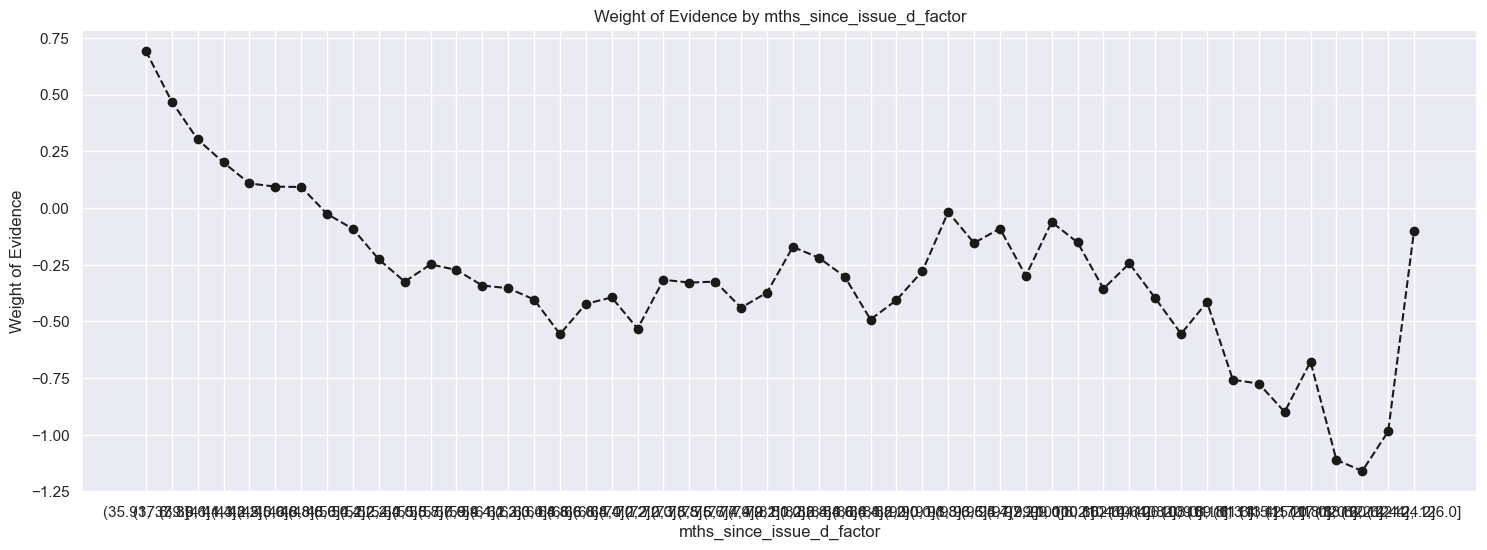

In [122]:
plot_by_woe(df_temp)
# We plot the weight of evidence values.
# We have to rotate the labels because we cannot read them otherwise.

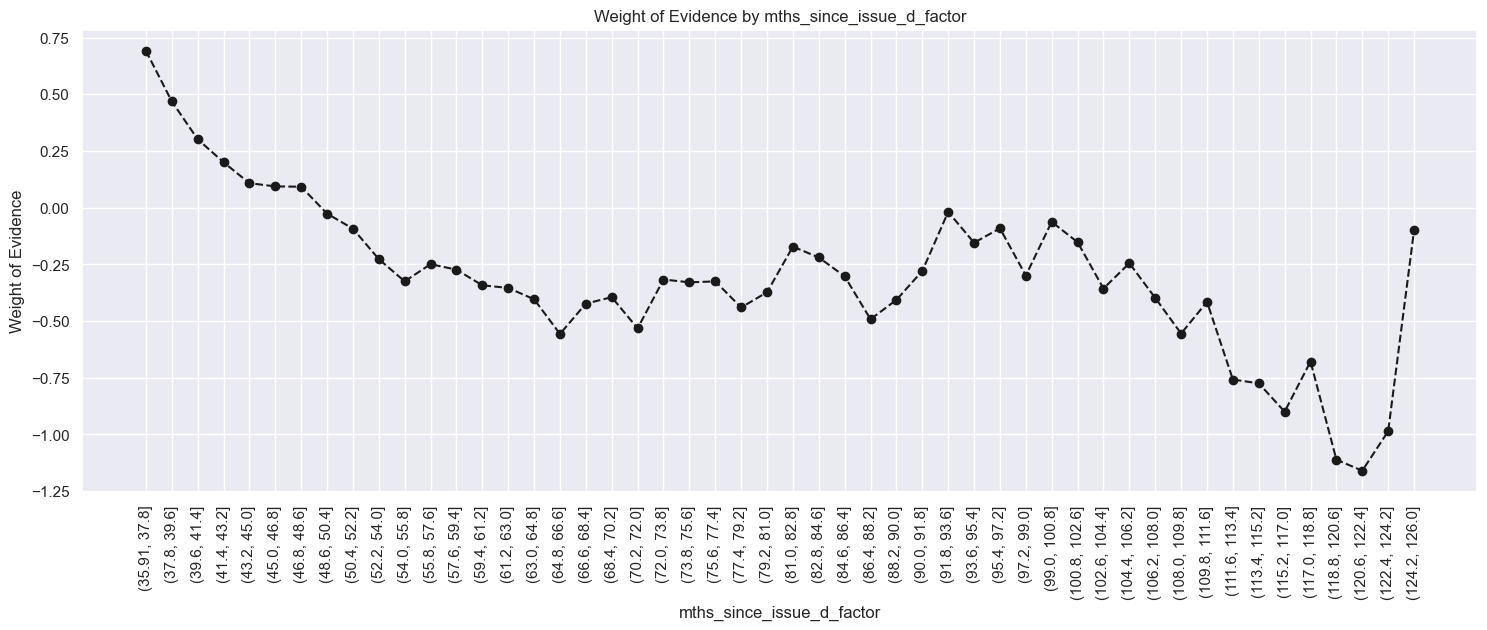

In [123]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values, rotating the labels 90 degrees.

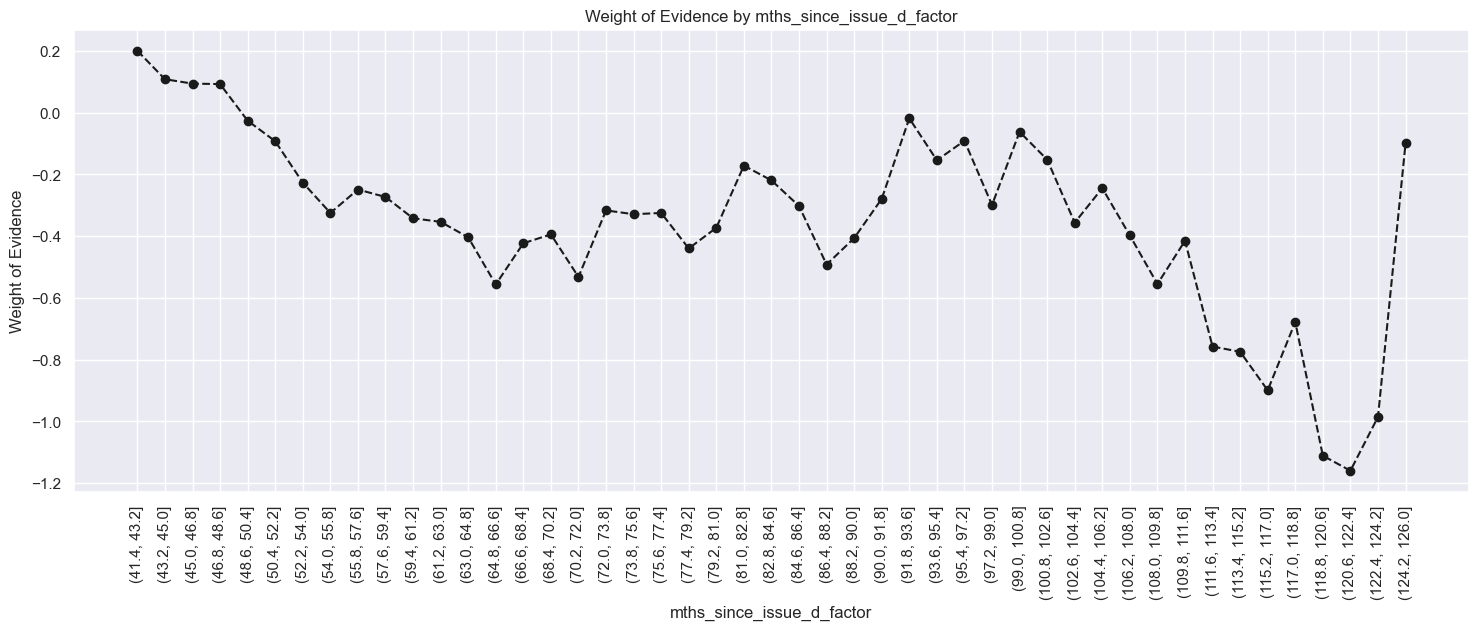

In [124]:
plot_by_woe(df_temp.iloc[3: , : ], 90)
# We plot the weight of evidence values.

In [125]:
# We create the following categories:
# < 38, 38 - 39, 40 - 41, 42 - 48, 49 - 52, 53 - 64, 65 - 84, > 84.
df_inputs_prepr['mths_since_issue_d:<38'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(38)), 1, 0)
df_inputs_prepr['mths_since_issue_d:38-39'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(38, 40)), 1, 0)
df_inputs_prepr['mths_since_issue_d:40-41'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(40, 42)), 1, 0)
df_inputs_prepr['mths_since_issue_d:42-48'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(42, 49)), 1, 0)
df_inputs_prepr['mths_since_issue_d:49-52'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(49, 53)), 1, 0)
df_inputs_prepr['mths_since_issue_d:53-64'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(53, 65)), 1, 0)
df_inputs_prepr['mths_since_issue_d:65-84'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(65, 85)), 1, 0)
df_inputs_prepr['mths_since_issue_d:>84'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(85, int(df_inputs_prepr['mths_since_issue_d'].max()))), 1, 0)

In [126]:
# int_rate
df_inputs_prepr['int_rate_factor'] = pd.cut(df_inputs_prepr['int_rate'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.

In [127]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'int_rate_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

int_rate_factor  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0     (5.399, 5.833]    729   0.958848    0.002085    699.0    30.0   
1     (5.833, 6.246]   7944   0.980740    0.022716   7791.0   153.0   
2     (6.246, 6.658]   7368   0.971906    0.021069   7161.0   207.0   
3     (6.658, 7.071]   1693   0.972239    0.004841   1646.0    47.0   
4     (7.071, 7.484]   2930   0.975768    0.008378   2859.0    71.0   
5     (7.484, 7.897]  11806   0.962053    0.033759  11358.0   448.0   
6      (7.897, 8.31]   9113   0.949852    0.026059   8656.0   457.0   
7      (8.31, 8.722]   6178   0.965037    0.017666   5962.0   216.0   
8     (8.722, 9.135]   8950   0.938324    0.025592   8398.0   552.0   
9     (9.135, 9.548]   6207   0.964073    0.017749   5984.0   223.0   
10    (9.548, 9.961]   7073   0.931571    0.020225   6589.0   484.0   
11   (9.961, 10.374]  10273   0.933320    0.029376   9588.0   685.0   
12  (10.374, 10.786]   5495   0.913558    0.015713   5020.0   475.0   
13  (10.786, 11.199]  16708   0.929615    0.047776  15532.0  1176.0   
14  (11.199, 11.612]   4587   0.918901    0.013116   4215.0   372.0   
15  (11.612, 12.025]  14596   0.933338    0.041737  13623.0   973.0   
16  (12.025, 12.438]  11589   0.892829    0.033139  10347.0  1242.0   
17   (12.438, 12.85]  10380   0.922447    0.029681   9575.0   805.0   
18   (12.85, 13.263]  19994   0.903771    0.057173  18070.0  1924.0   
19  (13.263, 13.676]  14388   0.906936    0.041142  13049.0  1339.0   
20  (13.676, 14.089]  10337   0.897649    0.029559   9279.0  1058.0   
21  (14.089, 14.502]  22059   0.887937    0.063077  19587.0  2472.0   
22  (14.502, 14.914]   4041   0.861915    0.011555   3483.0   558.0   
23  (14.914, 15.327]  17736   0.881710    0.050716  15638.0  2098.0   
24   (15.327, 15.74]  11617   0.888095    0.033219  10317.0  1300.0   
25   (15.74, 16.153]   6998   0.836953    0.020011   5857.0  1141.0   
26  (16.153, 16.566]  12168   0.858810    0.034794  10450.0  1718.0   
27  (16.566, 16.978]   3943   0.840984    0.011275   3316.0   627.0   
28  (16.978, 17.391]  10695   0.853576    0.030582   9129.0  1566.0   
29  (17.391, 17.804]  11482   0.840533    0.032833   9651.0  1831.0   
30  (17.804, 18.217]   1220   0.820492    0.003489   1001.0   219.0   
31   (18.217, 18.63]  10345   0.835283    0.029581   8641.0  1704.0   
32   (18.63, 19.042]   6409   0.819941    0.018326   5255.0  1154.0   
33  (19.042, 19.455]   4164   0.803074    0.011907   3344.0   820.0   
34  (19.455, 19.868]   6337   0.823891    0.018121   5221.0  1116.0   
35  (19.868, 20.281]   4597   0.833370    0.013145   3831.0   766.0   
36  (20.281, 20.694]   3009   0.793619    0.008604   2388.0   621.0   
37  (20.694, 21.106]   3755   0.801598    0.010737   3010.0   745.0   
38  (21.106, 21.519]   2562   0.782592    0.007326   2005.0   557.0   
39  (21.519, 21.932]    926   0.758099    0.002648    702.0   224.0   
40  (21.932, 22.345]   3235   0.796291    0.009250   2576.0   659.0   
41  (22.345, 22.758]   2109   0.761024    0.006031   1605.0   504.0   
42   (22.758, 23.17]   1446   0.758645    0.004135   1097.0   349.0   
43   (23.17, 23.583]   2489   0.783447    0.007117   1950.0   539.0   
44  (23.583, 23.996]   1482   0.721323    0.004238   1069.0   413.0   
45  (23.996, 24.409]   1380   0.768116    0.003946   1060.0   320.0   
46  (24.409, 24.822]   1544   0.762953    0.004415   1178.0   366.0   
47  (24.822, 25.234]   1233   0.768856    0.003526    948.0   285.0   
48  (25.234, 25.647]    727   0.735901    0.002079    535.0   192.0   
49   (25.647, 26.06]   1667   0.749850    0.004767   1250.0   417.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0      0.002244    0.000785  1.050377             NaN       NaN  0.344399  
1      0.025012    0.004003  1.832210        0.021892  0.781833  0.344399  
2      0.022989    0.005416  1.445609        0.008835  0.386600  0.344399  
3      0.005284    0.001230  1.457879        0.000333  0.012270  0.344399  
4  

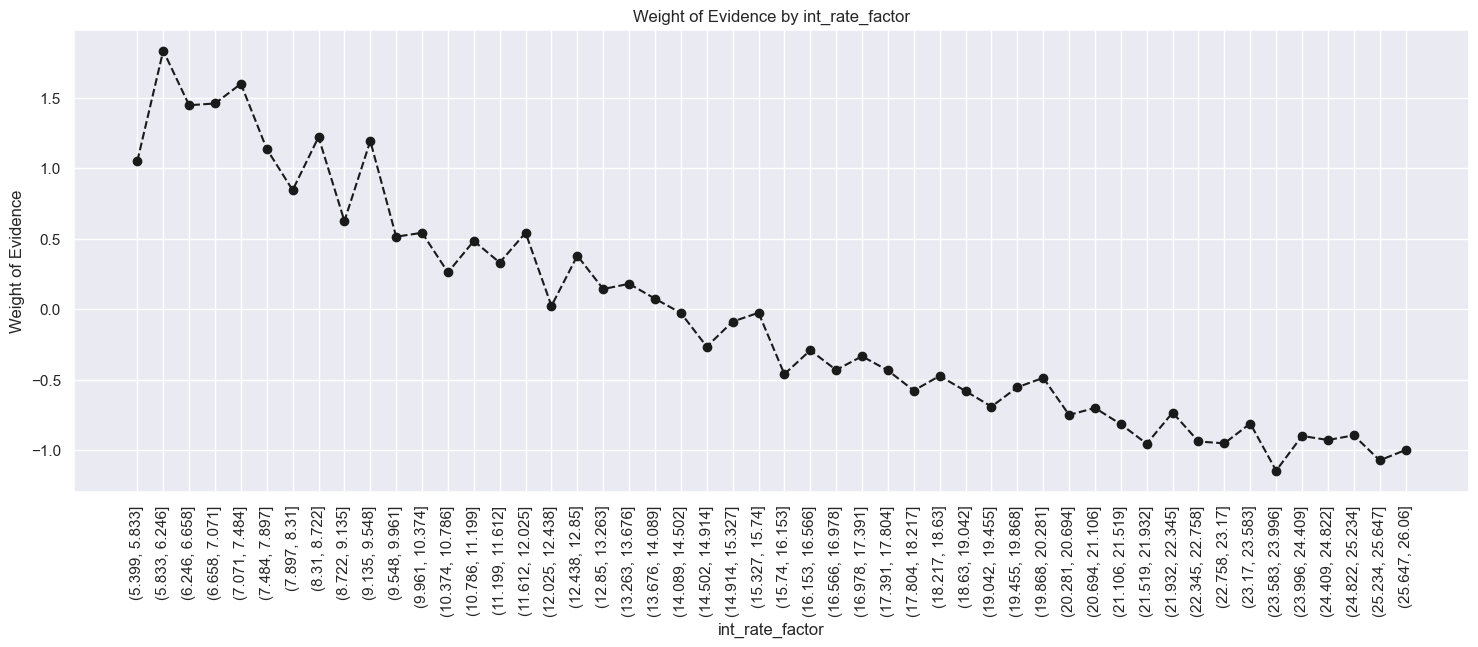

In [128]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [129]:
# '< 9.548', '9.548 - 12.025', '12.025 - 15.74', '15.74 - 20.281', '> 20.281'

In [130]:
df_inputs_prepr['int_rate:<9.548'] = np.where((df_inputs_prepr['int_rate'] <= 9.548), 1, 0)
df_inputs_prepr['int_rate:9.548-12.025'] = np.where((df_inputs_prepr['int_rate'] > 9.548) & (df_inputs_prepr['int_rate'] <= 12.025), 1, 0)
df_inputs_prepr['int_rate:12.025-15.74'] = np.where((df_inputs_prepr['int_rate'] > 12.025) & (df_inputs_prepr['int_rate'] <= 15.74), 1, 0)
df_inputs_prepr['int_rate:15.74-20.281'] = np.where((df_inputs_prepr['int_rate'] > 15.74) & (df_inputs_prepr['int_rate'] <= 20.281), 1, 0)
df_inputs_prepr['int_rate:>20.281'] = np.where((df_inputs_prepr['int_rate'] > 20.281), 1, 0)

In [131]:
# funded_amnt
df_inputs_prepr['funded_amnt_factor'] = pd.cut(df_inputs_prepr['funded_amnt'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'funded_amnt_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

funded_amnt_factor  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0      (465.5, 1190.0]   1138   0.911248    0.003254   1037.0   101.0   
1     (1190.0, 1880.0]   2851   0.901438    0.008152   2570.0   281.0   
2     (1880.0, 2570.0]   5633   0.892952    0.016107   5030.0   603.0   
3     (2570.0, 3260.0]   6817   0.889101    0.019493   6061.0   756.0   
4     (3260.0, 3950.0]   4431   0.891447    0.012670   3950.0   481.0   
5     (3950.0, 4640.0]   8442   0.889600    0.024140   7510.0   932.0   
6     (4640.0, 5330.0]  14829   0.891834    0.042403  13225.0  1604.0   
7     (5330.0, 6020.0]  16229   0.906094    0.046407  14705.0  1524.0   
8     (6020.0, 6710.0]   6476   0.887585    0.018518   5748.0   728.0   
9     (6710.0, 7400.0]  11040   0.897736    0.031569   9911.0  1129.0   
10    (7400.0, 8090.0]  16535   0.898095    0.047282  14850.0  1685.0   
11    (8090.0, 8780.0]   5924   0.879980    0.016940   5213.0   711.0   
12    (8780.0, 9470.0]   8628   0.880505    0.024672   7597.0  1031.0   
13   (9470.0, 10160.0]  31336   0.894754    0.089605  28038.0  3298.0   
14  (10160.0, 10850.0]   6347   0.873011    0.018149   5541.0   806.0   
15  (10850.0, 11540.0]   8019   0.883277    0.022930   7083.0   936.0   
16  (11540.0, 12230.0]  22081   0.902314    0.063140  19924.0  2157.0   
17  (12230.0, 12920.0]   4480   0.875223    0.012811   3921.0   559.0   
18  (12920.0, 13610.0]   6777   0.895972    0.019379   6072.0   705.0   
19  (13610.0, 14300.0]   7575   0.895050    0.021661   6780.0   795.0   
20  (14300.0, 14990.0]   4863   0.872918    0.013906   4245.0   618.0   
21  (14990.0, 15680.0]  20415   0.898800    0.058376  18349.0  2066.0   
22  (15680.0, 16370.0]  11048   0.884866    0.031592   9776.0  1272.0   
23  (16370.0, 17060.0]   6101   0.876905    0.017446   5350.0   751.0   
24  (17060.0, 17750.0]   3211   0.867020    0.009182   2784.0   427.0   
25  (17750.0, 18440.0]  10749   0.885292    0.030737   9516.0  1233.0   
26  (18440.0, 19130.0]   3689   0.870426    0.010549   3211.0   478.0   
27  (19130.0, 19820.0]   3769   0.855930    0.010777   3226.0   543.0   
28  (19820.0, 20510.0]  19021   0.899112    0.054390  17102.0  1919.0   
29  (20510.0, 21200.0]   6327   0.896633    0.018092   5673.0   654.0   
30  (21200.0, 21890.0]   1939   0.850954    0.005545   1650.0   289.0   
31  (21890.0, 22580.0]   3862   0.888918    0.011043   3433.0   429.0   
32  (22580.0, 23270.0]   2280   0.885965    0.006520   2020.0   260.0   
33  (23270.0, 23960.0]   1717   0.841584    0.004910   1445.0   272.0   
34  (23960.0, 24650.0]   9206   0.904519    0.026324   8327.0   879.0   
35  (24650.0, 25340.0]   9480   0.889557    0.027108   8433.0  1047.0   
36  (25340.0, 26030.0]   1717   0.870705    0.004910   1495.0   222.0   
37  (26030.0, 26720.0]   1173   0.840580    0.003354    986.0   187.0   
38  (26720.0, 27410.0]   1428   0.875350    0.004083   1250.0   178.0   
39  (27410.0, 28100.0]   6056   0.907530    0.017317   5496.0   560.0   
40  (28100.0, 28790.0]    746   0.855228    0.002133    638.0   108.0   
41  (28790.0, 29480.0]   1112   0.868705    0.003180    966.0   146.0   
42  (29480.0, 30170.0]   6850   0.883504    0.019587   6052.0   798.0   
43  (30170.0, 30860.0]    527   0.827324    0.001507    436.0    91.0   
44  (30860.0, 31550.0]    837   0.881720    0.002393    738.0    99.0   
45  (31550.0, 32240.0]   1235   0.874494    0.003531   1080.0   155.0   
46  (32240.0, 32930.0]    592   0.878378    0.001693    520.0    72.0   
47  (32930.0, 33620.0]   1027   0.898734    0.002937    923.0   104.0   
48  (33620.0, 34310.0]    458   0.895197    0.001310    410.0    48.0   
49  (34310.0, 35000.0]  12690   0.882506    0.036287  11199.0  1491.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0      0.003329    0.002643  0.230890             NaN       NaN  0.014151  
1      0.008251    0.007353  0.115230        0.009810  0.115660  0.014151  
2      0.016148    0.015778  0.023181        0.00848

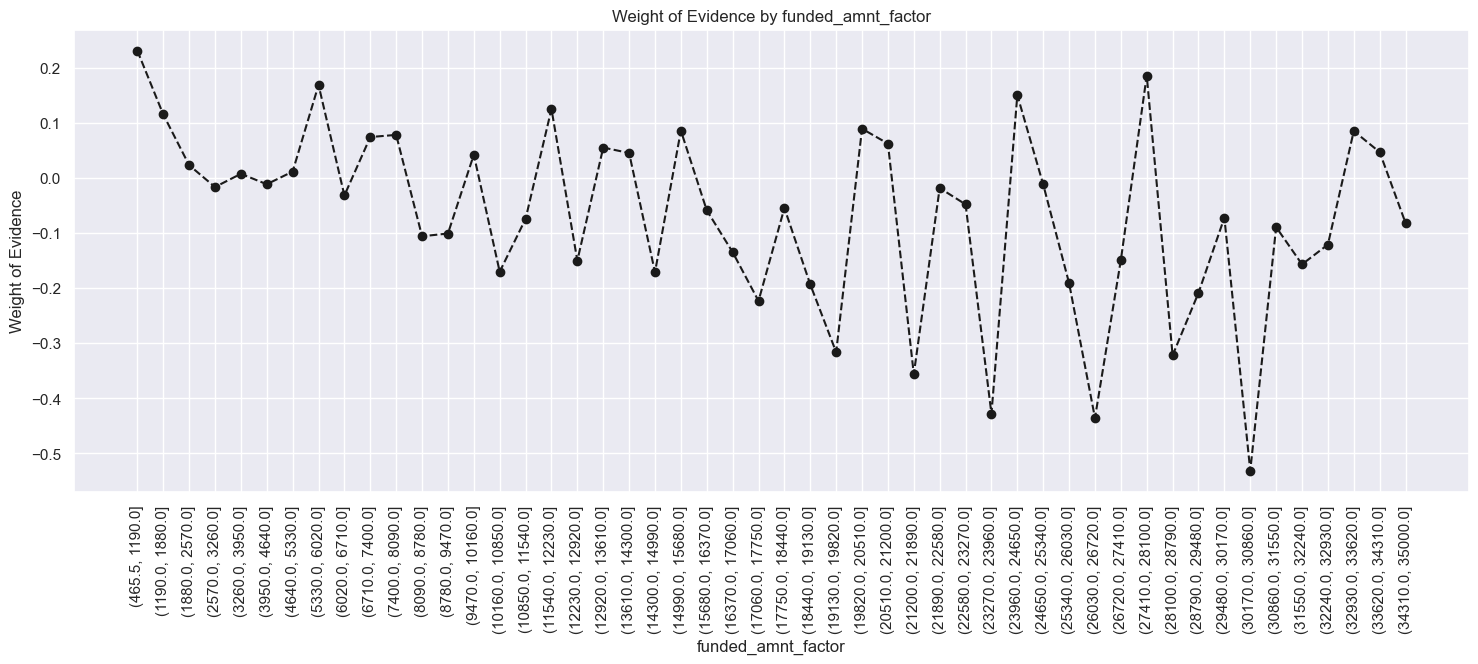

In [132]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [133]:
#higher the rate of intrest higher the chance of default

In [134]:
# mths_since_earliest_cr_line
df_inputs_prepr['mths_since_earliest_cr_line_factor'] = pd.cut(df_inputs_prepr['mths_since_earliest_cr_line'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'mths_since_earliest_cr_line_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

mths_since_earliest_cr_line_factor  n_obs  prop_good  prop_n_obs   n_good  \
0                     (-0.587, 11.74]     22   0.863636    0.000063     19.0   
1                      (11.74, 23.48]      0        NaN    0.000000      NaN   
2                      (23.48, 35.22]      0        NaN    0.000000      NaN   
3                      (35.22, 46.96]      0        NaN    0.000000      NaN   
4                       (46.96, 58.7]      0        NaN    0.000000      NaN   
5                       (58.7, 70.44]      0        NaN    0.000000      NaN   
6                      (70.44, 82.18]    685   0.894891    0.001959    613.0   
7                      (82.18, 93.92]   1808   0.887168    0.005170   1604.0   
8                     (93.92, 105.66]   2629   0.858501    0.007518   2257.0   
9                     (105.66, 117.4]   4785   0.870219    0.013683   4164.0   
10                    (117.4, 129.14]   8665   0.864974    0.024777   7495.0   
11                   (129.14, 140.88]  10983   0.865064    0.031406   9501.0   
12                   (140.88, 152.62]  12716   0.875668    0.036361  11135.0   
13                   (152.62, 164.36]  15260   0.879358    0.043636  13419.0   
14                    (164.36, 176.1]  18202   0.883694    0.052048  16085.0   
15                    (176.1, 187.84]  19126   0.888267    0.054691  16989.0   
16                   (187.84, 199.58]  24433   0.884705    0.069866  21616.0   
17                   (199.58, 211.32]  26554   0.885064    0.075931  23502.0   
18                   (211.32, 223.06]  25298   0.886276    0.072339  22421.0   
19                    (223.06, 234.8]  20529   0.889279    0.058702  18256.0   
20                    (234.8, 246.54]  18458   0.889533    0.052780  16419.0   
21                   (246.54, 258.28]  16995   0.895263    0.048597  15215.0   
22                   (258.28, 270.02]  16859   0.893351    0.048208  15061.0   
23                   (270.02, 281.76]  13943   0.902173    0.039870  12579.0   
24                    (281.76, 293.5]  13321   0.902260    0.038091  12019.0   
25                    (293.5, 305.24]   9594   0.907546    0.027434   8707.0   
26                   (305.24, 316.98]   7159   0.904177    0.020471   6473.0   
27                   (316.98, 328.72]   8062   0.901761    0.023053   7270.0   
28                   (328.72, 340.46]   7780   0.906298    0.022247   7051.0   
29                    (340.46, 352.2]   6803   0.901220    0.019453   6131.0   
30                    (352.2, 363.94]   5182   0.910652    0.014818   4719.0   
31                   (363.94, 375.68]   5118   0.912270    0.014635   4669.0   
32                   (375.68, 387.42]   4365   0.909507    0.012482   3970.0   
33                   (387.42, 399.16]   3946   0.908768    0.011284   3586.0   
34                    (399.16, 410.9]   3278   0.903295    0.009373   2961.0   
35                    (410.9, 422.64]   2881   0.905935    0.008238   2610.0   
36                   (422.64, 434.38]   2132   0.913696    0.006096   1948.0   
37                   (434.38, 446.12]   1680   0.920833    0.004804   1547.0   
38                   (446.12, 457.86]   1382   0.908828    0.003952   1256.0   
39                    (457.86, 469.6]   1514   0.911493    0.004329   1380.0   
40                    (469.6, 481.34]   1489   0.916051    0.004258   1364.0   
41                   (481.34, 493.08]   1172   0.902730    0.003351   1058.0   
42                   (493.08, 504.82]    802   0.915212    0.002293    734.0   
43                   (504.82, 516.56]    717   0.916318    0.002050    657.0   
44                    (516.56, 528.3]    599   0.899833    0.001713    539.0   
45                    (528.3, 540.04]    537   0.916201    0.001536    492.0   
46                   (540.04, 551.78]    442   0.916290    0.001264    405.0   
47                   (551.78, 563.52]    310   0.893548    0.000886    277.0   
48                   (563.52, 575.26]    330   0.890909    0.000944    294.0   
49 

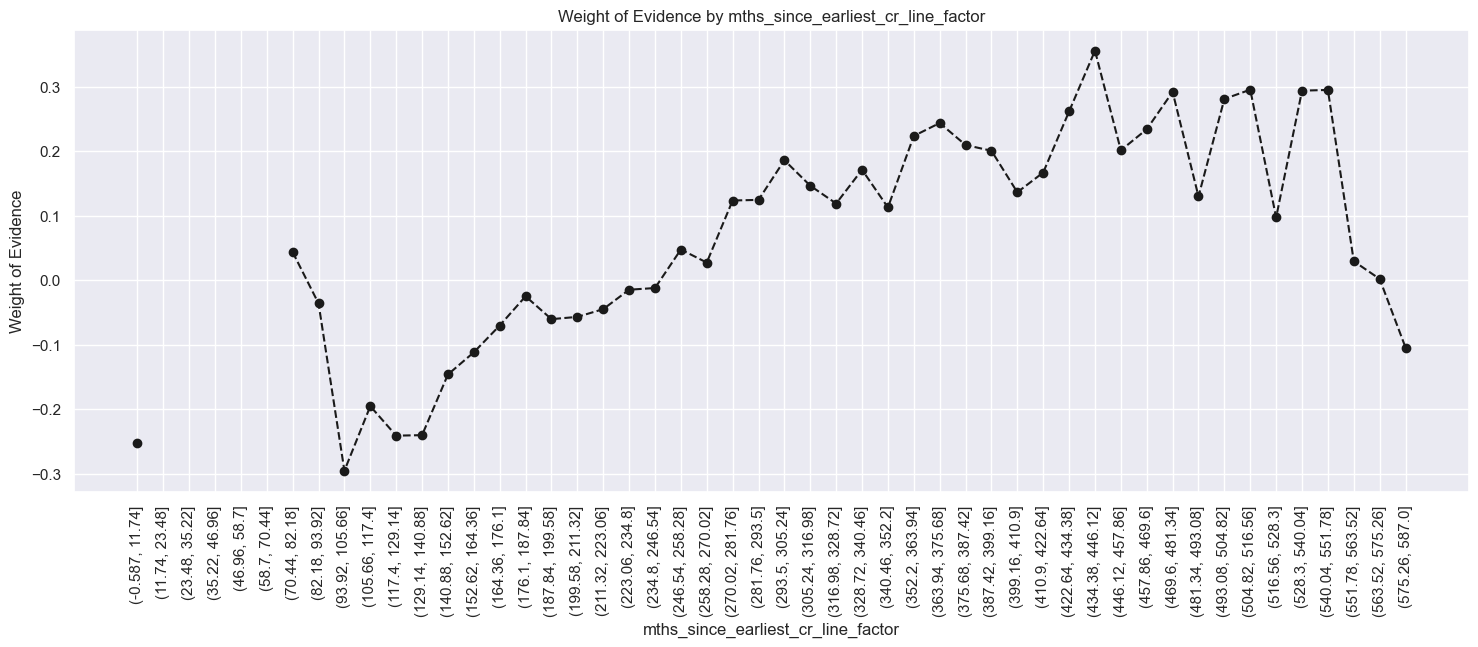

In [135]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

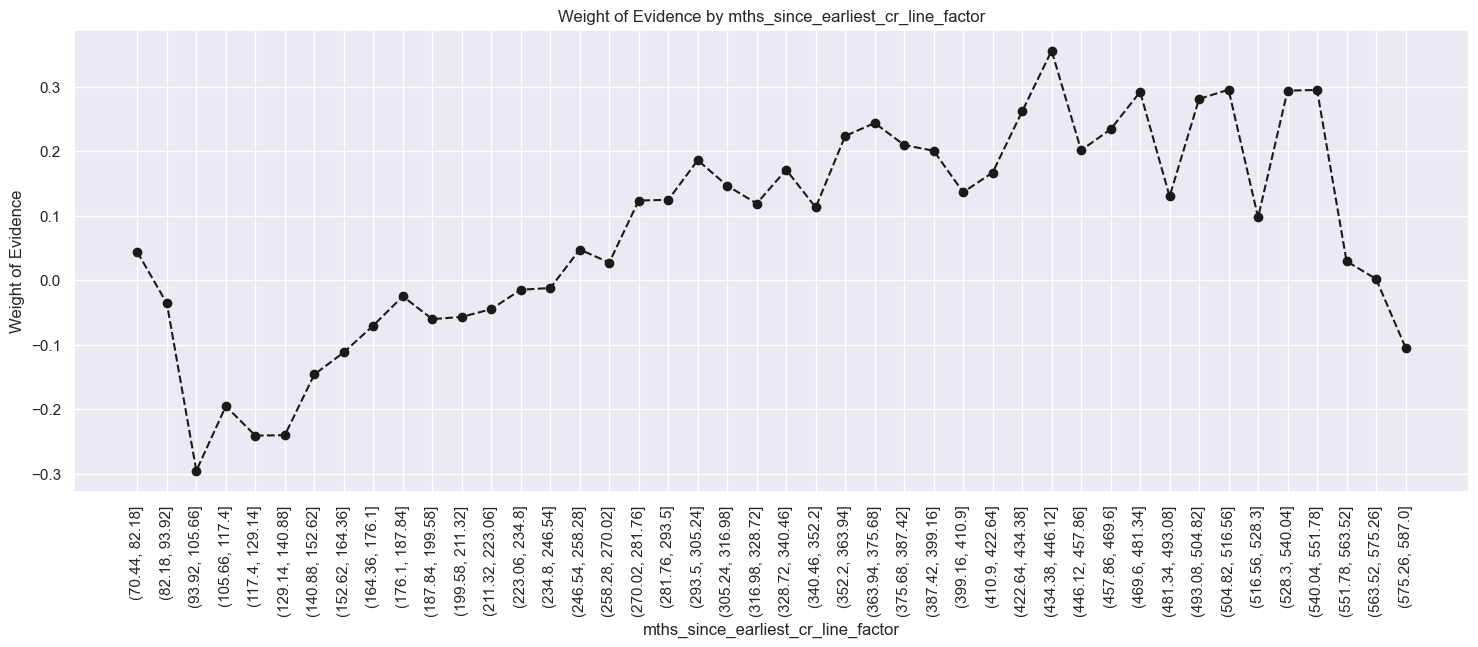

In [136]:
plot_by_woe(df_temp.iloc[6: , : ], 90)
# We plot the weight of evidence values.

In [137]:
df_inputs_prepr

Unnamed: 0        id  member_id  loan_amnt  funded_amnt  \
462574      462574  10152284   12003542      11200        11200   
199825      199825   1462548    1718054       7200         7200   
259957      259957  34482005   37145277      15000        15000   
176933      176933   2654773    3196924      30000        30000   
298            298   1065717    1299834       8000         8000   
...            ...       ...        ...        ...          ...   
259178      259178  34392215   37055507       5000         5000   
365838      365838  19345890   21548652      20000        20000   
131932      131932   5145550    6467765      19200        19200   
146867      146867   4374922    5607101      15500        15500   
121958      121958   5935292    7407427      14075        14075   

        funded_amnt_inv        term  int_rate  installment grade sub_grade  \
462574          11200.0   60 months     14.47       263.35     C        C2   
199825           7200.0   36 months     12.12       239.56     B        B3   
259957          15000.0   60 months     15.59       361.52     D        D1   
176933          30000.0   36 months     14.09      1026.65     B        B5   
298              8000.0   36 months     11.71       264.61     B        B3   
...                 ...         ...       ...          ...   ...       ...   
259178           5000.0   36 months      8.67       158.24     B        B1   
365838          20000.0   36 months     12.49       668.98     B        B5   
131932          19175.0   36 months     14.09       657.06     B        B5   
146867          15500.0   36 months     11.14       508.48     B        B2   
121958          14075.0   36 months     11.55       464.48     B        B3   

                          emp_title emp_length home_ownership  annual_inc  \
462574                      Teacher  10+ years       MORTGAGE     65450.0   
199825                 Bonnier Corp  10+ years       MORTGAGE    107000.0   
259957              Revenue Officer    5 years       MORTGAGE     54000.0   
176933                    Transfast   < 1 year           RENT    105000.0   
298                       Draft FCB     1 year           RENT    150000.0   
...                             ...        ...            ...         ...   
259178  Clinical Admission Director    3 years       MORTGAGE     71000.0   
365838              Superintendent   10+ years           RENT     72000.0   
131932     Larsen & Toubro Infotech  10+ years           RENT     80000.0   
146867           City of Fall River  10+ years       MORTGAGE     69000.0   
121958           Clancy's Auto Body     1 year       MORTGAGE     41500.0   

       verification_status issue_d loan_status pymnt_plan  \
462574            Verified  Jan-14     Current          n   
199825        Not Verified  Sep-12  Fully Paid          n   
259957        Not Verified  Nov-14     Current          n   
176933     Source Verified  Jan-13  Fully Paid          n   
298           Not Verified  Dec-11  Fully Paid          n   
...                    ...     ...         ...        ...   
259178        Not Verified  Nov-14     Current          n   
365838     Source Verified  Jun-14     Current          n   
131932        Not Verified  Jun-13     Current          n   
146867            Verified  Apr-13     Current          n   
121958        Not Verified  Jul-13     Current          n   

                                                      url  \
462574  https://www.lendingclub.com/browse/loanDetail....   
199825  https://www.lendingclub.com/browse/loanDetail....   
259957  https://www.lendingclub.com/browse/loanDetail....   
176933  https://www.lendingclub.com/browse/loanDetail....   
298     https://www.lendingclub.com/browse/loanDetail....   
...                                                   ...   
259178  https://www.lendingclub.com/browse/loanDetail....   
365838  https://www.lendingclub.com/browse/loanDetail....   
131932  https://www.lendingclub.com/browse/loanDetail....  

In [138]:
# We create the following categories:
# < 140, # 141 - 164, # 165 - 247, # 248 - 270, # 271 - 352, # > 352
df_inputs_prepr['mths_since_earliest_cr_line:<140'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(140)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:141-164'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(140, 165)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:165-247'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(165, 248)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:248-270'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(248, 271)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:271-352'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(271, 353)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:>352'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(353, int(df_inputs_prepr['mths_since_earliest_cr_line'].max()))), 1, 0)

In [139]:
# delinq_2yrs
df_temp = woe_ordered_continuous(df_inputs_prepr, 'delinq_2yrs', df_targets_prepr)
# We calculate weight of evidence.
df_temp

delinq_2yrs   n_obs  prop_good  prop_n_obs    n_good    n_bad  \
0           0.0  287204   0.890586    0.821256  255780.0  31424.0   
1           1.0   42141   0.893026    0.120502   37633.0   4508.0   
2           2.0   12357   0.889455    0.035335   10991.0   1366.0   
3           3.0    4255   0.882726    0.012167    3756.0    499.0   
4           4.0    1745   0.897421    0.004990    1566.0    179.0   
5           5.0     911   0.878156    0.002605     800.0    111.0   
6           6.0     467   0.899358    0.001335     420.0     47.0   
7           7.0     259   0.868726    0.000741     225.0     34.0   
8           8.0     138   0.898551    0.000395     124.0     14.0   
9           9.0      82   0.878049    0.000234      72.0     10.0   
10         10.0      51   0.862745    0.000146      44.0      7.0   
11         11.0      30   0.900000    0.000086      27.0      3.0   
12         12.0      27   0.703704    0.000077      19.0      8.0   
13         13.0      18   0.833333    0.000051      15.0      3.0   
14         14.0       6   0.833333    0.000017       5.0      1.0   
15         15.0       6   0.833333    0.000017       5.0      1.0   
16         16.0       4   1.000000    0.000011       4.0      0.0   
17         17.0       3   0.666667    0.000009       2.0      1.0   
18         18.0       2   0.500000    0.000006       1.0      1.0   
19         19.0       2   1.000000    0.000006       2.0      0.0   
20         21.0       2   0.500000    0.000006       1.0      1.0   
21         22.0       2   1.000000    0.000006       2.0      0.0   
22         29.0       1   1.000000    0.000003       1.0      0.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good      diff_WoE   IV  
0      0.821137    0.822230 -0.001331             NaN           NaN  inf  
1      0.120814    0.117955  0.023951        0.002439  2.528196e-02  inf  
2      0.035285    0.035742 -0.012887        0.003570  3.683773e-02  inf  
3      0.012058    0.013057 -0.079573        0.006729  6.668625e-02  inf  
4      0.005027    0.004684  0.070817        0.014695  1.503903e-01  inf  
5      0.002568    0.002904 -0.122995        0.019265  1.938125e-01  inf  
6      0.001348    0.001230  0.092030        0.021202  2.150256e-01  inf  
7      0.000722    0.000890 -0.208337        0.030632  3.003672e-01  inf  
8      0.000398    0.000366  0.083148        0.029825  2.914844e-01  inf  
9      0.000231    0.000262 -0.123996        0.020502  2.071432e-01  inf  
10     0.000141    0.000183 -0.259797        0.015304  1.358015e-01  inf  
11     0.000087    0.000078  0.099148        0.037255  3.589451e-01  inf  
12     0.000061    0.000209 -1.233079        0.196296  1.332227e+00  inf  
13     0.000048    0.000078 -0.488639        0.129630  7.444405e-01  inf  
14     0.000016    0.000026 -0.488639        0.000000  1.665335e-16  inf  
15     0.000016    0.000026 -0.488639        0.000000  0.000000e+00  inf  
16     0.000013    0.000000       inf        0.166667           inf  inf  
17     0.000006    0.000026 -1.404929        0.333333           inf  inf  
18     0.000003    0.000026 -2.098077        0.166667  6.931472e-01  inf  
19     0.000006    0.000000       inf        0.500000           inf  inf  
20     0.000003    0.000026 -2.098077        0.500000           inf  inf  
21     0.000006    0.000000       inf        0.500000           inf  inf  
22     0.000003    0.000000       inf        0.000000           NaN  inf

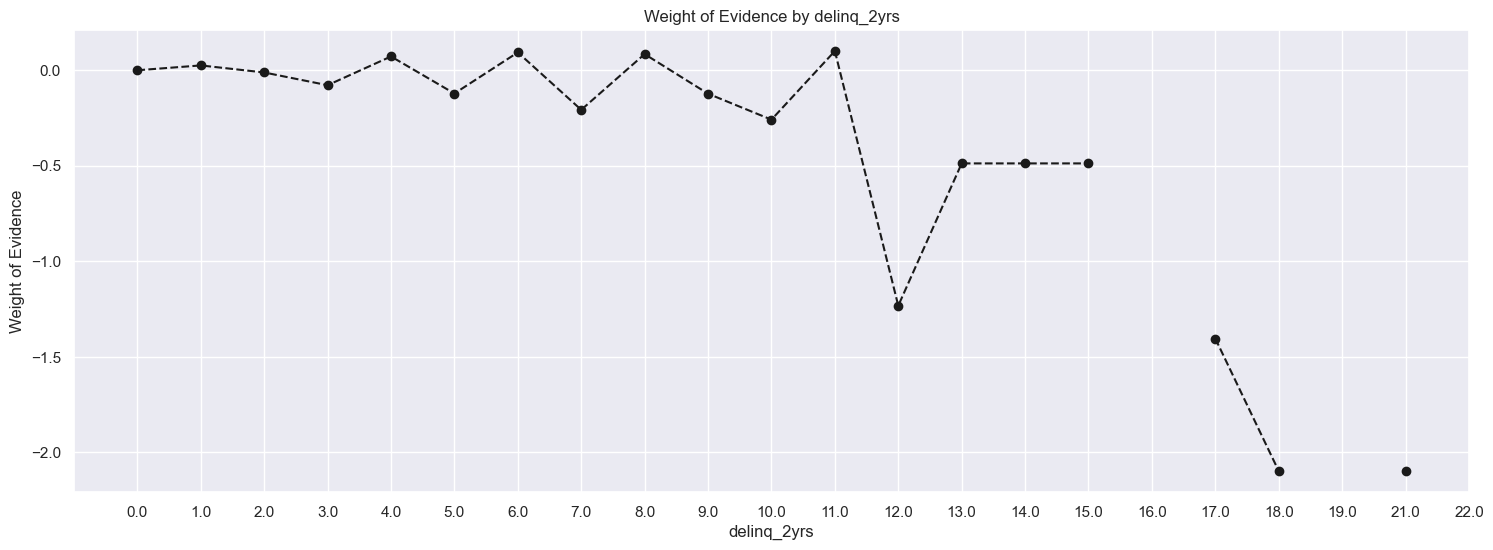

In [140]:
plot_by_woe(df_temp)
# We plot the weight of evidence values.

In [141]:
# Categories: 0, 1-3, >=4
df_inputs_prepr['delinq_2yrs:0'] = np.where((df_inputs_prepr['delinq_2yrs'] == 0), 1, 0)
df_inputs_prepr['delinq_2yrs:1-3'] = np.where((df_inputs_prepr['delinq_2yrs'] >= 1) & (df_inputs_prepr['delinq_2yrs'] <= 3), 1, 0)
df_inputs_prepr['delinq_2yrs:>=4'] = np.where((df_inputs_prepr['delinq_2yrs'] >= 9), 1, 0)

In [142]:
# inq_last_6mths
df_temp = woe_ordered_continuous(df_inputs_prepr, 'inq_last_6mths', df_targets_prepr)
# We calculate weight of evidence.
df_temp

inq_last_6mths   n_obs  prop_good  prop_n_obs    n_good    n_bad  \
0              0.0  181037   0.908477    0.517673  164468.0  16569.0   
1              1.0   97660   0.884958    0.279258   86425.0  11235.0   
2              2.0   43404   0.864413    0.124113   37519.0   5885.0   
3              3.0   18820   0.839532    0.053816   15800.0   3020.0   
4              4.0    5431   0.846437    0.015530    4597.0    834.0   
5              5.0    2086   0.827421    0.005965    1726.0    360.0   
6              6.0     926   0.788337    0.002648     730.0    196.0   
7              7.0     144   0.659722    0.000412      95.0     49.0   
8              8.0      93   0.666667    0.000266      62.0     31.0   
9              9.0      41   0.682927    0.000117      28.0     13.0   
10            10.0      17   0.882353    0.000049      15.0      2.0   
11            11.0       8   0.625000    0.000023       5.0      3.0   
12            12.0      11   0.545455    0.000031       6.0      5.0   
13            13.0       5   0.800000    0.000014       4.0      1.0   
14            14.0       5   0.200000    0.000014       1.0      4.0   
15            15.0       9   0.444444    0.000026       4.0      5.0   
16            16.0       3   1.000000    0.000009       3.0      0.0   
17            17.0       2   0.500000    0.000006       1.0      1.0   
18            18.0       2   0.500000    0.000006       1.0      1.0   
19            19.0       1   1.000000    0.000003       1.0      0.0   
20            20.0       1   0.000000    0.000003       0.0      1.0   
21            24.0       1   1.000000    0.000003       1.0      0.0   
22            25.0       1   0.000000    0.000003       0.0      1.0   
23            27.0       1   1.000000    0.000003       1.0      0.0   
24            28.0       1   1.000000    0.000003       1.0      0.0   
25            31.0       1   1.000000    0.000003       1.0      0.0   
26            32.0       1   0.000000    0.000003       0.0      1.0   
27            33.0       1   0.000000    0.000003       0.0      1.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0      0.527996    0.433539  0.197106             NaN       NaN  inf  
1      0.277452    0.293971 -0.057834        0.023519  0.254939  inf  
2      0.120448    0.153985 -0.245636        0.020545  0.187802  inf  
3      0.050723    0.079020 -0.443324        0.024881  0.197688  inf  
4      0.014758    0.021822 -0.391151        0.006905  0.052173  inf  
5      0.005541    0.009420 -0.530619        0.019016  0.139468  inf  
6      0.002344    0.005128 -0.783147        0.039084  0.252528  inf  
7      0.000305    0.001282 -1.436020        0.128615  0.652873  inf  
8      0.000199    0.000811 -1.404929        0.006944  0.031091  inf  
9      0.000090    0.000340 -1.330822        0.016260  0.074108  inf  
10     0.000048    0.000052 -0.083174        0.199426  1.247648  inf  
11     0.000016    0.000078 -1.587251        0.257353  1.504077  inf  
12     0.000019    0.000131 -1.915755        0.079545  0.328504  inf  
13     0.000013    0.000026 -0.711782        0.254545  1.203973  inf  
14     0.000003    0.000105 -3.484371        0.600000  2.772589  inf  
15     0.000013    0.000131 -2.321220        0.244444  1.163151  inf  
16     0.000010    0.000000       inf        0.555556       inf  inf  
17     0.000003    0.000026 -2.098077        0.500000       inf  inf  
18     0.000003    0.000026 -2.098077        0.000000  0.000000  inf  
19     0.000003    0.000000       inf        0.500000       inf  inf  
20     0.000000    0.000026      -inf        1.000000       inf  inf  
21     0.000003    0.000000       inf        1.000000       inf  inf  
22     0.000000    0.000026      -inf        1.000000       inf  inf  
23     0.000003    0.000000       inf        1.000000       inf  inf  
24     0.000003    0.000000       inf        0.000000       NaN  inf  
25     0.000003    0.000000       inf        0.000000       NaN  inf 

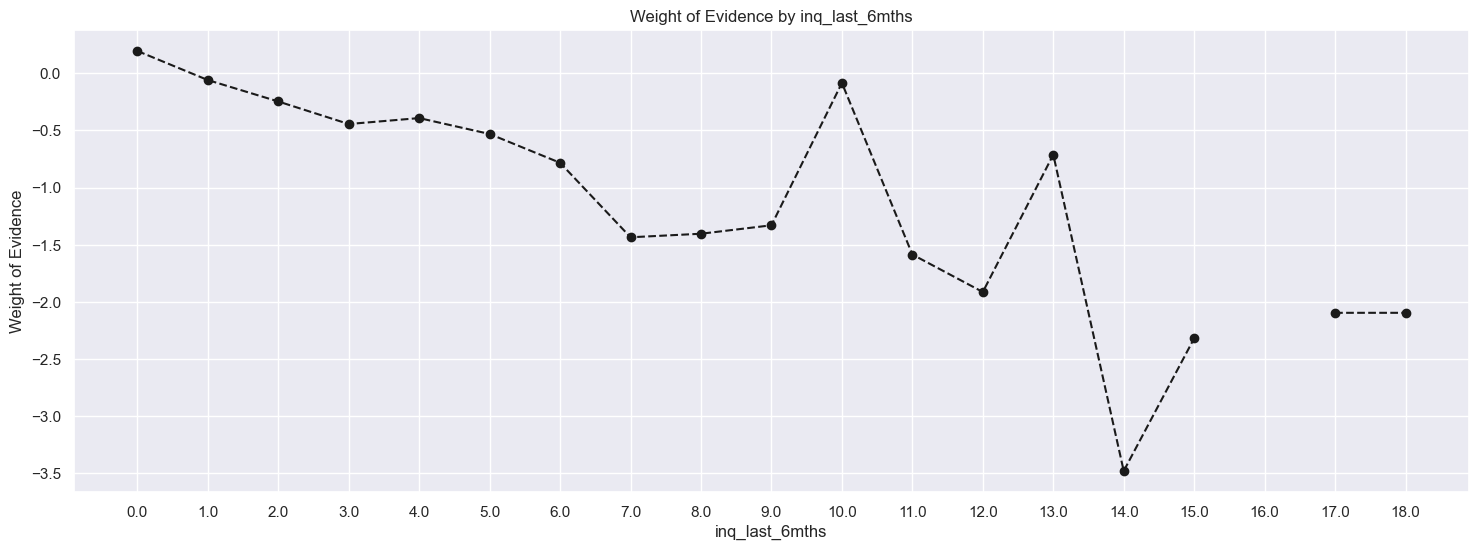

In [143]:
plot_by_woe(df_temp)
# We plot the weight of evidence values.

In [144]:
# Categories: 0, 1 - 2, 3 - 6, > 6
df_inputs_prepr['inq_last_6mths:0'] = np.where((df_inputs_prepr['inq_last_6mths'] == 0), 1, 0)
df_inputs_prepr['inq_last_6mths:1-2'] = np.where((df_inputs_prepr['inq_last_6mths'] >= 1) & (df_inputs_prepr['inq_last_6mths'] <= 2), 1, 0)
df_inputs_prepr['inq_last_6mths:3-6'] = np.where((df_inputs_prepr['inq_last_6mths'] >= 3) & (df_inputs_prepr['inq_last_6mths'] <= 6), 1, 0)
df_inputs_prepr['inq_last_6mths:>6'] = np.where((df_inputs_prepr['inq_last_6mths'] > 6), 1, 0)

In [145]:
# open_acc
df_temp = woe_ordered_continuous(df_inputs_prepr, 'open_acc', df_targets_prepr)
# We calculate weight of evidence.
df_temp

open_acc  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0        0.0     27   0.740741    0.000077     20.0     7.0     0.000064   
1        1.0    102   0.862745    0.000292     88.0    14.0     0.000283   
2        2.0   1374   0.844978    0.003929   1161.0   213.0     0.003727   
3        3.0   4090   0.873594    0.011695   3573.0   517.0     0.011470   
4        4.0   9392   0.891184    0.026856   8370.0  1022.0     0.026870   
5        5.0  16105   0.889786    0.046052  14330.0  1775.0     0.046004   
6        6.0  23057   0.892007    0.065931  20567.0  2490.0     0.066027   
7        7.0  28255   0.891878    0.080795  25200.0  3055.0     0.080900   
8        8.0  31523   0.891254    0.090140  28095.0  3428.0     0.090194   
9        9.0  33018   0.889000    0.094415  29353.0  3665.0     0.094233   
10      10.0  31776   0.888878    0.090863  28245.0  3531.0     0.090676   
11      11.0  29350   0.886508    0.083926  26019.0  3331.0     0.083529   
12      12.0  26011   0.889355    0.074378  23133.0  2878.0     0.074264   
13      13.0  22425   0.895741    0.064124  20087.0  2338.0     0.064486   
14      14.0  18544   0.888913    0.053026  16484.0  2060.0     0.052919   
15      15.0  15197   0.891229    0.043456  13544.0  1653.0     0.043481   
16      16.0  12691   0.894492    0.036290  11352.0  1339.0     0.036444   
17      17.0  10005   0.894053    0.028609   8945.0  1060.0     0.028716   
18      18.0   8057   0.895495    0.023039   7215.0   842.0     0.023162   
19      19.0   6455   0.893726    0.018458   5769.0   686.0     0.018520   
20      20.0   4887   0.893391    0.013974   4366.0   521.0     0.014016   
21      21.0   3989   0.897468    0.011406   3580.0   409.0     0.011493   
22      22.0   3133   0.890201    0.008959   2789.0   344.0     0.008954   
23      23.0   2379   0.902480    0.006803   2147.0   232.0     0.006893   
24      24.0   1858   0.892357    0.005313   1658.0   200.0     0.005323   
25      25.0   1465   0.889420    0.004189   1303.0   162.0     0.004183   
26      26.0    998   0.904810    0.002854    903.0    95.0     0.002899   
27      27.0    810   0.903704    0.002316    732.0    78.0     0.002350   
28      28.0    565   0.907965    0.001616    513.0    52.0     0.001647   
29      29.0    463   0.902808    0.001324    418.0    45.0     0.001342   
30      30.0    355   0.884507    0.001015    314.0    41.0     0.001008   
31      31.0    271   0.907749    0.000775    246.0    25.0     0.000790   
32      32.0    222   0.900901    0.000635    200.0    22.0     0.000642   
33      33.0    165   0.884848    0.000472    146.0    19.0     0.000469   
34      34.0    132   0.909091    0.000377    120.0    12.0     0.000385   
35      35.0    120   0.916667    0.000343    110.0    10.0     0.000353   
36      36.0    100   0.870000    0.000286     87.0    13.0     0.000279   
37      37.0     75   0.893333    0.000214     67.0     8.0     0.000215   
38      38.0     61   0.868852    0.000174     53.0     8.0     0.000170   
39      39.0     54   0.925926    0.000154     50.0     4.0     0.000161   
40      40.0     28   0.928571    0.000080     26.0     2.0     0.000083   
41      41.0     29   0.862069    0.000083     25.0     4.0     0.000080   
42      42.0     21   0.952381    0.000060     20.0     1.0     0.000064   
43      43.0     14   0.928571    0.000040     13.0     1.0     0.000042   
44      44.0     11   0.909091    0.000031     10.0     1.0     0.000032   
45      45.0     12   0.833333    0.000034     10.0     2.0     0.000032   
46      46.0      4   1.000000    0.000011      4.0     0.0     0.000013   
47      47.0      6   0.833333    0.000017      5.0     1.0     0.000016   
48      48.0      4   1.000000    0.000011      4.0     0.0     0.000013   
49      49.0      5   1.000000    0.000014      5.0     0.0     0.000016   
50      50.0      4   1.000000    0.000011      4.0     0.0     0.000013   
51      51.0      5   1.000000    0.000014      5.0 

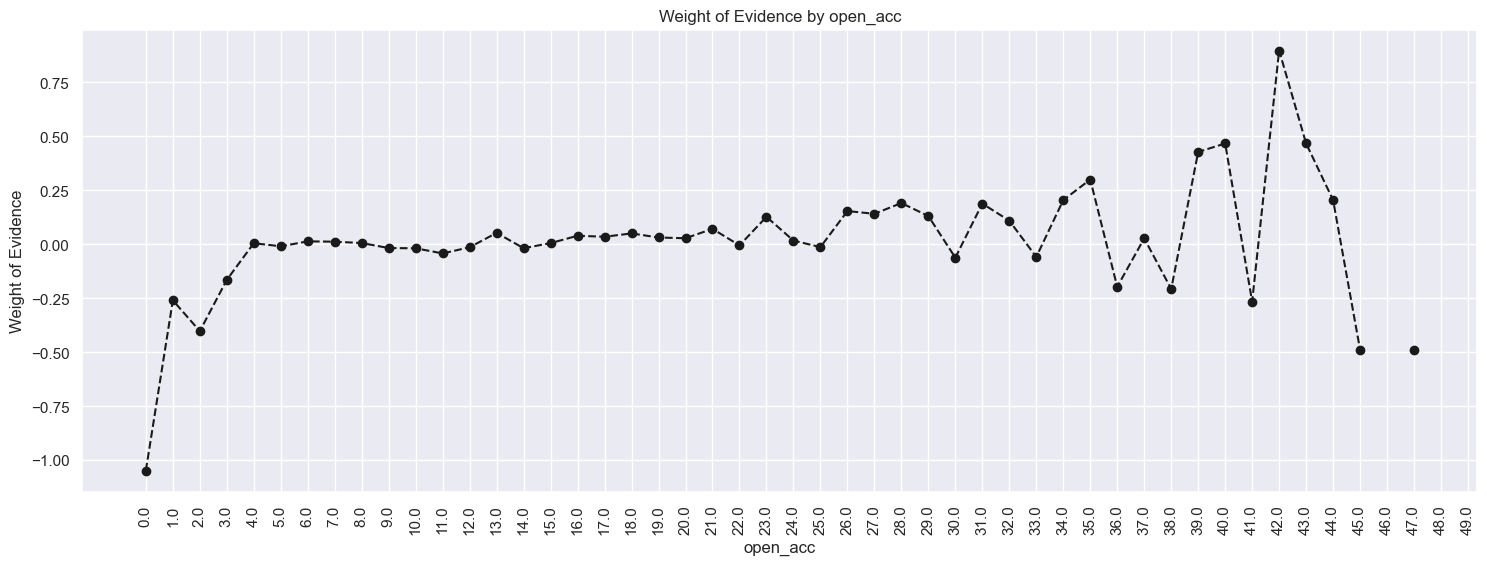

In [146]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

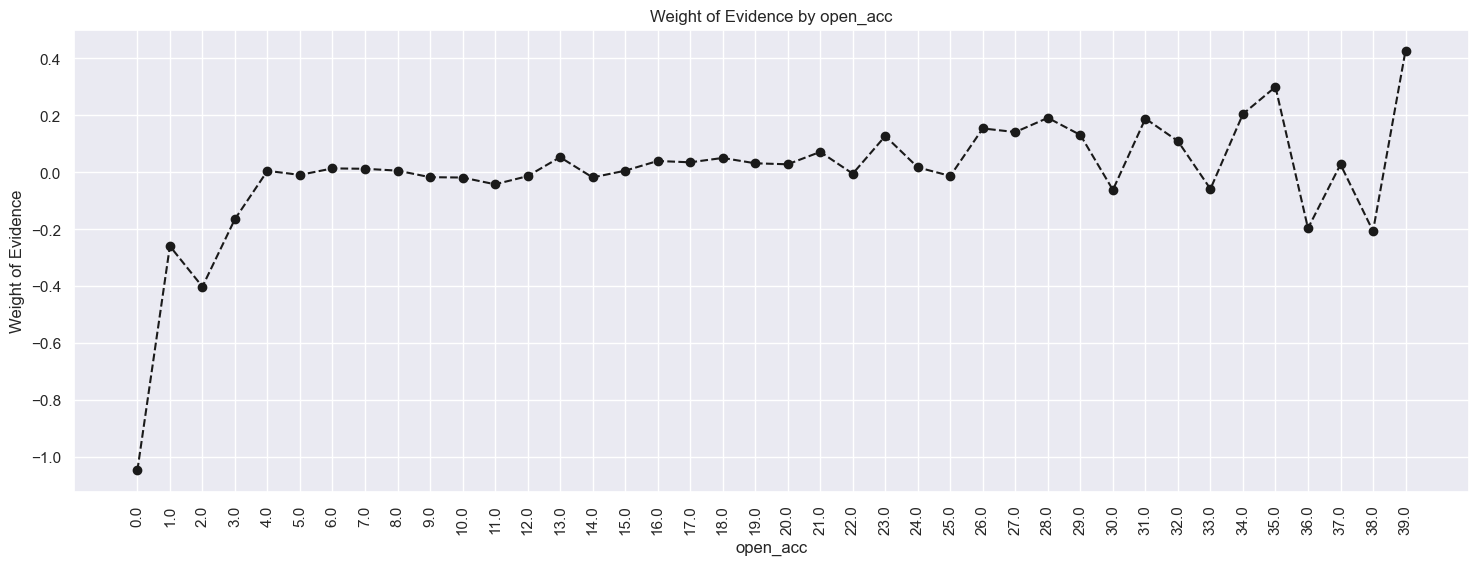

In [147]:
plot_by_woe(df_temp.iloc[ : 40, :], 90)
# We plot the weight of evidence values.

In [148]:
# Categories: '0', '1-3', '4-12', '13-17', '18-22', '23-25', '26-30', '>30'
df_inputs_prepr['open_acc:0'] = np.where((df_inputs_prepr['open_acc'] == 0), 1, 0)
df_inputs_prepr['open_acc:1-3'] = np.where((df_inputs_prepr['open_acc'] >= 1) & (df_inputs_prepr['open_acc'] <= 3), 1, 0)
df_inputs_prepr['open_acc:4-12'] = np.where((df_inputs_prepr['open_acc'] >= 4) & (df_inputs_prepr['open_acc'] <= 12), 1, 0)
df_inputs_prepr['open_acc:13-17'] = np.where((df_inputs_prepr['open_acc'] >= 13) & (df_inputs_prepr['open_acc'] <= 17), 1, 0)
df_inputs_prepr['open_acc:18-22'] = np.where((df_inputs_prepr['open_acc'] >= 18) & (df_inputs_prepr['open_acc'] <= 22), 1, 0)
df_inputs_prepr['open_acc:23-25'] = np.where((df_inputs_prepr['open_acc'] >= 23) & (df_inputs_prepr['open_acc'] <= 25), 1, 0)
df_inputs_prepr['open_acc:26-30'] = np.where((df_inputs_prepr['open_acc'] >= 26) & (df_inputs_prepr['open_acc'] <= 30), 1, 0)
df_inputs_prepr['open_acc:>=31'] = np.where((df_inputs_prepr['open_acc'] >= 31), 1, 0)

In [149]:
# pub_rec
df_temp = woe_ordered_continuous(df_inputs_prepr, 'pub_rec', df_targets_prepr)
# We calculate weight of evidence.
df_temp

pub_rec   n_obs  prop_good  prop_n_obs    n_good    n_bad  prop_n_good  \
0       0.0  303755   0.889980    0.868584  270336.0  33419.0     0.867866   
1       1.0   39743   0.893365    0.113645   35505.0   4238.0     0.113983   
2       2.0    4230   0.903073    0.012096    3820.0    410.0     0.012263   
3       3.0    1207   0.921292    0.003451    1112.0     95.0     0.003570   
4       4.0     382   0.921466    0.001092     352.0     30.0     0.001130   
5       5.0     185   0.918919    0.000529     170.0     15.0     0.000546   
6       6.0     105   0.942857    0.000300      99.0      6.0     0.000318   
7       7.0      44   0.954545    0.000126      42.0      2.0     0.000135   
8       8.0      24   1.000000    0.000069      24.0      0.0     0.000077   
9       9.0      12   0.750000    0.000034       9.0      3.0     0.000029   
10     10.0       9   1.000000    0.000026       9.0      0.0     0.000029   
11     11.0       3   1.000000    0.000009       3.0      0.0     0.000010   
12     12.0       1   1.000000    0.000003       1.0      0.0     0.000003   
13     13.0       2   1.000000    0.000006       2.0      0.0     0.000006   
14     15.0       1   1.000000    0.000003       1.0      0.0     0.000003   
15     16.0       1   1.000000    0.000003       1.0      0.0     0.000003   
16     17.0       1   1.000000    0.000003       1.0      0.0     0.000003   
17     18.0       2   1.000000    0.000006       2.0      0.0     0.000006   
18     19.0       1   1.000000    0.000003       1.0      0.0     0.000003   
19     21.0       1   1.000000    0.000003       1.0      0.0     0.000003   
20     34.0       1   1.000000    0.000003       1.0      0.0     0.000003   
21     40.0       1   1.000000    0.000003       1.0      0.0     0.000003   
22     54.0       1   1.000000    0.000003       1.0      0.0     0.000003   
23     63.0       1   1.000000    0.000003       1.0      0.0     0.000003   

    prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0     0.874431 -0.007536             NaN       NaN  inf  
1     0.110890  0.027505        0.003384  0.035041  inf  
2     0.010728  0.133772        0.009708  0.106266  inf  
3     0.002486  0.361962        0.018219  0.228190  inf  
4     0.000785  0.364357        0.000174  0.002395  inf  
5     0.000392  0.329672        0.002547  0.034686  inf  
6     0.000157  0.705284        0.023938  0.375612  inf  
7     0.000052  0.946446        0.011688  0.241162  inf  
8     0.000000       inf        0.045455       inf  inf  
9     0.000078 -0.999464        0.250000       inf  inf  
10    0.000000       inf        0.250000       inf  inf  
11    0.000000       inf        0.000000       NaN  inf  
12    0.000000       inf        0.000000       NaN  inf  
13    0.000000       inf        0.000000       NaN  inf  
14    0.000000       inf        0.000000       NaN  inf  
15    0.000000       inf        0.000000       NaN  inf  
16    0.000000       inf        0.000000       NaN  inf  
17    0.000000       inf        0.000000       NaN  inf  
18    0.000000       inf        0.000000       NaN  inf  
19    0.000000       inf        0.000000       NaN  inf  
20    0.000000       inf        0.000000       NaN  inf  
21    0.000000       inf        0.000000       NaN  inf  
22    0.000000       inf        0.000000       NaN  inf  
23    0.000000       inf        0.000000       NaN  inf

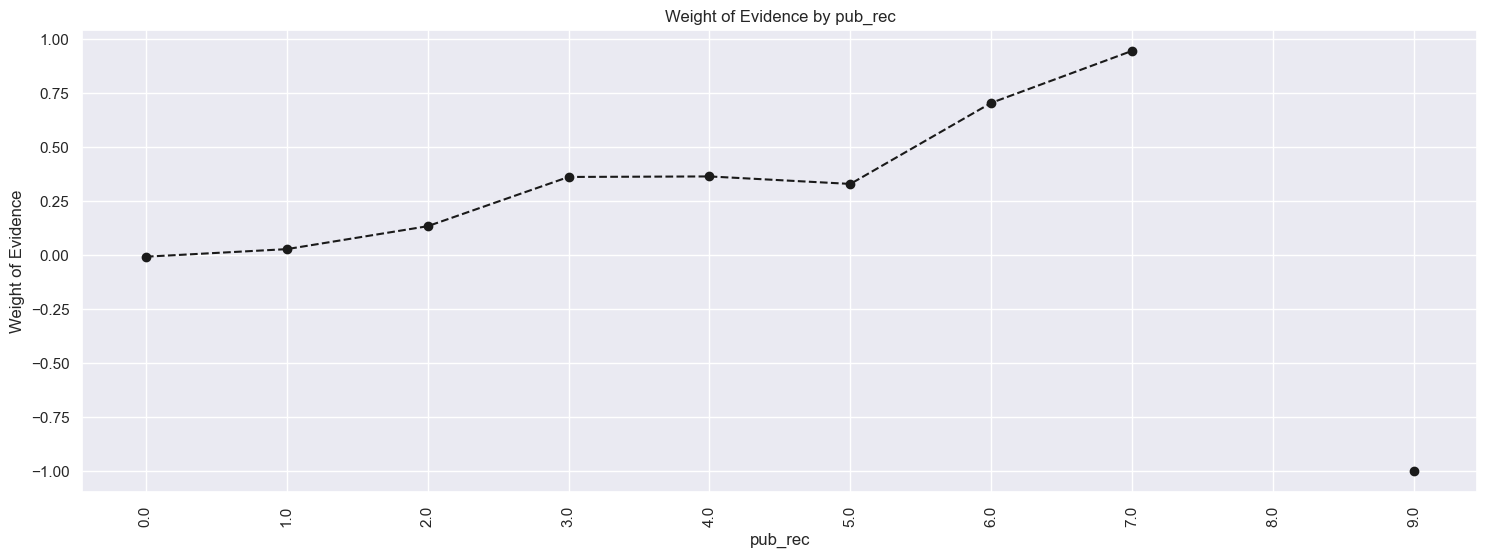

In [150]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [151]:
# Categories '0-2', '3-4', '>=5'
df_inputs_prepr['pub_rec:0-2'] = np.where((df_inputs_prepr['pub_rec'] >= 0) & (df_inputs_prepr['pub_rec'] <= 2), 1, 0)
df_inputs_prepr['pub_rec:3-4'] = np.where((df_inputs_prepr['pub_rec'] >= 3) & (df_inputs_prepr['pub_rec'] <= 4), 1, 0)
df_inputs_prepr['pub_rec:>=5'] = np.where((df_inputs_prepr['pub_rec'] >= 5), 1, 0)

In [152]:
# total_acc
df_inputs_prepr['total_acc_factor'] = pd.cut(df_inputs_prepr['total_acc'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'total_acc_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

total_acc_factor  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0      (-0.15, 3.0]    439   0.808656    0.001255    355.0    84.0   
1        (3.0, 6.0]   5641   0.863499    0.016130   4871.0   770.0   
2        (6.0, 9.0]  14131   0.872691    0.040407  12332.0  1799.0   
3       (9.0, 12.0]  23595   0.880356    0.067470  20772.0  2823.0   
4      (12.0, 15.0]  31444   0.882649    0.089914  27754.0  3690.0   
5      (15.0, 18.0]  36229   0.887383    0.103596  32149.0  4080.0   
6      (18.0, 21.0]  38103   0.886256    0.108955  33769.0  4334.0   
7      (21.0, 24.0]  37627   0.891647    0.107594  33550.0  4077.0   
8      (24.0, 27.0]  33976   0.895338    0.097154  30420.0  3556.0   
9      (27.0, 30.0]  29823   0.899440    0.085278  26824.0  2999.0   
10     (30.0, 33.0]  24264   0.894947    0.069383  21715.0  2549.0   
11     (33.0, 36.0]  19431   0.898924    0.055563  17467.0  1964.0   
12     (36.0, 39.0]  15104   0.901020    0.043190  13609.0  1495.0   
13     (39.0, 42.0]  11414   0.900911    0.032638  10283.0  1131.0   
14     (42.0, 45.0]   8547   0.897391    0.024440   7670.0   877.0   
15     (45.0, 48.0]   6107   0.895693    0.017463   5470.0   637.0   
16     (48.0, 51.0]   4263   0.899601    0.012190   3835.0   428.0   
17     (51.0, 54.0]   3073   0.910185    0.008787   2797.0   276.0   
18     (54.0, 57.0]   2021   0.902524    0.005779   1824.0   197.0   
19     (57.0, 60.0]   1503   0.897538    0.004298   1349.0   154.0   
20     (60.0, 63.0]   2030   0.894089    0.005805   1815.0   215.0   
21     (63.0, 66.0]    298   0.912752    0.000852    272.0    26.0   
22     (66.0, 69.0]    208   0.913462    0.000595    190.0    18.0   
23     (69.0, 72.0]    112   0.919643    0.000320    103.0     9.0   
24     (72.0, 75.0]    109   0.899083    0.000312     98.0    11.0   
25     (75.0, 78.0]     62   0.919355    0.000177     57.0     5.0   
26     (78.0, 81.0]     49   0.897959    0.000140     44.0     5.0   
27     (81.0, 84.0]     23   0.869565    0.000066     20.0     3.0   
28     (84.0, 87.0]     27   0.962963    0.000077     26.0     1.0   
29     (87.0, 90.0]     22   0.909091    0.000063     20.0     2.0   
30     (90.0, 93.0]     11   0.909091    0.000031     10.0     1.0   
31     (93.0, 96.0]      8   0.875000    0.000023      7.0     1.0   
32     (96.0, 99.0]      4   0.750000    0.000011      3.0     1.0   
33    (99.0, 102.0]      4   1.000000    0.000011      4.0     0.0   
34   (102.0, 105.0]      3   1.000000    0.000009      3.0     0.0   
35   (105.0, 108.0]      1   1.000000    0.000003      1.0     0.0   
36   (108.0, 111.0]      0        NaN    0.000000      NaN     NaN   
37   (111.0, 114.0]      0        NaN    0.000000      NaN     NaN   
38   (114.0, 117.0]      2   1.000000    0.000006      2.0     0.0   
39   (117.0, 120.0]      2   1.000000    0.000006      2.0     0.0   
40   (120.0, 123.0]      1   1.000000    0.000003      1.0     0.0   
41   (123.0, 126.0]      1   1.000000    0.000003      1.0     0.0   
42   (126.0, 129.0]      0        NaN    0.000000      NaN     NaN   
43   (129.0, 132.0]      0        NaN    0.000000      NaN     NaN   
44   (132.0, 135.0]      0        NaN    0.000000      NaN     NaN   
45   (135.0, 138.0]      0        NaN    0.000000      NaN     NaN   
46   (138.0, 141.0]      0        NaN    0.000000      NaN     NaN   
47   (141.0, 144.0]      0        NaN    0.000000      NaN     NaN   
48   (144.0, 147.0]      0        NaN    0.000000      NaN     NaN   
49   (147.0, 150.0]      1   1.000000    0.000003      1.0     0.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0      0.001140    0.002198 -0.656776             NaN       NaN  inf  
1      0.015637    0.020148 -0.253413        0.054843  0.403363  inf  
2      0.039590    0.047072 -0.173110        0.009192  0.080303  inf  
3      0.066685    0.073866 -0.102271        0.007665  0.070839  inf  
4      0.089099    0.096551 -0.080323        0.002293  0.021948  inf  
5     

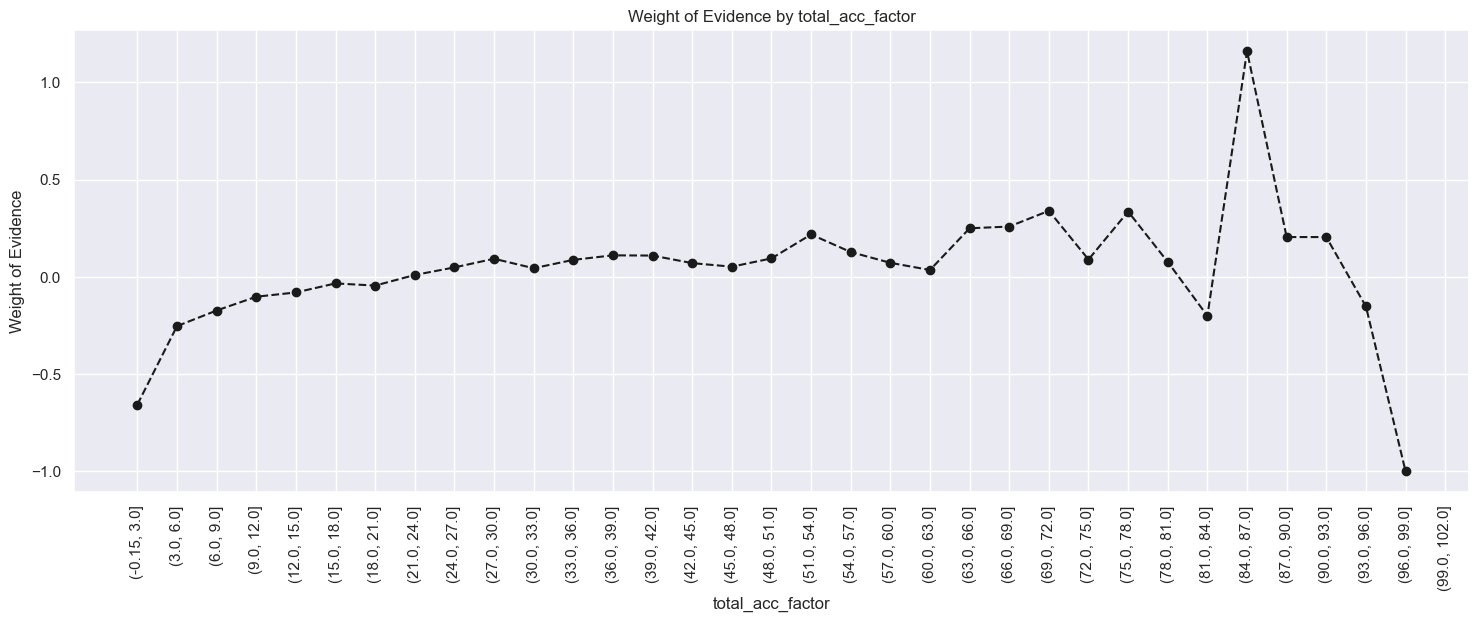

In [153]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [154]:
# Categories: '<=27', '28-51', '>51'
df_inputs_prepr['total_acc:<=27'] = np.where((df_inputs_prepr['total_acc'] <= 27), 1, 0)
df_inputs_prepr['total_acc:28-51'] = np.where((df_inputs_prepr['total_acc'] >= 28) & (df_inputs_prepr['total_acc'] <= 51), 1, 0)
df_inputs_prepr['total_acc:>=52'] = np.where((df_inputs_prepr['total_acc'] >= 52), 1, 0)

In [155]:
# acc_now_delinq
df_temp = woe_ordered_continuous(df_inputs_prepr, 'acc_now_delinq', df_targets_prepr)
# We calculate weight of evidence.
df_temp

acc_now_delinq   n_obs  prop_good  prop_n_obs    n_good    n_bad  \
0             0.0  348445   0.890677    0.996374  310352.0  38093.0   
1             1.0    1187   0.900590    0.003394    1069.0    118.0   
2             2.0      68   0.926471    0.000194      63.0      5.0   
3             3.0       7   0.857143    0.000020       6.0      1.0   
4             4.0       4   1.000000    0.000011       4.0      0.0   
5             5.0       2   0.500000    0.000006       1.0      1.0   

   prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0     0.996331    0.996729 -0.000400             NaN       NaN  inf  
1     0.003432    0.003088  0.105718        0.009913  0.106118  inf  
2     0.000202    0.000131  0.435620        0.025881  0.329903  inf  
3     0.000019    0.000026 -0.306317        0.069328  0.741937  inf  
4     0.000013    0.000000       inf        0.142857       inf  inf  
5     0.000003    0.000026 -2.098077        0.500000       inf  inf

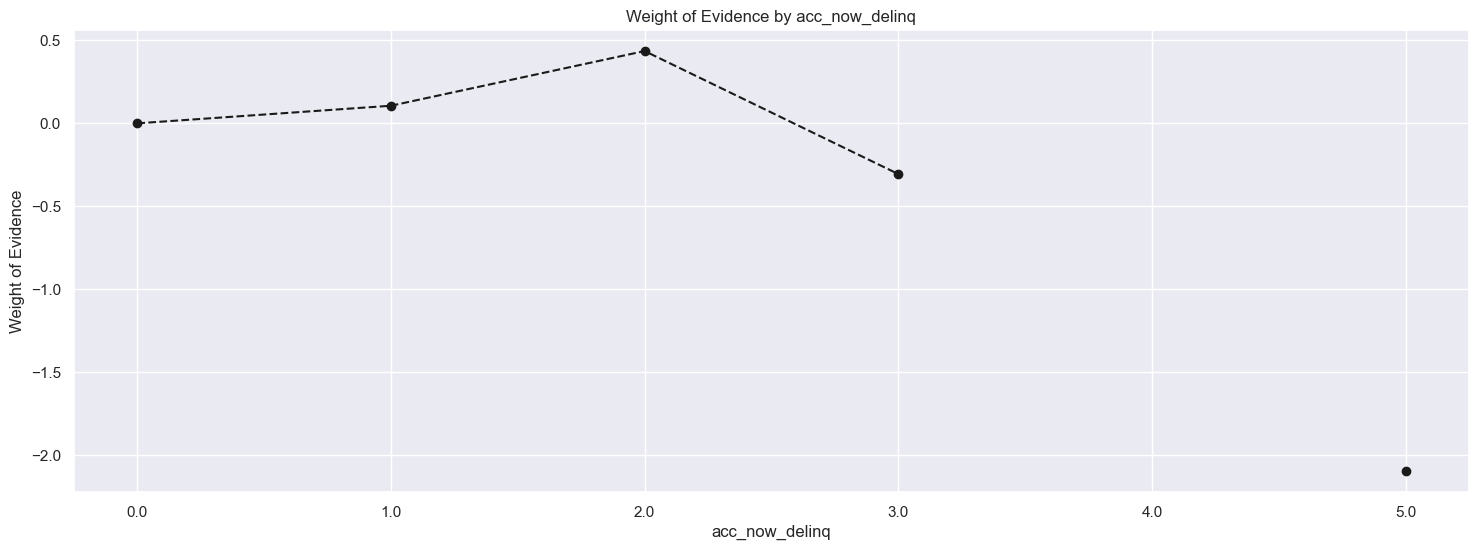

In [156]:
plot_by_woe(df_temp)
# We plot the weight of evidence values.

In [157]:
# Categories: '0', '>=1'
df_inputs_prepr['acc_now_delinq:0'] = np.where((df_inputs_prepr['acc_now_delinq'] == 0), 1, 0)
df_inputs_prepr['acc_now_delinq:>=1'] = np.where((df_inputs_prepr['acc_now_delinq'] >= 1), 1, 0)

In [158]:
# total_rev_hi_lim
df_inputs_prepr['total_rev_hi_lim_factor'] = pd.cut(df_inputs_prepr['total_rev_hi_lim'], 2000)
# Here we do fine-classing: using the 'cut' method, we split the variable into 2000 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'total_rev_hi_lim_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

total_rev_hi_lim_factor  n_obs  prop_good  prop_n_obs   n_good  \
0            (-9999.999, 5000.0]  18239   0.866056    0.052154  15796.0   
1             (5000.0, 9999.999]  49234   0.876427    0.140784  43150.0   
2          (9999.999, 14999.998]  55889   0.880316    0.159814  49200.0   
3         (14999.998, 19999.998]  48249   0.876909    0.137967  42310.0   
4         (19999.998, 24999.997]  38967   0.887161    0.111426  34570.0   
...                          ...    ...        ...         ...      ...   
1995  (9974999.002, 9979999.002]      0        NaN    0.000000      NaN   
1996  (9979999.002, 9984999.002]      0        NaN    0.000000      NaN   
1997  (9984999.002, 9989999.001]      0        NaN    0.000000      NaN   
1998    (9989999.001, 9994999.0]      0        NaN    0.000000      NaN   
1999      (9994999.0, 9999999.0]      1   1.000000    0.000003      1.0   

       n_bad  prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0     2443.0     0.050710    0.063923 -0.231547             NaN       NaN  inf  
1     6084.0     0.138525    0.159192 -0.139057        0.010371  0.092490  inf  
2     6689.0     0.157948    0.175022 -0.102647        0.003889  0.036409  inf  
3     5939.0     0.135829    0.155398 -0.134594        0.003407  0.031947  inf  
4     4397.0     0.110981    0.115050 -0.036013        0.010252  0.098581  inf  
...      ...          ...         ...       ...             ...       ...  ...  
1995     NaN          NaN         NaN       NaN             NaN       NaN  inf  
1996     NaN          NaN         NaN       NaN             NaN       NaN  inf  
1997     NaN          NaN         NaN       NaN             NaN       NaN  inf  
1998     NaN          NaN         NaN       NaN             NaN       NaN  inf  
1999     0.0     0.000003    0.000000       inf             NaN       NaN  inf  

[2000 rows x 12 columns]

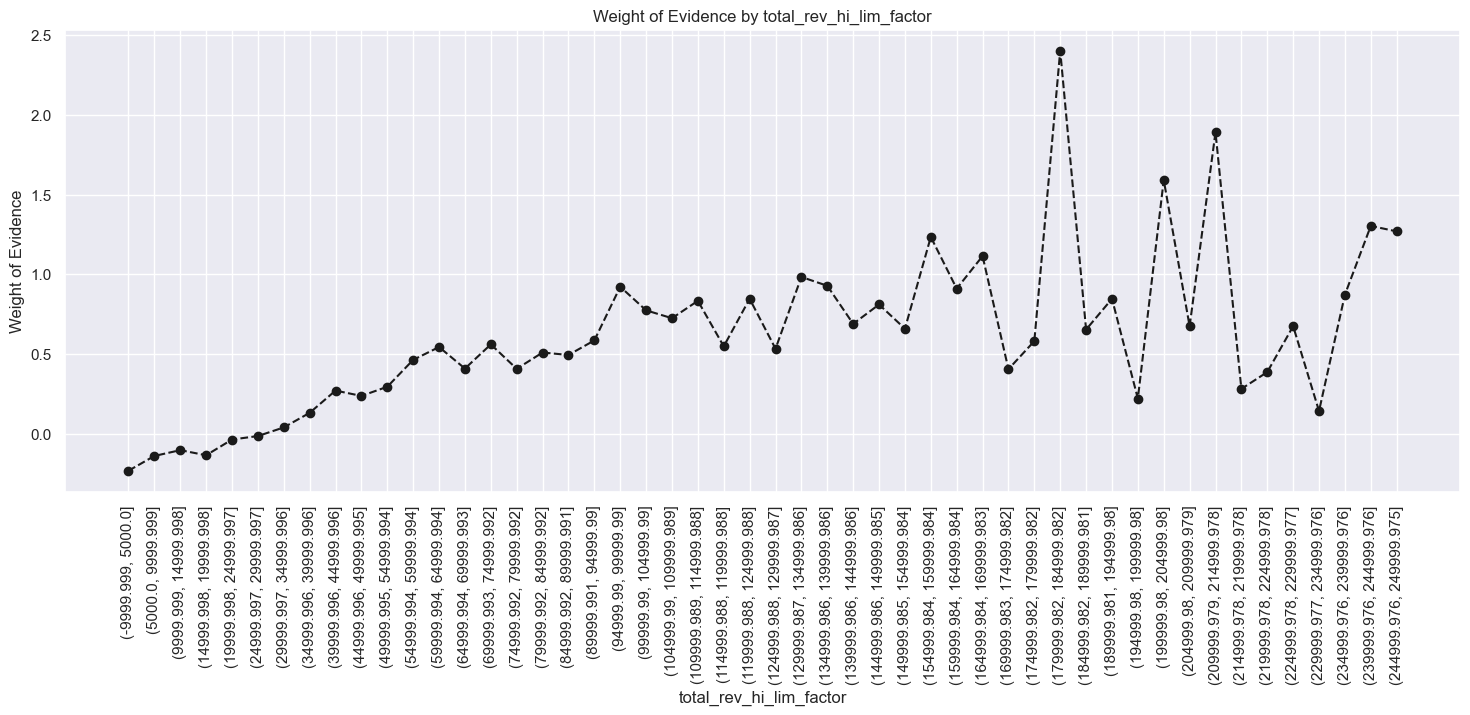

In [159]:
plot_by_woe(df_temp.iloc[: 50, : ], 90)
# We plot the weight of evidence values.

In [160]:
# Categories
# '<=5K', '5K-10K', '10K-20K', '20K-30K', '30K-40K', '40K-55K', '55K-95K', '>95K'
df_inputs_prepr['total_rev_hi_lim:<=5K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] <= 5000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:5K-10K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 5000) & (df_inputs_prepr['total_rev_hi_lim'] <= 10000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:10K-20K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 10000) & (df_inputs_prepr['total_rev_hi_lim'] <= 20000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:20K-30K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 20000) & (df_inputs_prepr['total_rev_hi_lim'] <= 30000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:30K-40K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 30000) & (df_inputs_prepr['total_rev_hi_lim'] <= 40000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:40K-55K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 40000) & (df_inputs_prepr['total_rev_hi_lim'] <= 55000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:55K-95K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 55000) & (df_inputs_prepr['total_rev_hi_lim'] <= 95000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:>95K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 95000), 1, 0)

In [161]:
# installment
df_inputs_prepr['installment_factor'] = pd.cut(df_inputs_prepr['installment'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'installment_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

installment_factor  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0       (14.276, 43.556]   1690   0.909467    0.004833   1537.0   153.0   
1       (43.556, 71.443]   4551   0.896287    0.013014   4079.0   472.0   
2       (71.443, 99.329]   6386   0.892734    0.018261   5701.0   685.0   
3      (99.329, 127.216]   8558   0.889928    0.024471   7616.0   942.0   
4     (127.216, 155.102]   9416   0.895497    0.026925   8432.0   984.0   
5     (155.102, 182.988]  15689   0.893811    0.044863  14023.0  1666.0   
6     (182.988, 210.875]  16176   0.904983    0.046255  14639.0  1537.0   
7     (210.875, 238.761]  14132   0.900722    0.040410  12729.0  1403.0   
8     (238.761, 266.648]  17614   0.901669    0.050367  15882.0  1732.0   
9     (266.648, 294.534]  18848   0.890917    0.053896  16792.0  2056.0   
10     (294.534, 322.42]  19111   0.896185    0.054648  17127.0  1984.0   
11     (322.42, 350.307]  23903   0.889344    0.068350  21258.0  2645.0   
12    (350.307, 378.193]  17895   0.884996    0.051171  15837.0  2058.0   
13     (378.193, 406.08]  16931   0.894690    0.048414  15148.0  1783.0   
14     (406.08, 433.966]  12512   0.878996    0.035778  10998.0  1514.0   
15    (433.966, 461.852]  11735   0.883767    0.033556  10371.0  1364.0   
16    (461.852, 489.739]  14744   0.894669    0.042160  13191.0  1553.0   
17    (489.739, 517.625]  14663   0.891359    0.041929  13070.0  1593.0   
18    (517.625, 545.512]  10054   0.862443    0.028749   8671.0  1383.0   
19    (545.512, 573.398]   9916   0.878278    0.028355   8709.0  1207.0   
20    (573.398, 601.284]   8871   0.879608    0.025367   7803.0  1068.0   
21    (601.284, 629.171]   8787   0.905884    0.025126   7960.0   827.0   
22    (629.171, 657.057]   7830   0.897573    0.022390   7028.0   802.0   
23    (657.057, 684.944]   8635   0.891257    0.024692   7696.0   939.0   
24     (684.944, 712.83]   5802   0.879180    0.016591   5101.0   701.0   
25     (712.83, 740.716]   4554   0.882082    0.013022   4017.0   537.0   
26    (740.716, 768.603]   4903   0.893942    0.014020   4383.0   520.0   
27    (768.603, 796.489]   4597   0.903850    0.013145   4155.0   442.0   
28    (796.489, 824.376]   3809   0.888685    0.010892   3385.0   424.0   
29    (824.376, 852.262]   3408   0.889085    0.009745   3030.0   378.0   
30    (852.262, 880.148]   4009   0.894487    0.011464   3586.0   423.0   
31    (880.148, 908.035]   3031   0.872979    0.008667   2646.0   385.0   
32    (908.035, 935.921]   2075   0.872771    0.005933   1811.0   264.0   
33    (935.921, 963.808]   2295   0.877560    0.006563   2014.0   281.0   
34    (963.808, 991.694]   1702   0.837250    0.004867   1425.0   277.0   
35    (991.694, 1019.58]   1502   0.856858    0.004295   1287.0   215.0   
36   (1019.58, 1047.467]   1196   0.867893    0.003420   1038.0   158.0   
37  (1047.467, 1075.353]    845   0.884024    0.002416    747.0    98.0   
38   (1075.353, 1103.24]    978   0.928425    0.002797    908.0    70.0   
39   (1103.24, 1131.126]    773   0.918499    0.002210    710.0    63.0   
40  (1131.126, 1159.012]    908   0.919604    0.002596    835.0    73.0   
41  (1159.012, 1186.899]   1114   0.916517    0.003185   1021.0    93.0   
42  (1186.899, 1214.785]   1170   0.901709    0.003346   1055.0   115.0   
43  (1214.785, 1242.672]    944   0.889831    0.002699    840.0   104.0   
44  (1242.672, 1270.558]    664   0.861446    0.001899    572.0    92.0   
45  (1270.558, 1298.444]    421   0.840855    0.001204    354.0    67.0   
46  (1298.444, 1326.331]    183   0.765027    0.000523    140.0    43.0   
47  (1326.331, 1354.217]    112   0.758929    0.000320     85.0    27.0   
48  (1354.217, 1382.104]     39   0.717949    0.000112     28.0    11.0   
49   (1382.104, 1409.99]     32   0.781250    0.000092     25.0     7.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0      0.004934    0.004003  0.209073             NaN       NaN  0.013522  
1      0.013095    0.012350 

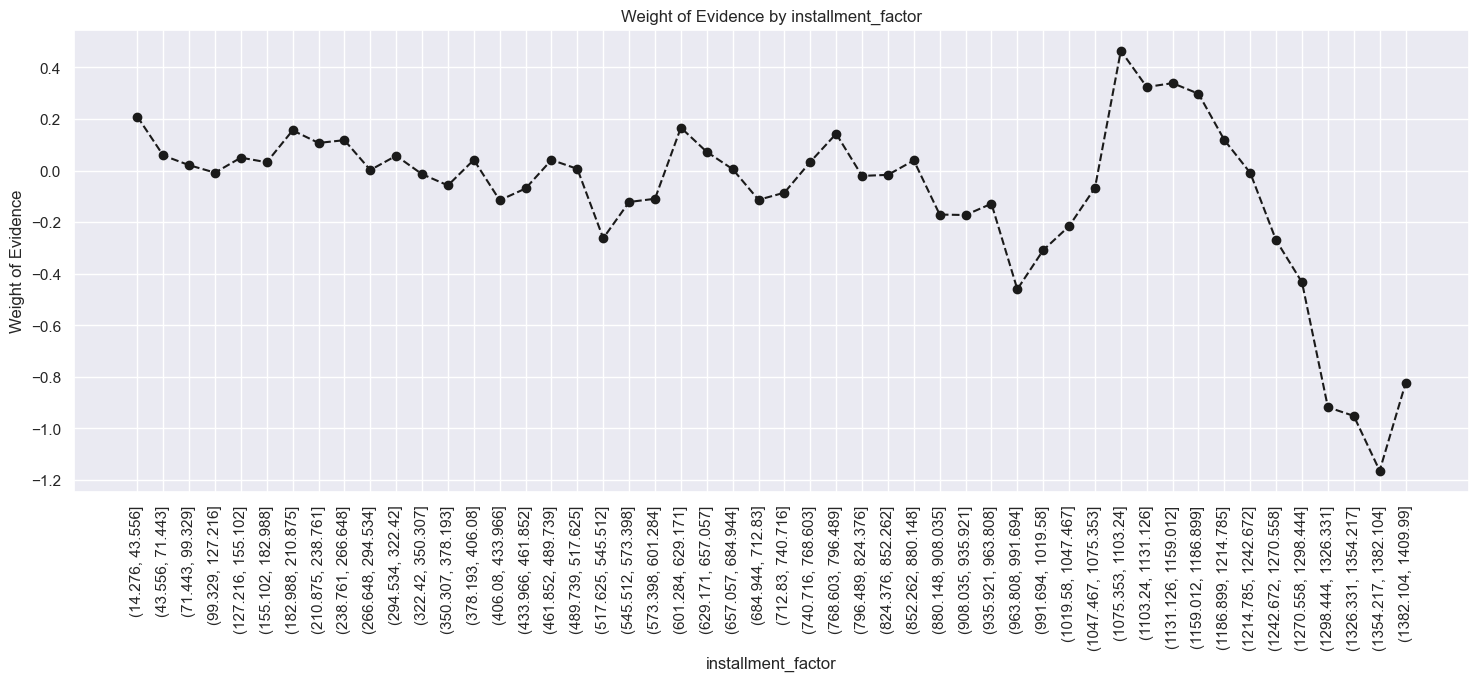

In [162]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

### Preprocessing Continuous Variables: Creating Dummy Variables, Part 3

In [163]:
# annual_inc
df_inputs_prepr['annual_inc_factor'] = pd.cut(df_inputs_prepr['annual_inc'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'annual_inc_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

annual_inc_factor   n_obs  prop_good  prop_n_obs    n_good  \
0     (-5243.882, 144693.64]  329796   0.888622    0.943048  293064.0   
1     (144693.64, 287491.28]   17928   0.924978    0.051265   16583.0   
2     (287491.28, 430288.92]    1430   0.928671    0.004089    1328.0   
3     (430288.92, 573086.56]     312   0.935897    0.000892     292.0   
4      (573086.56, 715884.2]     106   0.886792    0.000303      94.0   
5      (715884.2, 858681.84]      59   0.881356    0.000169      52.0   
6    (858681.84, 1001479.48]      37   1.000000    0.000106      37.0   
7   (1001479.48, 1144277.12]      10   1.000000    0.000029      10.0   
8   (1144277.12, 1287074.76]      12   1.000000    0.000034      12.0   
9    (1287074.76, 1429872.4]       5   1.000000    0.000014       5.0   
10   (1429872.4, 1572670.04]       2   1.000000    0.000006       2.0   
11  (1572670.04, 1715467.68]       1   1.000000    0.000003       1.0   
12  (1715467.68, 1858265.32]       1   1.000000    0.000003       1.0   
13  (1858265.32, 2001062.96]       6   1.000000    0.000017       6.0   
14   (2001062.96, 2143860.6]       1   1.000000    0.000003       1.0   
15   (2143860.6, 2286658.24]       0        NaN    0.000000       NaN   
16  (2286658.24, 2429455.88]       0        NaN    0.000000       NaN   
17  (2429455.88, 2572253.52]       0        NaN    0.000000       NaN   
18  (2572253.52, 2715051.16]       0        NaN    0.000000       NaN   
19   (2715051.16, 2857848.8]       0        NaN    0.000000       NaN   
20   (2857848.8, 3000646.44]       0        NaN    0.000000       NaN   
21  (3000646.44, 3143444.08]       0        NaN    0.000000       NaN   
22  (3143444.08, 3286241.72]       0        NaN    0.000000       NaN   
23  (3286241.72, 3429039.36]       0        NaN    0.000000       NaN   
24   (3429039.36, 3571837.0]       0        NaN    0.000000       NaN   
25   (3571837.0, 3714634.64]       0        NaN    0.000000       NaN   
26  (3714634.64, 3857432.28]       0        NaN    0.000000       NaN   
27  (3857432.28, 4000229.92]       1   1.000000    0.000003       1.0   
28  (4000229.92, 4143027.56]       0        NaN    0.000000       NaN   
29   (4143027.56, 4285825.2]       0        NaN    0.000000       NaN   
30   (4285825.2, 4428622.84]       0        NaN    0.000000       NaN   
31  (4428622.84, 4571420.48]       1   1.000000    0.000003       1.0   
32  (4571420.48, 4714218.12]       0        NaN    0.000000       NaN   
33  (4714218.12, 4857015.76]       0        NaN    0.000000       NaN   
34   (4857015.76, 4999813.4]       1   1.000000    0.000003       1.0   
35   (4999813.4, 5142611.04]       1   1.000000    0.000003       1.0   
36  (5142611.04, 5285408.68]       0        NaN    0.000000       NaN   
37  (5285408.68, 5428206.32]       0        NaN    0.000000       NaN   
38  (5428206.32, 5571003.96]       0        NaN    0.000000       NaN   
39   (5571003.96, 5713801.6]       0        NaN    0.000000       NaN   
40   (5713801.6, 5856599.24]       0        NaN    0.000000       NaN   
41  (5856599.24, 5999396.88]       0        NaN    0.000000       NaN   
42  (5999396.88, 6142194.52]       2   1.000000    0.000006       2.0   
43  (6142194.52, 6284992.16]       0        NaN    0.000000       NaN   
44   (6284992.16, 6427789.8]       0        NaN    0.000000       NaN   
45   (6427789.8, 6570587.44]       0        NaN    0.000000       NaN   
46  (6570587.44, 6713385.08]       0        NaN    0.000000       NaN   
47  (6713385.08, 6856182.72]       0        NaN    0.000000       NaN   
48  (6856182.72, 6998980.36]       0        NaN    0.000000       NaN   
49   (6998980.36, 7141778.0]       1   1.000000    0.000003       1.0   

      n_bad  prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0   36732.0     0.940831    0.961118 -0.021334             NaN       NaN  inf  
1    1345.0     0.053237    0.035193  0.413907        0.036356  0.435241  inf  
2     102.0     0.004263    0.002669  0.468380 

In [164]:
df_inputs_prepr['annual_inc_factor'] = pd.cut(df_inputs_prepr['annual_inc'], 100)
# Here we do fine-classing: using the 'cut' method, we split the variable into 100 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'annual_inc_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

annual_inc_factor   n_obs  prop_good  prop_n_obs    n_good  \
0      (-5243.882, 73294.82]  216950   0.875958    0.620366  190039.0   
1      (73294.82, 144693.64]  112846   0.912970    0.322682  103025.0   
2     (144693.64, 216092.46]   14959   0.924728    0.042775   13833.0   
3     (216092.46, 287491.28]    2969   0.926238    0.008490    2750.0   
4      (287491.28, 358890.1]    1046   0.926386    0.002991     969.0   
5      (358890.1, 430288.92]     384   0.934896    0.001098     359.0   
6     (430288.92, 501687.74]     229   0.943231    0.000655     216.0   
7     (501687.74, 573086.56]      83   0.915663    0.000237      76.0   
8     (573086.56, 644485.38]      59   0.864407    0.000169      51.0   
9      (644485.38, 715884.2]      47   0.914894    0.000134      43.0   
10     (715884.2, 787283.02]      33   0.939394    0.000094      31.0   
11    (787283.02, 858681.84]      26   0.807692    0.000074      21.0   
12    (858681.84, 930080.66]      17   1.000000    0.000049      17.0   
13   (930080.66, 1001479.48]      20   1.000000    0.000057      20.0   
14   (1001479.48, 1072878.3]       3   1.000000    0.000009       3.0   
15   (1072878.3, 1144277.12]       7   1.000000    0.000020       7.0   
16  (1144277.12, 1215675.94]       8   1.000000    0.000023       8.0   
17  (1215675.94, 1287074.76]       4   1.000000    0.000011       4.0   
18  (1287074.76, 1358473.58]       4   1.000000    0.000011       4.0   
19   (1358473.58, 1429872.4]       1   1.000000    0.000003       1.0   
20   (1429872.4, 1501271.22]       2   1.000000    0.000006       2.0   
21  (1501271.22, 1572670.04]       0        NaN    0.000000       NaN   
22  (1572670.04, 1644068.86]       1   1.000000    0.000003       1.0   
23  (1644068.86, 1715467.68]       0        NaN    0.000000       NaN   
24   (1715467.68, 1786866.5]       1   1.000000    0.000003       1.0   
25   (1786866.5, 1858265.32]       0        NaN    0.000000       NaN   
26  (1858265.32, 1929664.14]       1   1.000000    0.000003       1.0   
27  (1929664.14, 2001062.96]       5   1.000000    0.000014       5.0   
28  (2001062.96, 2072461.78]       1   1.000000    0.000003       1.0   
29   (2072461.78, 2143860.6]       0        NaN    0.000000       NaN   
30   (2143860.6, 2215259.42]       0        NaN    0.000000       NaN   
31  (2215259.42, 2286658.24]       0        NaN    0.000000       NaN   
32  (2286658.24, 2358057.06]       0        NaN    0.000000       NaN   
33  (2358057.06, 2429455.88]       0        NaN    0.000000       NaN   
34   (2429455.88, 2500854.7]       0        NaN    0.000000       NaN   
35   (2500854.7, 2572253.52]       0        NaN    0.000000       NaN   
36  (2572253.52, 2643652.34]       0        NaN    0.000000       NaN   
37  (2643652.34, 2715051.16]       0        NaN    0.000000       NaN   
38  (2715051.16, 2786449.98]       0        NaN    0.000000       NaN   
39   (2786449.98, 2857848.8]       0        NaN    0.000000       NaN   
40   (2857848.8, 2929247.62]       0        NaN    0.000000       NaN   
41  (2929247.62, 3000646.44]       0        NaN    0.000000       NaN   
42  (3000646.44, 3072045.26]       0        NaN    0.000000       NaN   
43  (3072045.26, 3143444.08]       0        NaN    0.000000       NaN   
44   (3143444.08, 3214842.9]       0        NaN    0.000000       NaN   
45   (3214842.9, 3286241.72]       0        NaN    0.000000       NaN   
46  (3286241.72, 3357640.54]       0        NaN    0.000000       NaN   
47  (3357640.54, 3429039.36]       0        NaN    0.000000       NaN   
48  (3429039.36, 3500438.18]       0        NaN    0.000000       NaN   
49   (3500438.18, 3571837.0]       0        NaN    0.000000       NaN   
50   (3571837.0, 3643235.82]       0        NaN    0.000000       NaN   
51  (3643235.82, 3714634.64]       0        NaN    0.000000       NaN   
52  (3714634.64, 3786033.46]       0        NaN    0.000000       NaN   
53  (3786033.46, 3857432.28]       0        NaN    0.000000       NaN

In [165]:
# Initial examination shows that there are too few individuals with large income and too many with small income.
# Hence, we are going to have one category for more than 150K, and we are going to apply our approach to determine
# the categories of everyone with 140k or less.
df_inputs_prepr_temp = df_inputs_prepr.loc[df_inputs_prepr['annual_inc'] <= 140000, : ]
#loan_data_temp = loan_data_temp.reset_index(drop = True)
#df_inputs_prepr_temp

In [166]:
df_inputs_prepr_temp["annual_inc_factor"] = pd.cut(df_inputs_prepr_temp['annual_inc'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'annual_inc_factor', df_targets_prepr[df_inputs_prepr_temp.index])
# We calculate weight of evidence.
df_temp

annual_inc_factor  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0      (1757.896, 4658.08]     15   0.800000    0.000046     12.0     3.0   
1       (4658.08, 7420.16]     36   0.777778    0.000109     28.0     8.0   
2      (7420.16, 10182.24]    271   0.874539    0.000824    237.0    34.0   
3     (10182.24, 12944.32]    506   0.828063    0.001538    419.0    87.0   
4      (12944.32, 15706.4]   1138   0.829525    0.003459    944.0   194.0   
5      (15706.4, 18468.48]   1431   0.844864    0.004350   1209.0   222.0   
6     (18468.48, 21230.56]   2751   0.854235    0.008362   2350.0   401.0   
7     (21230.56, 23992.64]   2330   0.842060    0.007082   1962.0   368.0   
8     (23992.64, 26754.72]   6595   0.848976    0.020046   5599.0   996.0   
9      (26754.72, 29516.8]   5283   0.855196    0.016058   4518.0   765.0   
10     (29516.8, 32278.88]  11163   0.858819    0.033930   9587.0  1576.0   
11    (32278.88, 35040.96]  11401   0.860451    0.034654   9810.0  1591.0   
12    (35040.96, 37803.04]   7432   0.857508    0.022590   6373.0  1059.0   
13    (37803.04, 40565.12]  16765   0.866388    0.050958  14525.0  2240.0   
14     (40565.12, 43327.2]  11721   0.870404    0.035626  10202.0  1519.0   
15     (43327.2, 46089.28]  15561   0.872759    0.047298  13581.0  1980.0   
16    (46089.28, 48851.36]   9260   0.878402    0.028146   8134.0  1126.0   
17    (48851.36, 51613.44]  17905   0.880424    0.054423  15764.0  2141.0   
18    (51613.44, 54375.52]  11962   0.886975    0.036359  10610.0  1352.0   
19     (54375.52, 57137.6]  15143   0.886944    0.046028  13431.0  1712.0   
20     (57137.6, 59899.68]   6077   0.884153    0.018471   5373.0   704.0   
21    (59899.68, 62661.76]  19938   0.881683    0.060602  17579.0  2359.0   
22    (62661.76, 65423.84]  15097   0.889978    0.045888  13436.0  1661.0   
23    (65423.84, 68185.92]   7434   0.898978    0.022596   6683.0   751.0   
24     (68185.92, 70948.0]  12162   0.894343    0.036967  10877.0  1285.0   
25     (70948.0, 73710.08]   7880   0.897081    0.023952   7069.0   811.0   
26    (73710.08, 76472.16]  12317   0.902980    0.037438  11122.0  1195.0   
27    (76472.16, 79234.24]   5314   0.901204    0.016152   4789.0   525.0   
28    (79234.24, 81996.32]  10666   0.901744    0.032420   9618.0  1048.0   
29     (81996.32, 84758.4]   5723   0.914031    0.017395   5231.0   492.0   
30     (84758.4, 87520.48]   9327   0.908760    0.028350   8476.0   851.0   
31    (87520.48, 90282.56]   9717   0.909643    0.029535   8839.0   878.0   
32    (90282.56, 93044.64]   4084   0.914055    0.012413   3733.0   351.0   
33    (93044.64, 95806.72]   5260   0.913878    0.015988   4807.0   453.0   
34     (95806.72, 98568.8]   4371   0.911233    0.013286   3983.0   388.0   
35    (98568.8, 101330.88]   8245   0.914736    0.025061   7542.0   703.0   
36  (101330.88, 104092.96]   3048   0.919619    0.009264   2803.0   245.0   
37  (104092.96, 106855.04]   3507   0.922726    0.010660   3236.0   271.0   
38  (106855.04, 109617.12]   2117   0.921587    0.006435   1951.0   166.0   
39   (109617.12, 112379.2]   5357   0.914318    0.016283   4898.0   459.0   
40   (112379.2, 115141.28]   3014   0.939615    0.009161   2832.0   182.0   
41  (115141.28, 117903.36]   1059   0.919736    0.003219    974.0    85.0   
42  (117903.36, 120665.44]   5805   0.914556    0.017644   5309.0   496.0   
43  (120665.44, 123427.52]    966   0.940994    0.002936    909.0    57.0   
44   (123427.52, 126189.6]   3365   0.920951    0.010228   3099.0   266.0   
45   (126189.6, 128951.68]    752   0.917553    0.002286    690.0    62.0   
46  (128951.68, 131713.76]   2853   0.930950    0.008672   2656.0   197.0   
47  (131713.76, 134475.84]    740   0.925676    0.002249    685.0    55.0   
48  (134475.84, 137237.92]   1776   0.940315    0.005398   1670.0   106.0   
49   (137237.92, 140000.0]   2358   0.921544    0.007167   2173.0   185.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0    

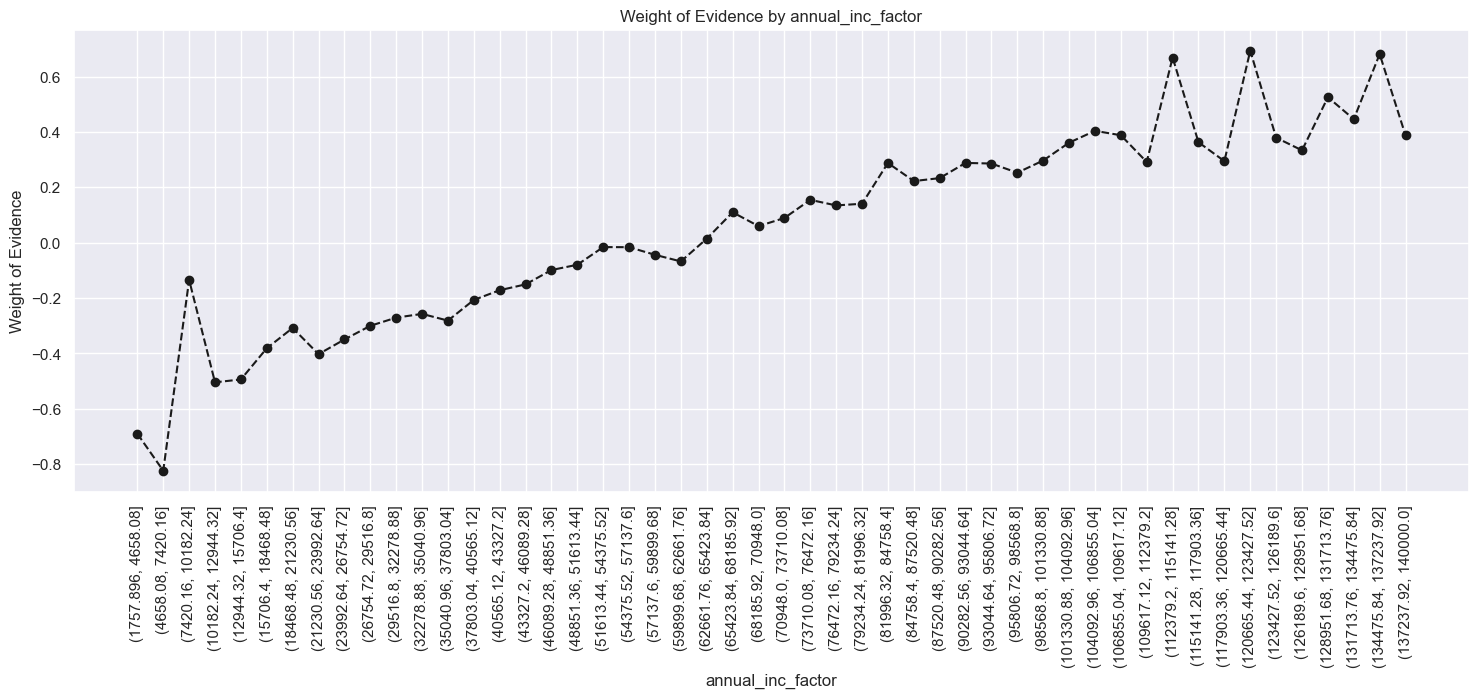

In [167]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [168]:
# WoE is monotonically decreasing with income, so we split income in 10 equal categories, each with width of 15k.
df_inputs_prepr['annual_inc:<20K'] = np.where((df_inputs_prepr['annual_inc'] <= 20000), 1, 0)
df_inputs_prepr['annual_inc:20K-30K'] = np.where((df_inputs_prepr['annual_inc'] > 20000) & (df_inputs_prepr['annual_inc'] <= 30000), 1, 0)
df_inputs_prepr['annual_inc:30K-40K'] = np.where((df_inputs_prepr['annual_inc'] > 30000) & (df_inputs_prepr['annual_inc'] <= 40000), 1, 0)
df_inputs_prepr['annual_inc:40K-50K'] = np.where((df_inputs_prepr['annual_inc'] > 40000) & (df_inputs_prepr['annual_inc'] <= 50000), 1, 0)
df_inputs_prepr['annual_inc:50K-60K'] = np.where((df_inputs_prepr['annual_inc'] > 50000) & (df_inputs_prepr['annual_inc'] <= 60000), 1, 0)
df_inputs_prepr['annual_inc:60K-70K'] = np.where((df_inputs_prepr['annual_inc'] > 60000) & (df_inputs_prepr['annual_inc'] <= 70000), 1, 0)
df_inputs_prepr['annual_inc:70K-80K'] = np.where((df_inputs_prepr['annual_inc'] > 70000) & (df_inputs_prepr['annual_inc'] <= 80000), 1, 0)
df_inputs_prepr['annual_inc:80K-90K'] = np.where((df_inputs_prepr['annual_inc'] > 80000) & (df_inputs_prepr['annual_inc'] <= 90000), 1, 0)
df_inputs_prepr['annual_inc:90K-100K'] = np.where((df_inputs_prepr['annual_inc'] > 90000) & (df_inputs_prepr['annual_inc'] <= 100000), 1, 0)
df_inputs_prepr['annual_inc:100K-120K'] = np.where((df_inputs_prepr['annual_inc'] > 100000) & (df_inputs_prepr['annual_inc'] <= 120000), 1, 0)
df_inputs_prepr['annual_inc:120K-140K'] = np.where((df_inputs_prepr['annual_inc'] > 120000) & (df_inputs_prepr['annual_inc'] <= 140000), 1, 0)
df_inputs_prepr['annual_inc:>140K'] = np.where((df_inputs_prepr['annual_inc'] > 140000), 1, 0)

In [169]:
# mths_since_last_delinq
# We have to create one category for missing values and do fine and coarse classing for the rest.
df_inputs_prepr_temp = df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_delinq'])]
df_inputs_prepr_temp['mths_since_last_delinq_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_delinq'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'mths_since_last_delinq_factor', df_targets_prepr[df_inputs_prepr_temp.index])
# We calculate weight of evidence.
df_temp

mths_since_last_delinq_factor  n_obs  prop_good  prop_n_obs   n_good  \
0                 (-0.188, 3.76]   4961   0.872203    0.030591   4327.0   
1                   (3.76, 7.52]  10491   0.887046    0.064690   9306.0   
2                  (7.52, 11.28]  12486   0.892119    0.076992  11139.0   
3                 (11.28, 15.04]  12430   0.889059    0.076647  11051.0   
4                  (15.04, 18.8]   8739   0.894382    0.053887   7816.0   
5                  (18.8, 22.56]  10909   0.892474    0.067268   9736.0   
6                 (22.56, 26.32]  10201   0.896677    0.062902   9147.0   
7                 (26.32, 30.08]   9899   0.894838    0.061040   8858.0   
8                 (30.08, 33.84]   7122   0.901853    0.043916   6423.0   
9                  (33.84, 37.6]   9173   0.896435    0.056563   8223.0   
10                 (37.6, 41.36]   8761   0.892706    0.054023   7821.0   
11                (41.36, 45.12]   8634   0.897151    0.053239   7746.0   
12                (45.12, 48.88]   6115   0.896484    0.037707   5482.0   
13                (48.88, 52.64]   6089   0.888980    0.037546   5413.0   
14                 (52.64, 56.4]   5683   0.892838    0.035043   5074.0   
15                 (56.4, 60.16]   5516   0.901559    0.034013   4973.0   
16                (60.16, 63.92]   3755   0.886551    0.023154   3329.0   
17                (63.92, 67.68]   4993   0.893251    0.030788   4460.0   
18                (67.68, 71.44]   4848   0.889026    0.029894   4310.0   
19                 (71.44, 75.2]   4655   0.887003    0.028704   4129.0   
20                 (75.2, 78.96]   3082   0.890655    0.019004   2745.0   
21                (78.96, 82.72]   3391   0.888234    0.020910   3012.0   
22                (82.72, 86.48]     88   0.784091    0.000543     69.0   
23                (86.48, 90.24]     36   0.888889    0.000222     32.0   
24                 (90.24, 94.0]     30   0.933333    0.000185     28.0   
25                 (94.0, 97.76]     18   0.777778    0.000111     14.0   
26               (97.76, 101.52]     12   0.916667    0.000074     11.0   
27              (101.52, 105.28]     10   0.900000    0.000062      9.0   
28              (105.28, 109.04]      8   0.750000    0.000049      6.0   
29               (109.04, 112.8]      2   0.500000    0.000012      1.0   
30               (112.8, 116.56]      7   0.857143    0.000043      6.0   
31              (116.56, 120.32]      1   1.000000    0.000006      1.0   
32              (120.32, 124.08]      1   1.000000    0.000006      1.0   
33              (124.08, 127.84]      2   1.000000    0.000012      2.0   
34               (127.84, 131.6]      5   1.000000    0.000031      5.0   
35               (131.6, 135.36]      6   0.666667    0.000037      4.0   
36              (135.36, 139.12]      2   1.000000    0.000012      2.0   
37              (139.12, 142.88]      3   1.000000    0.000018      3.0   
38              (142.88, 146.64]      1   1.000000    0.000006      1.0   
39               (146.64, 150.4]      3   0.666667    0.000018      2.0   
40               (150.4, 154.16]      1   0.000000    0.000006      0.0   
41              (154.16, 157.92]      1   1.000000    0.000006      1.0   
42              (157.92, 161.68]      1   1.000000    0.000006      1.0   
43              (161.68, 165.44]      0        NaN    0.000000      NaN   
44               (165.44, 169.2]      0        NaN    0.000000      NaN   
45               (169.2, 172.96]      0        NaN    0.000000      NaN   
46              (172.96, 176.72]      0        NaN    0.000000      NaN   
47              (176.72, 180.48]      1   1.000000    0.000006      1.0   
48              (180.48, 184.24]      0        NaN    0.000000      NaN   
49               (184.24, 188.0]      1   1.000000    0.000006      1.0   

     n_bad  prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0    634.0     0.029899    0.036328 -0.194773             NaN       NaN  inf  
1   1185.0     0.06

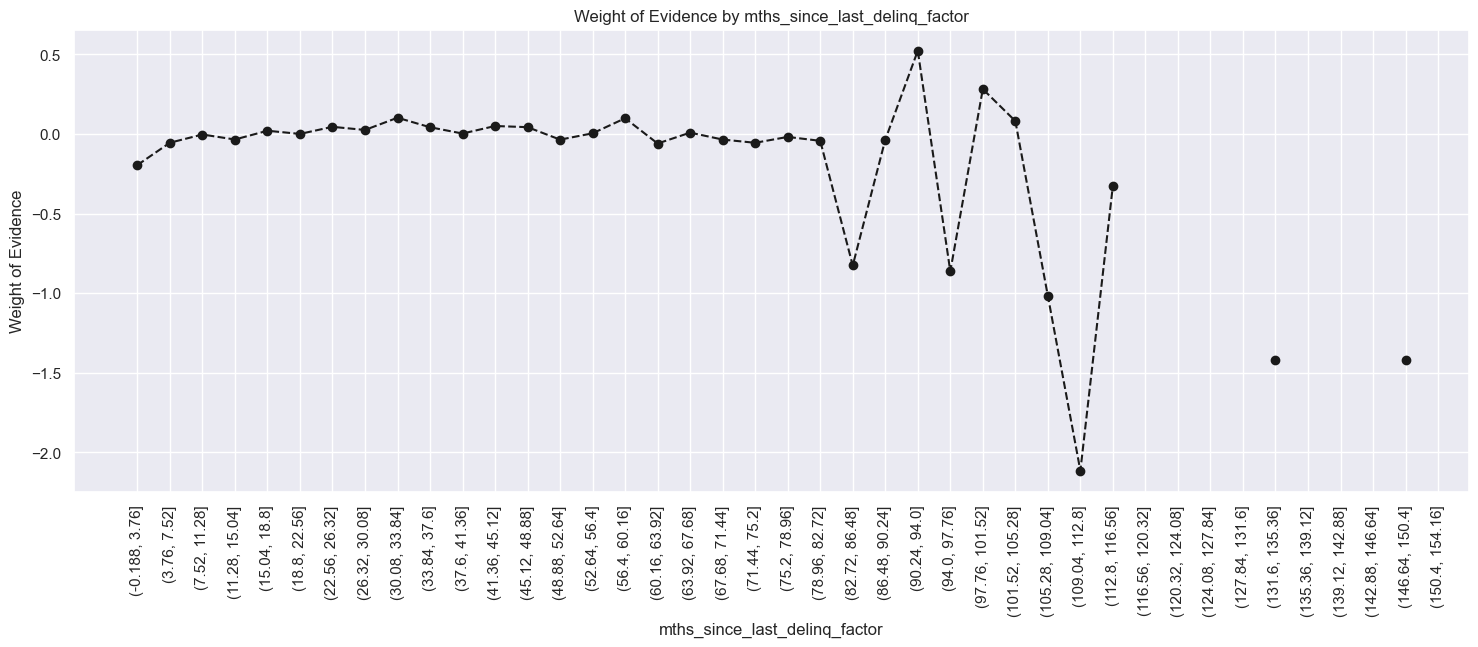

In [170]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [171]:
# Categories: Missing, 0-3, 4-30, 31-56, >=57
df_inputs_prepr['mths_since_last_delinq:Missing'] = np.where((df_inputs_prepr['mths_since_last_delinq'].isnull()), 1, 0)
df_inputs_prepr['mths_since_last_delinq:0-3'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 0) & (df_inputs_prepr['mths_since_last_delinq'] <= 3), 1, 0)
df_inputs_prepr['mths_since_last_delinq:4-30'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 4) & (df_inputs_prepr['mths_since_last_delinq'] <= 30), 1, 0)
df_inputs_prepr['mths_since_last_delinq:31-56'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 31) & (df_inputs_prepr['mths_since_last_delinq'] <= 56), 1, 0)
df_inputs_prepr['mths_since_last_delinq:>=57'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 57), 1, 0)

### Preprocessing Continuous Variables: Creating Dummy Variables, Part 3

In [172]:
# dti
df_inputs_prepr['dti_factor'] = pd.cut(df_inputs_prepr['dti'], 100)
# Here we do fine-classing: using the 'cut' method, we split the variable into 100 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'dti_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

dti_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0       (-0.04, 0.4]    701   0.877318    0.002005   615.0   86.0   
1         (0.4, 0.8]    761   0.917214    0.002176   698.0   63.0   
2         (0.8, 1.2]    847   0.893743    0.002422   757.0   90.0   
3         (1.2, 1.6]    967   0.897622    0.002765   868.0   99.0   
4         (1.6, 2.0]   1106   0.903255    0.003163   999.0  107.0   
5       (2.0, 2.399]   1263   0.918448    0.003612  1160.0  103.0   
6     (2.399, 2.799]   1461   0.915127    0.004178  1337.0  124.0   
7     (2.799, 3.199]   1613   0.904526    0.004612  1459.0  154.0   
8     (3.199, 3.599]   1805   0.899169    0.005161  1623.0  182.0   
9     (3.599, 3.999]   2062   0.911736    0.005896  1880.0  182.0   
10    (3.999, 4.399]   2314   0.915730    0.006617  2119.0  195.0   
11    (4.399, 4.799]   2410   0.916598    0.006891  2209.0  201.0   
12    (4.799, 5.199]   2741   0.910981    0.007838  2497.0  244.0   
13    (5.199, 5.599]   2885   0.909879    0.008250  2625.0  260.0   
14    (5.599, 5.999]   3044   0.919185    0.008704  2798.0  246.0   
15    (5.999, 6.398]   3307   0.911400    0.009456  3014.0  293.0   
16    (6.398, 6.798]   3549   0.911524    0.010148  3235.0  314.0   
17    (6.798, 7.198]   3667   0.914371    0.010486  3353.0  314.0   
18    (7.198, 7.598]   3994   0.914872    0.011421  3654.0  340.0   
19    (7.598, 7.998]   4204   0.916270    0.012021  3852.0  352.0   
20    (7.998, 8.398]   4395   0.912173    0.012567  4009.0  386.0   
21    (8.398, 8.798]   4562   0.908812    0.013045  4146.0  416.0   
22    (8.798, 9.198]   4811   0.909790    0.013757  4377.0  434.0   
23    (9.198, 9.598]   4867   0.906719    0.013917  4413.0  454.0   
24    (9.598, 9.998]   5119   0.909748    0.014638  4657.0  462.0   
25   (9.998, 10.397]   5245   0.905624    0.014998  4750.0  495.0   
26  (10.397, 10.797]   5444   0.907972    0.015567  4943.0  501.0   
27  (10.797, 11.197]   5694   0.896733    0.016282  5106.0  588.0   
28  (11.197, 11.597]   5780   0.910381    0.016528  5262.0  518.0   
29  (11.597, 11.997]   5923   0.903934    0.016937  5354.0  569.0   
30  (11.997, 12.397]   6070   0.908402    0.017357  5514.0  556.0   
31  (12.397, 12.797]   6336   0.897254    0.018118  5685.0  651.0   
32  (12.797, 13.197]   6242   0.905639    0.017849  5653.0  589.0   
33  (13.197, 13.597]   6372   0.900816    0.018221  5740.0  632.0   
34  (13.597, 13.997]   6422   0.896294    0.018364  5756.0  666.0   
35  (13.997, 14.396]   6445   0.900388    0.018429  5803.0  642.0   
36  (14.396, 14.796]   6611   0.908637    0.018904  6007.0  604.0   
37  (14.796, 15.196]   6568   0.897229    0.018781  5893.0  675.0   
38  (15.196, 15.596]   6403   0.901609    0.018309  5773.0  630.0   
39  (15.596, 15.996]   6608   0.894976    0.018895  5914.0  694.0   
40  (15.996, 16.396]   6409   0.893275    0.018326  5725.0  684.0   
41  (16.396, 16.796]   6459   0.893327    0.018469  5770.0  689.0   
42  (16.796, 17.196]   6521   0.886060    0.018647  5778.0  743.0   
43  (17.196, 17.596]   6340   0.887697    0.018129  5628.0  712.0   
44  (17.596, 17.996]   6367   0.887231    0.018206  5649.0  718.0   
45  (17.996, 18.395]   6397   0.884477    0.018292  5658.0  739.0   
46  (18.395, 18.795]   6321   0.889258    0.018075  5621.0  700.0   
47  (18.795, 19.195]   6044   0.880874    0.017283  5324.0  720.0   
48  (19.195, 19.595]   6186   0.882962    0.017689  5462.0  724.0   
49  (19.595, 19.995]   6227   0.884856    0.017806  5510.0  717.0   
50  (19.995, 20.395]   5873   0.881321    0.016794  5176.0  697.0   
51  (20.395, 20.795]   5817   0.880866    0.016634  5124.0  693.0   
52  (20.795, 21.195]   5620   0.873843    0.016070  4911.0  709.0   
53  (21.195, 21.595]   5541   0.884497    0.015844  4901.0  640.0   
54  (21.595, 21.995]   5426   0.876520    0.015516  4756.0  670.0   
55  (21.995, 22.394]   5159   0.873425    0.014752  4506.0  653.0   
56  (22.394, 22.794]   5154   0.877183    0.014738  4521.0  633.0   
57  (22.

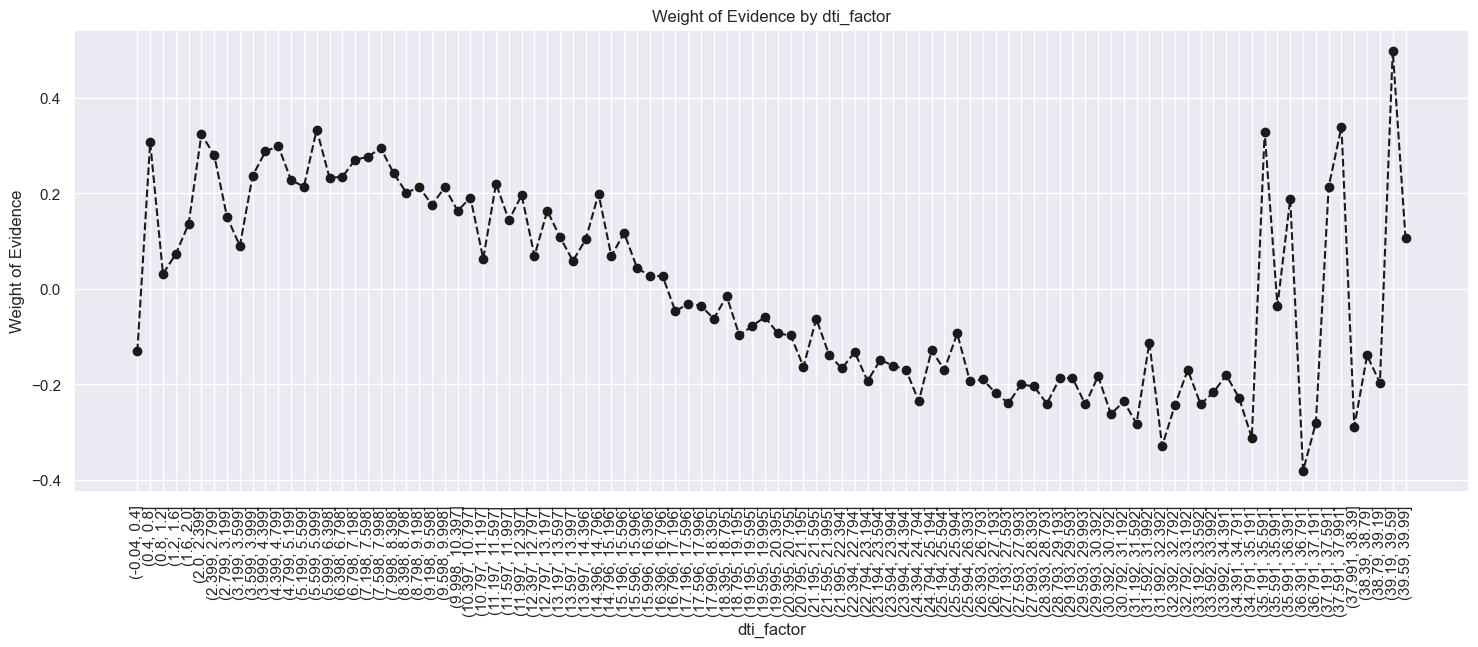

In [173]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [174]:
# Similarly to income, initial examination shows that most values are lower than 200.
# Hence, we are going to have one category for more than 35, and we are going to apply our approach to determine
# the categories of everyone with 150k or less.
df_inputs_prepr_temp = df_inputs_prepr.loc[df_inputs_prepr['dti'] <= 35, : ]

In [175]:
df_inputs_prepr_temp['dti_factor'] = pd.cut(df_inputs_prepr_temp['dti'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'dti_factor', df_targets_prepr[df_inputs_prepr_temp.index])
# We calculate weight of evidence.
df_temp

dti_factor  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0   (-0.035, 0.7]   1284   0.893302    0.003700   1147.0   137.0     0.003711   
1      (0.7, 1.4]   1533   0.893020    0.004418   1369.0   164.0     0.004429   
2      (1.4, 2.1]   1877   0.912627    0.005409   1713.0   164.0     0.005542   
3      (2.1, 2.8]   2454   0.913203    0.007072   2241.0   213.0     0.007250   
4      (2.8, 3.5]   2962   0.902768    0.008536   2674.0   288.0     0.008651   
5      (3.5, 4.2]   3602   0.914214    0.010380   3293.0   309.0     0.010654   
6      (4.2, 4.9]   4315   0.912399    0.012435   3937.0   378.0     0.012737   
7      (4.9, 5.6]   4988   0.911387    0.014374   4546.0   442.0     0.014708   
8      (5.6, 6.3]   5541   0.915178    0.015968   5071.0   470.0     0.016406   
9      (6.3, 7.0]   6101   0.910834    0.017581   5557.0   544.0     0.017979   
10     (7.0, 7.7]   6825   0.916923    0.019668   6258.0   567.0     0.020246   
11     (7.7, 8.4]   7614   0.913449    0.021941   6955.0   659.0     0.022501   
12     (8.4, 9.1]   8255   0.908056    0.023789   7496.0   759.0     0.024252   
13     (9.1, 9.8]   8589   0.909535    0.024751   7812.0   777.0     0.025274   
14    (9.8, 10.5]   9253   0.907489    0.026665   8397.0   856.0     0.027167   
15   (10.5, 11.2]   9774   0.900041    0.028166   8797.0   977.0     0.028461   
16   (11.2, 11.9]  10106   0.908569    0.029123   9182.0   924.0     0.029706   
17   (11.9, 12.6]  10864   0.903811    0.031307   9819.0  1045.0     0.031767   
18   (12.6, 13.3]  10902   0.901211    0.031417   9825.0  1077.0     0.031787   
19   (13.3, 14.0]  11310   0.899558    0.032592  10174.0  1136.0     0.032916   
20   (14.0, 14.7]  11458   0.903997    0.033019  10358.0  1100.0     0.033511   
21   (14.7, 15.4]  11232   0.899395    0.032367  10102.0  1130.0     0.032683   
22   (15.4, 16.1]  11348   0.898837    0.032702  10200.0  1148.0     0.033000   
23   (16.1, 16.8]  11299   0.892026    0.032561  10079.0  1220.0     0.032609   
24   (16.8, 17.5]  11474   0.886788    0.033065  10175.0  1299.0     0.032919   
25   (17.5, 18.2]  11174   0.890192    0.032200   9947.0  1227.0     0.032181   
26   (18.2, 18.9]  11025   0.881542    0.031771   9719.0  1306.0     0.031444   
27   (18.9, 19.6]  10503   0.883462    0.030267   9279.0  1224.0     0.030020   
28   (19.6, 20.3]  10678   0.881251    0.030771   9410.0  1268.0     0.030444   
29   (20.3, 21.0]  10324   0.881538    0.029751   9101.0  1223.0     0.029444   
30   (21.0, 21.7]   9626   0.880012    0.027739   8471.0  1155.0     0.027406   
31   (21.7, 22.4]   9171   0.875150    0.026428   8026.0  1145.0     0.025966   
32   (22.4, 23.1]   8914   0.874018    0.025688   7791.0  1123.0     0.025206   
33   (23.1, 23.8]   8657   0.874552    0.024947   7571.0  1086.0     0.024494   
34   (23.8, 24.5]   8275   0.872508    0.023846   7220.0  1055.0     0.023359   
35   (24.5, 25.2]   7563   0.870554    0.021794   6584.0   979.0     0.021301   
36   (25.2, 25.9]   6494   0.876655    0.018714   5693.0   801.0     0.018419   
37   (25.9, 26.6]   6220   0.871061    0.017924   5418.0   802.0     0.017529   
38   (26.6, 27.3]   5768   0.870146    0.016622   5019.0   749.0     0.016238   
39   (27.3, 28.0]   5497   0.867928    0.015841   4771.0   726.0     0.015436   
40   (28.0, 28.7]   5243   0.869350    0.015109   4558.0   685.0     0.014746   
41   (28.7, 29.4]   4815   0.867913    0.013875   4179.0   636.0     0.013520   
42   (29.4, 30.1]   4270   0.866745    0.012305   3701.0   569.0     0.011974   
43   (30.1, 30.8]   3219   0.868282    0.009276   2795.0   424.0     0.009043   
44   (30.8, 31.5]   3077   0.861228    0.008867   2650.0   427.0     0.008574   
45   (31.5, 32.2]   2752   0.874637    0.007930   2407.0   345.0     0.007787   
46   (32.2, 32.9]   2465   0.857606    0.007103   2114.0   351.0     0.006839   
47   (32.9, 33.6]   2285   0.871335    0.006585   1991.0   294.0     0.006441   
48   (33.6, 34.3]   2172   0.871087   

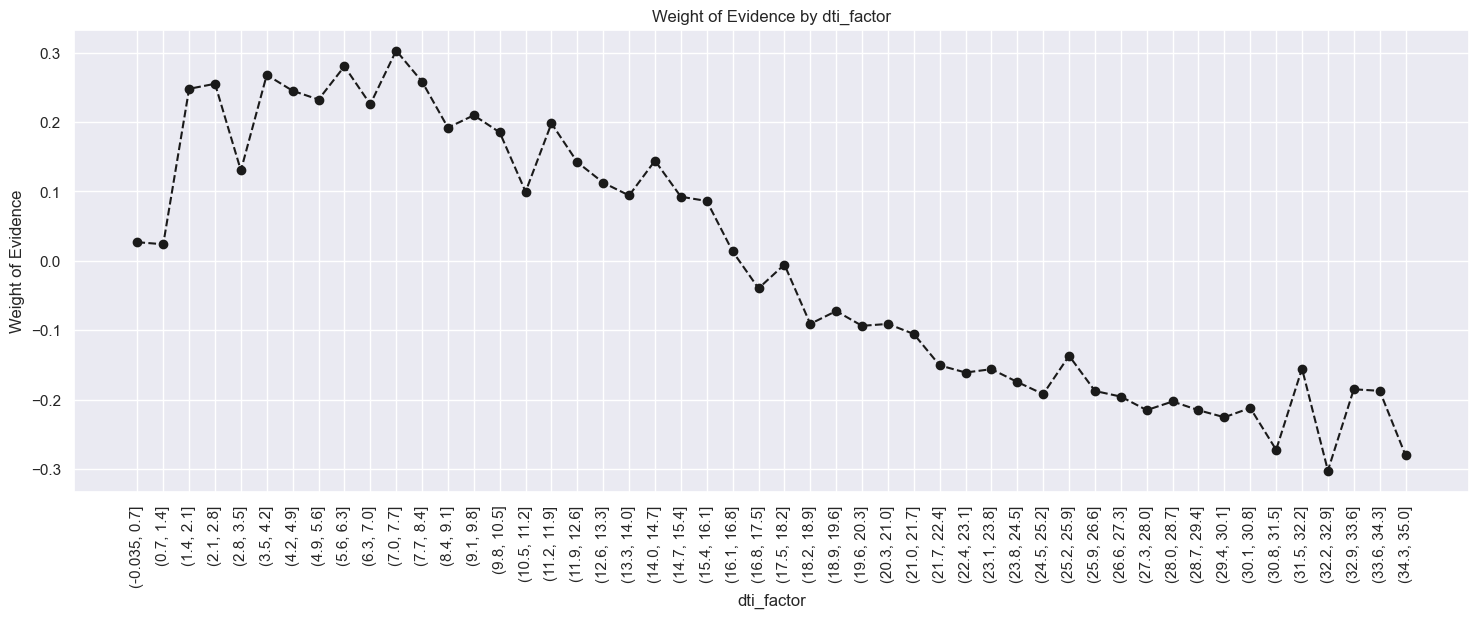

In [176]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [177]:
# Categories:
df_inputs_prepr['dti:<=1.4'] = np.where((df_inputs_prepr['dti'] <= 1.4), 1, 0)
df_inputs_prepr['dti:1.4-3.5'] = np.where((df_inputs_prepr['dti'] > 1.4) & (df_inputs_prepr['dti'] <= 3.5), 1, 0)
df_inputs_prepr['dti:3.5-7.7'] = np.where((df_inputs_prepr['dti'] > 3.5) & (df_inputs_prepr['dti'] <= 7.7), 1, 0)
df_inputs_prepr['dti:7.7-10.5'] = np.where((df_inputs_prepr['dti'] > 7.7) & (df_inputs_prepr['dti'] <= 10.5), 1, 0)
df_inputs_prepr['dti:10.5-16.1'] = np.where((df_inputs_prepr['dti'] > 10.5) & (df_inputs_prepr['dti'] <= 16.1), 1, 0)
df_inputs_prepr['dti:16.1-20.3'] = np.where((df_inputs_prepr['dti'] > 16.1) & (df_inputs_prepr['dti'] <= 20.3), 1, 0)
df_inputs_prepr['dti:20.3-21.7'] = np.where((df_inputs_prepr['dti'] > 20.3) & (df_inputs_prepr['dti'] <= 21.7), 1, 0)
df_inputs_prepr['dti:21.7-22.4'] = np.where((df_inputs_prepr['dti'] > 21.7) & (df_inputs_prepr['dti'] <= 22.4), 1, 0)
df_inputs_prepr['dti:22.4-35'] = np.where((df_inputs_prepr['dti'] > 22.4) & (df_inputs_prepr['dti'] <= 35), 1, 0)
df_inputs_prepr['dti:>35'] = np.where((df_inputs_prepr['dti'] > 35), 1, 0)

In [178]:
# mths_since_last_record
# We have to create one category for missing values and do fine and coarse classing for the rest.
df_inputs_prepr_temp = df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_record'])]
#sum(loan_data_temp['mths_since_last_record'].isnull())
df_inputs_prepr_temp['mths_since_last_record_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_record'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'mths_since_last_record_factor', df_targets_prepr[df_inputs_prepr_temp.index])
# We calculate weight of evidence.
df_temp

mths_since_last_record_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0                 (-0.121, 2.42]   1021   0.768854    0.021755   785.0  236.0   
1                   (2.42, 4.84]     70   0.885714    0.001492    62.0    8.0   
2                   (4.84, 7.26]    150   0.920000    0.003196   138.0   12.0   
3                   (7.26, 9.68]    144   0.909722    0.003068   131.0   13.0   
4                   (9.68, 12.1]    275   0.905455    0.005860   249.0   26.0   
5                  (12.1, 14.52]    192   0.916667    0.004091   176.0   16.0   
6                 (14.52, 16.94]    192   0.932292    0.004091   179.0   13.0   
7                 (16.94, 19.36]    319   0.909091    0.006797   290.0   29.0   
8                 (19.36, 21.78]    263   0.935361    0.005604   246.0   17.0   
9                  (21.78, 24.2]    429   0.897436    0.009141   385.0   44.0   
10                 (24.2, 26.62]    323   0.907121    0.006882   293.0   30.0   
11                (26.62, 29.04]    570   0.901754    0.012145   514.0   56.0   
12                (29.04, 31.46]    431   0.911833    0.009183   393.0   38.0   
13                (31.46, 33.88]    447   0.921700    0.009524   412.0   35.0   
14                 (33.88, 36.3]    736   0.923913    0.015682   680.0   56.0   
15                 (36.3, 38.72]    627   0.937799    0.013360   588.0   39.0   
16                (38.72, 41.14]    957   0.920585    0.020391   881.0   76.0   
17                (41.14, 43.56]    770   0.929870    0.016407   716.0   54.0   
18                (43.56, 45.98]    742   0.928571    0.015810   689.0   53.0   
19                 (45.98, 48.4]   1233   0.923763    0.026272  1139.0   94.0   
20                 (48.4, 50.82]    892   0.919283    0.019006   820.0   72.0   
21                (50.82, 53.24]   1436   0.909471    0.030597  1306.0  130.0   
22                (53.24, 55.66]    987   0.911854    0.021030   900.0   87.0   
23                (55.66, 58.08]   1564   0.914322    0.033325  1430.0  134.0   
24                 (58.08, 60.5]   1037   0.914176    0.022096   948.0   89.0   
25                 (60.5, 62.92]   1140   0.904386    0.024290  1031.0  109.0   
26                (62.92, 65.34]   1516   0.905013    0.032302  1372.0  144.0   
27                (65.34, 67.76]   1018   0.924361    0.021691   941.0   77.0   
28                (67.76, 70.18]   1415   0.910954    0.030150  1289.0  126.0   
29                 (70.18, 72.6]    983   0.904374    0.020945   889.0   94.0   
30                 (72.6, 75.02]   1334   0.898801    0.028424  1199.0  135.0   
31                (75.02, 77.44]    887   0.896280    0.018900   795.0   92.0   
32                (77.44, 79.86]    862   0.901392    0.018367   777.0   85.0   
33                (79.86, 82.28]   1268   0.888801    0.027018  1127.0  141.0   
34                 (82.28, 84.7]    683   0.884334    0.014553   604.0   79.0   
35                 (84.7, 87.12]   1264   0.857595    0.026933  1084.0  180.0   
36                (87.12, 89.54]    773   0.865459    0.016471   669.0  104.0   
37                (89.54, 91.96]    838   0.862768    0.017856   723.0  115.0   
38                (91.96, 94.38]   1389   0.868251    0.029596  1206.0  183.0   
39                 (94.38, 96.8]   1066   0.855535    0.022714   912.0  154.0   
40                 (96.8, 99.22]   1698   0.882803    0.036180  1499.0  199.0   
41               (99.22, 101.64]   1174   0.862010    0.025015  1012.0  162.0   
42              (101.64, 104.06]   1973   0.877344    0.042040  1731.0  242.0   
43              (104.06, 106.48]   1419   0.868922    0.030235  1233.0  186.0   
44               (106.48, 108.9]   1456   0.886676    0.031024  1291.0  165.0   
45               (108.9, 111.32]   2148   0.886406    0.045768  1904.0  244.0   
46              (111.32, 113.74]   1381   0.887038    0.029426  1225.0  156.0   
47              (113.74, 116.16]   1918   0.867570    0.040868  1664.0  254.0   
48              (116.16, 118.58]  

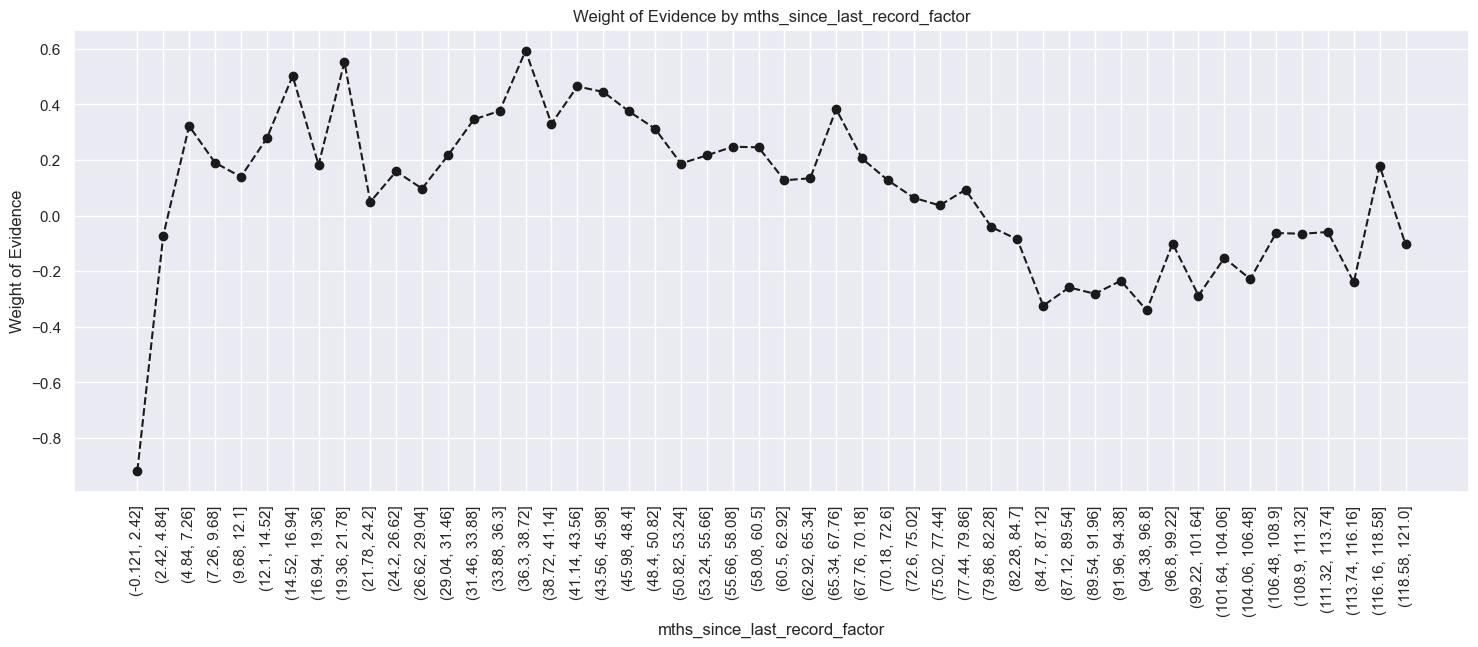

In [179]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [180]:
# Categories: 'Missing', '0-2', '3-20', '21-31', '32-80', '81-86', '>86'
df_inputs_prepr['mths_since_last_record:Missing'] = np.where((df_inputs_prepr['mths_since_last_record'].isnull()), 1, 0)
df_inputs_prepr['mths_since_last_record:0-2'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 0) & (df_inputs_prepr['mths_since_last_record'] <= 2), 1, 0)
df_inputs_prepr['mths_since_last_record:3-20'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 3) & (df_inputs_prepr['mths_since_last_record'] <= 20), 1, 0)
df_inputs_prepr['mths_since_last_record:21-31'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 21) & (df_inputs_prepr['mths_since_last_record'] <= 31), 1, 0)
df_inputs_prepr['mths_since_last_record:32-80'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 32) & (df_inputs_prepr['mths_since_last_record'] <= 80), 1, 0)
df_inputs_prepr['mths_since_last_record:81-86'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 81) & (df_inputs_prepr['mths_since_last_record'] <= 86), 1, 0)
df_inputs_prepr['mths_since_last_record:>86'] = np.where((df_inputs_prepr['mths_since_last_record'] > 86), 1, 0)

In [182]:
loan_data_inputs_train.shape,loan_data_targets_train.shape

((349713, 324), (349713,))

In [183]:
# stored the spilit data into csv file

In [ ]:
loan_data_inputs_train.to_csv('loan_data_inputs_train.csv')
loan_data_targets_train.to_csv('loan_data_targets_train.csv')